In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import ipykernel
import os
pd.set_option('display.max_columns', None)

In [147]:
# Read the dataset
dataset_path = os.path.join('data','raw_data','train.csv')
df = pd.read_csv(dataset_path)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [148]:
df.shape

(1460, 81)

In [149]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [150]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [151]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [152]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [153]:
# Find the list of missing columns
columns_with_missing = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing)

Columns with missing values: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [154]:
# Find the percentage of missing values in each column
for col in columns_with_missing:
    missing_percentage = df[col].isnull().mean() * 100
    print(f"{col}: {missing_percentage:.2f}%")


LotFrontage: 17.74%
Alley: 93.77%
MasVnrType: 59.73%
MasVnrArea: 0.55%
BsmtQual: 2.53%
BsmtCond: 2.53%
BsmtExposure: 2.60%
BsmtFinType1: 2.53%
BsmtFinType2: 2.60%
Electrical: 0.07%
FireplaceQu: 47.26%
GarageType: 5.55%
GarageYrBlt: 5.55%
GarageFinish: 5.55%
GarageQual: 5.55%
GarageCond: 5.55%
PoolQC: 99.52%
Fence: 80.75%
MiscFeature: 96.30%


In [155]:
df_copy=df.copy()  # Create a copy of the DataFrame for further analysis
df_copy.head()  # Display the first few rows of the copied DataFrame 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [156]:
# Check for duplicate rows
duplicate_rows = df_copy.duplicated().value_counts()
print(duplicate_rows)


False    1460
Name: count, dtype: int64


In [157]:
# Check for duplicate columns
duplicate_columns = df_copy.columns[df_copy.columns.duplicated()].tolist()
print("Duplicate columns:", duplicate_columns)

Duplicate columns: []


In [158]:
# check for the duplicate columns in terms of their values
duplicate_columns_values = df_copy.columns[df_copy.T.duplicated()].tolist()
print("Duplicate columns based on values:", duplicate_columns_values)

Duplicate columns based on values: []


In [159]:
# How to remove the duplicate columns
df_copy = df_copy.loc[:, ~df_copy.T.duplicated()]
df_copy.shape

(1460, 81)

In [160]:
# Find the junk columns and remove them
junk_columns = [col for col in df_copy.columns if df_copy[col].nunique()<2 or 'unnamed' in col.lower()]
print("Junk columns:", junk_columns)
# To remove the junk columns
df_copy = df_copy.drop(columns=junk_columns)
df_copy.shape

Junk columns: []


(1460, 81)

In [161]:
# see if there are any columns with white spaces
columns_with_spaces = df_copy.columns[df_copy.columns.str.contains(' ')]
if columns_with_spaces.empty:
    print("No columns with spaces found.")
df_copy.columns = df_copy.columns.str.strip()  # Remove leading and trailing spaces from column names  


No columns with spaces found.


In [162]:
df_copy.drop(columns=['Id'],axis=1, inplace=True)  # Drop the 'Id' column as it is not needed for analysis

In [163]:
numerical_columns = df_copy.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df_copy.select_dtypes(include=['object']).columns.tolist()

In [164]:
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [165]:
df_copy['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [166]:
df_copy.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [167]:
# Display the columns with their unique value count
for col in df_copy.columns:
    print(f"Column: {col}")
    print(f"unique values count : {df_copy[col].nunique()}")
   # print(f"unique values : {df_copy[col].unique()}")
    print("-" * 40)

Column: MSSubClass
unique values count : 15
----------------------------------------
Column: MSZoning
unique values count : 5
----------------------------------------
Column: LotFrontage
unique values count : 110
----------------------------------------
Column: LotArea
unique values count : 1073
----------------------------------------
Column: Street
unique values count : 2
----------------------------------------
Column: Alley
unique values count : 2
----------------------------------------
Column: LotShape
unique values count : 4
----------------------------------------
Column: LandContour
unique values count : 4
----------------------------------------
Column: Utilities
unique values count : 2
----------------------------------------
Column: LotConfig
unique values count : 5
----------------------------------------
Column: LandSlope
unique values count : 3
----------------------------------------
Column: Neighborhood
unique values count : 25
----------------------------------------


<Axes: xlabel='SalePrice', ylabel='Count'>

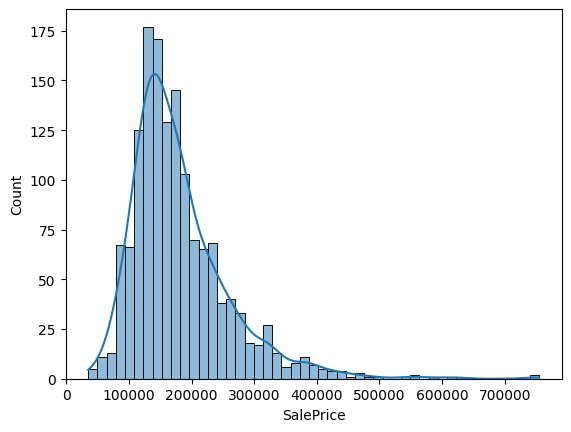

In [168]:
# Check the distribution of the target variable
sns.histplot(df_copy['SalePrice'], kde=True)

In [169]:
# Observation: The distribution of the target variable 'SalePrice' is right-skewed, indicating that most house prices are lower, with fewer houses having very high prices. This is a common pattern in real estate data.

In [170]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [171]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [172]:
# Find the unique values in the each column
for col in df_copy.columns:
    print(f"Column: {col}")
    print(f"Unique values: {df_copy[col].unique()}")
    print("-" * 40)

Column: MSSubClass
Unique values: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
----------------------------------------
Column: MSZoning
Unique values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
----------------------------------------
Column: LotFrontage
Unique values: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
----------------------------------------
Column: LotArea
Unique values: [ 8450  9600 11250 ... 17217 13175  9717]
----------------------------------------
Colu

In [173]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

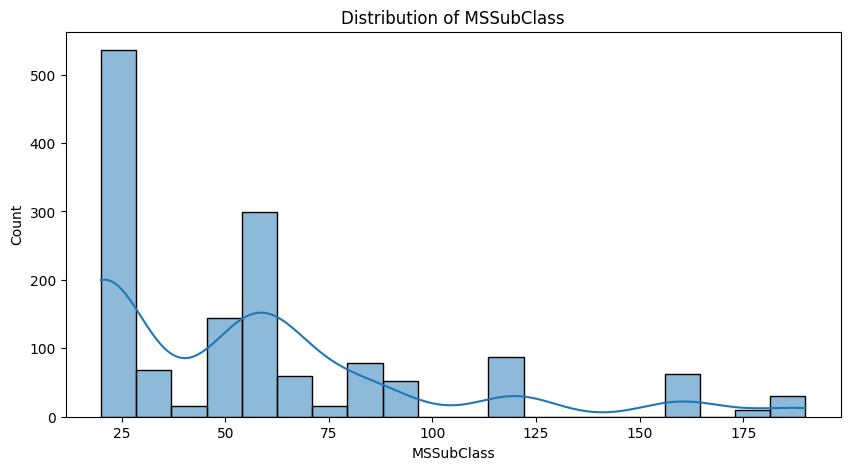

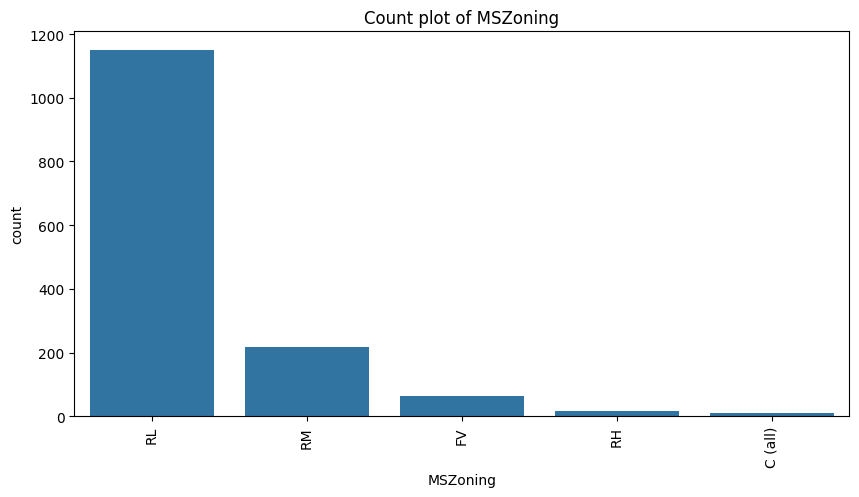

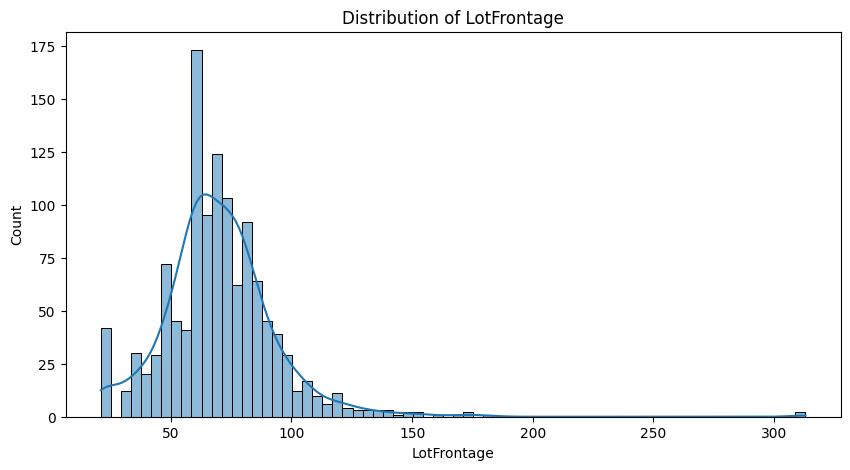

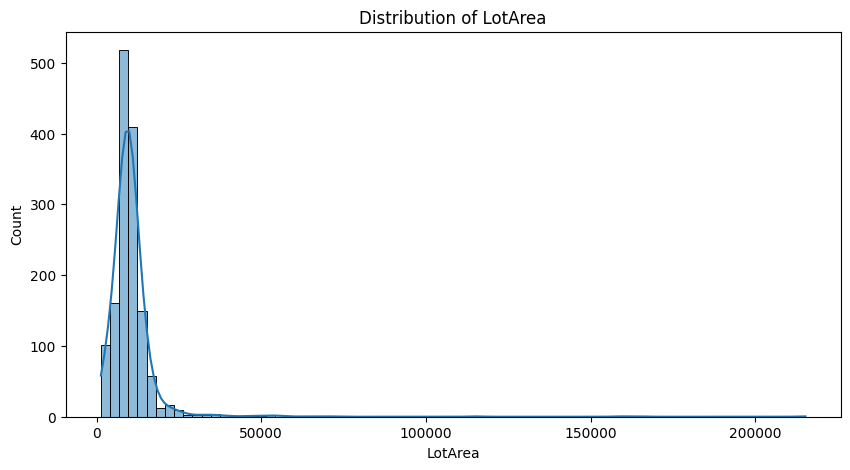

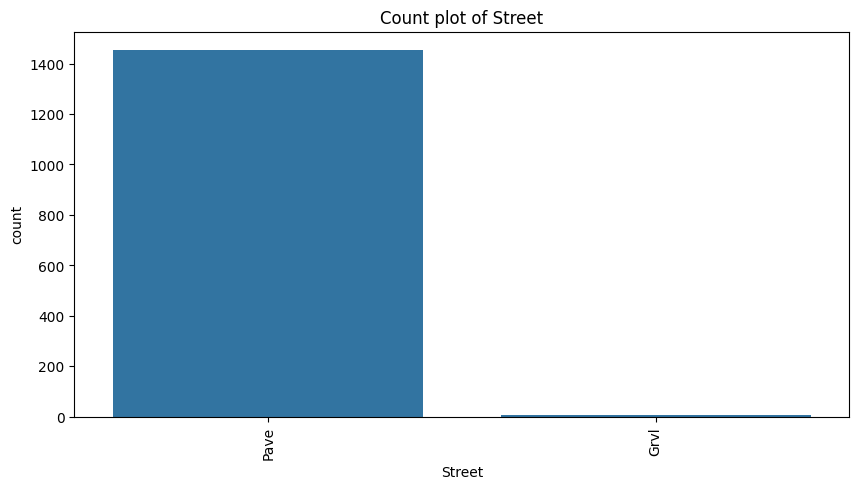

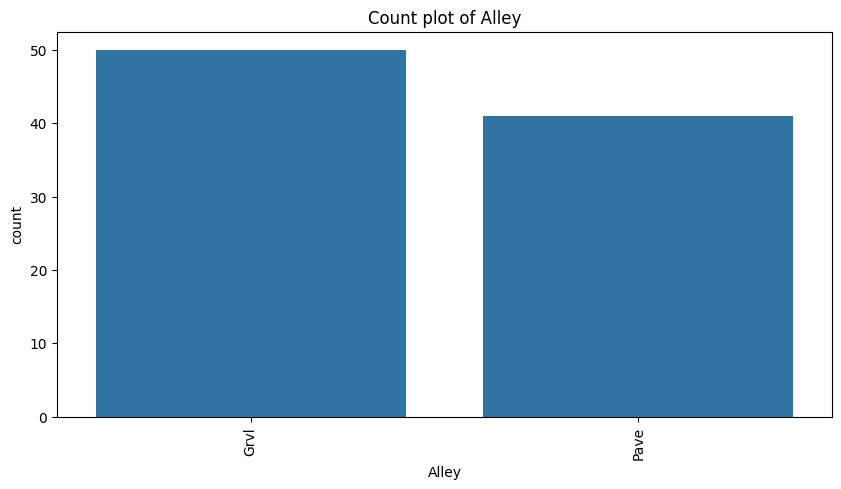

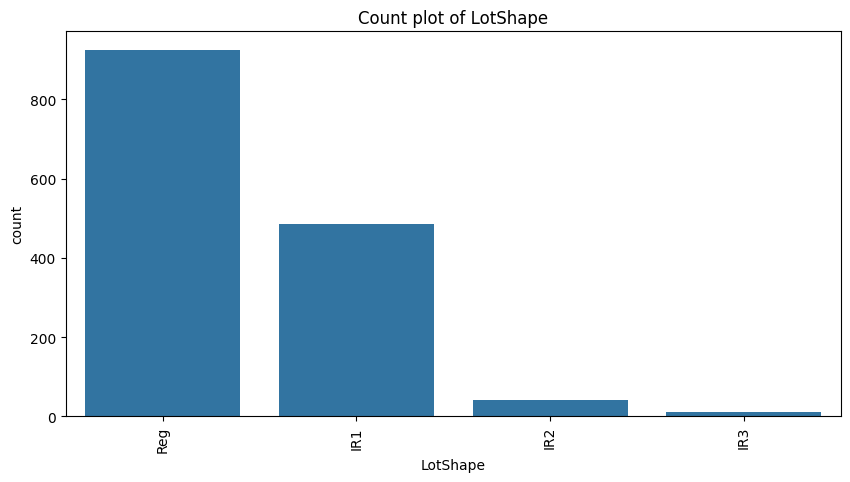

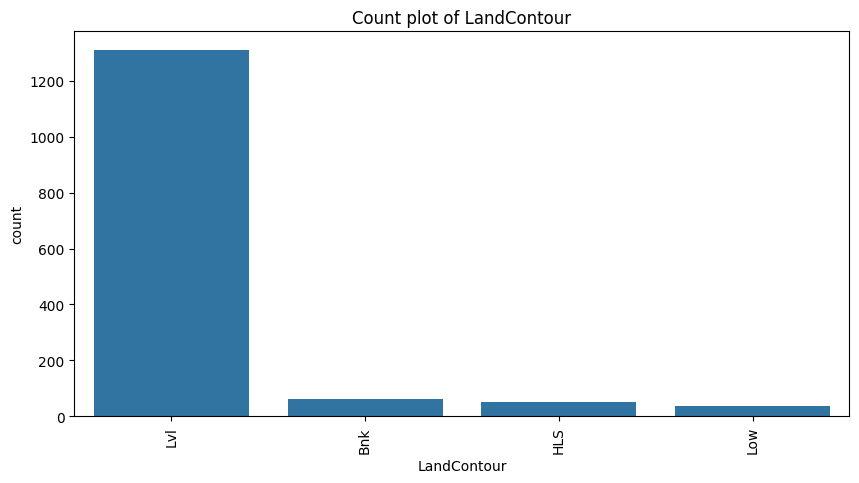

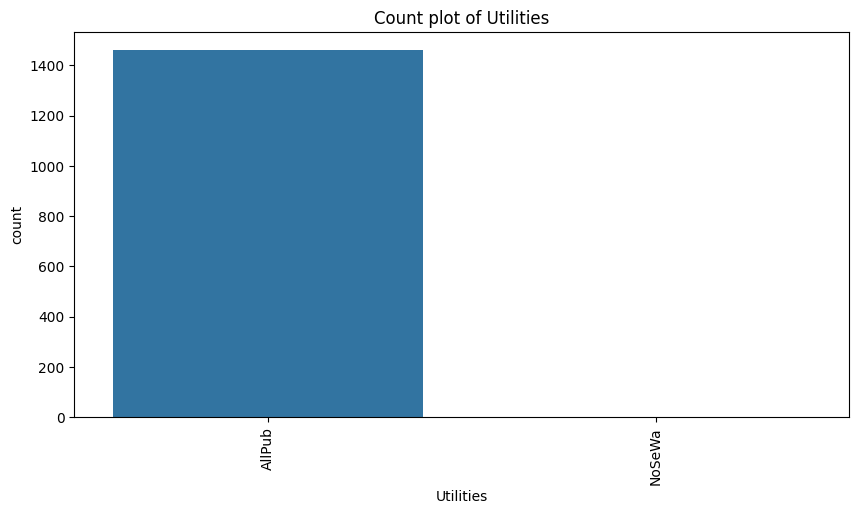

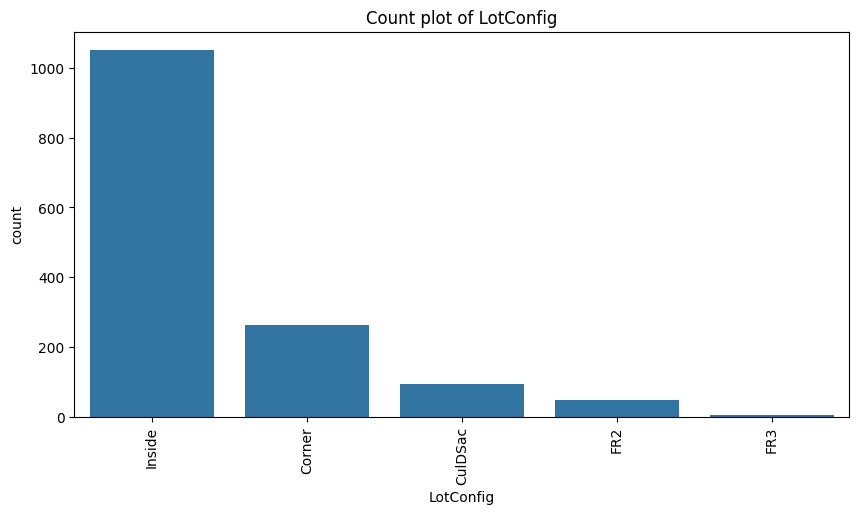

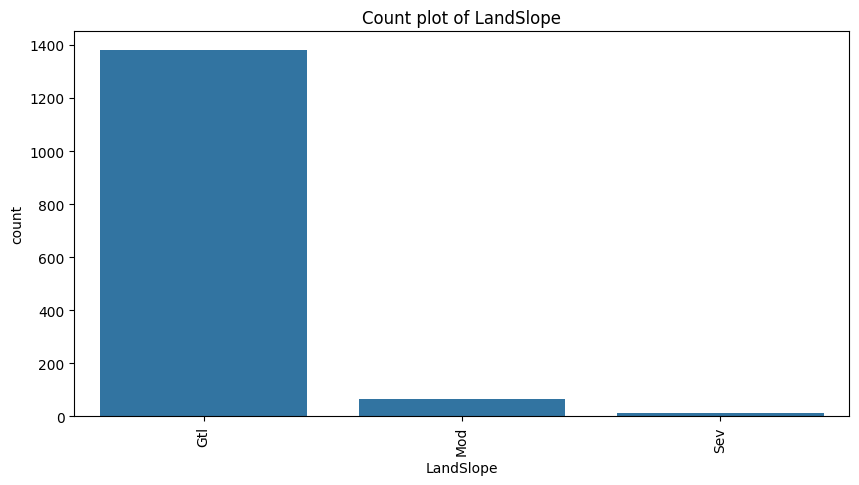

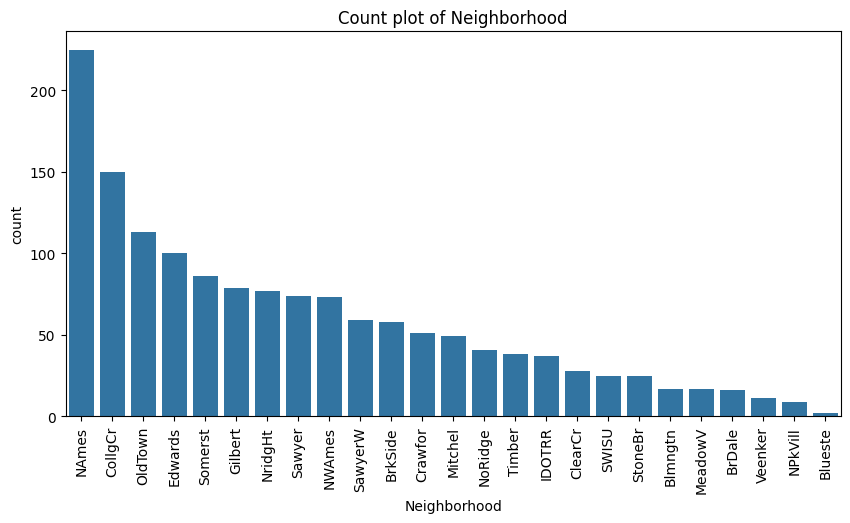

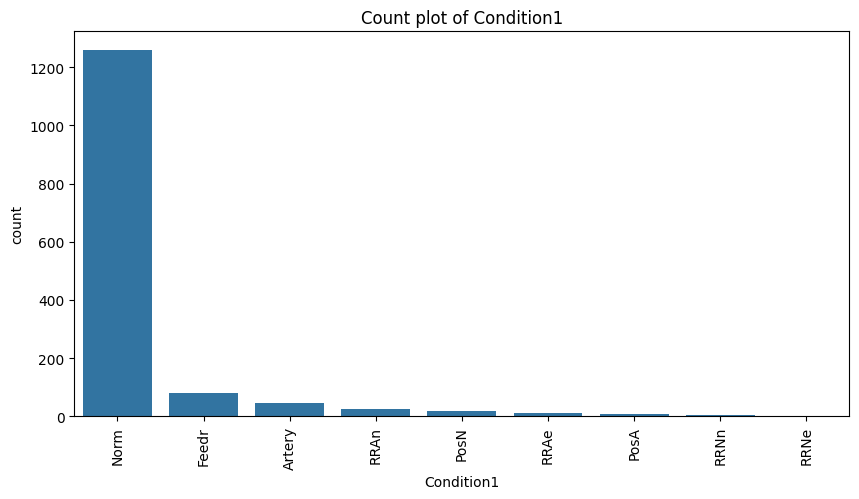

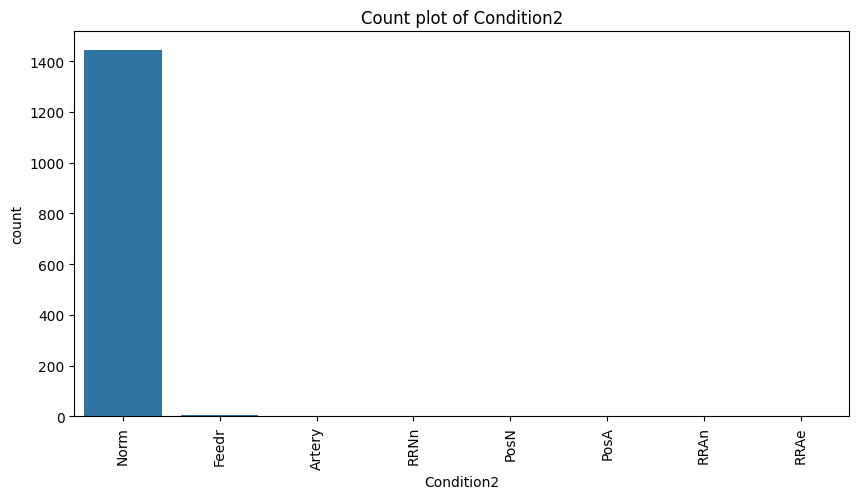

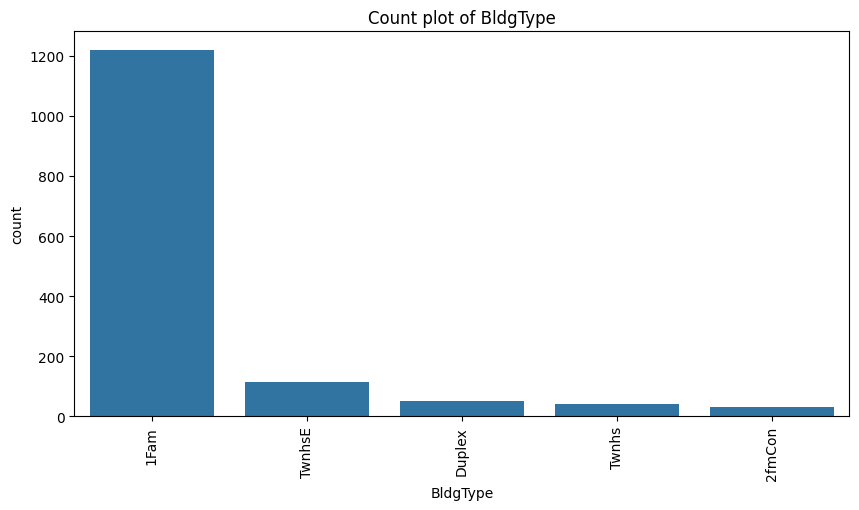

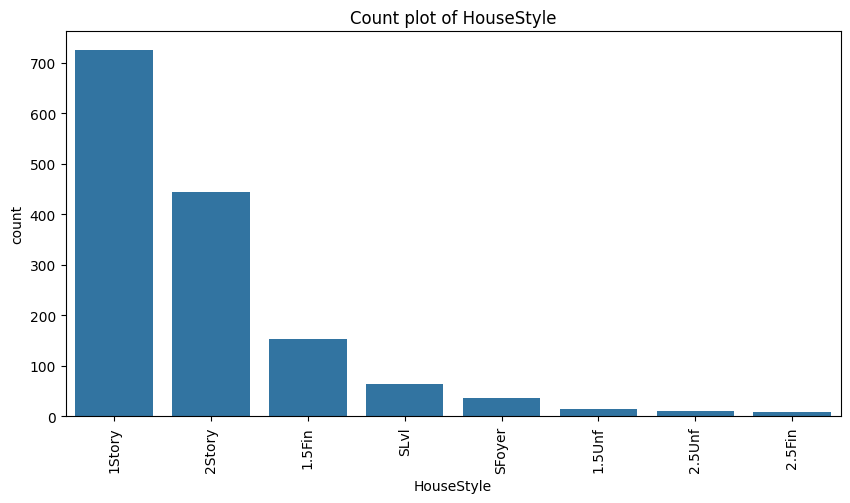

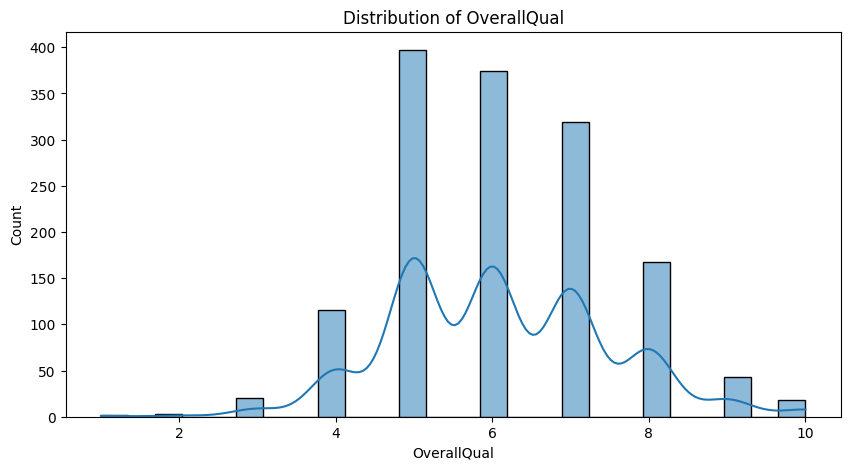

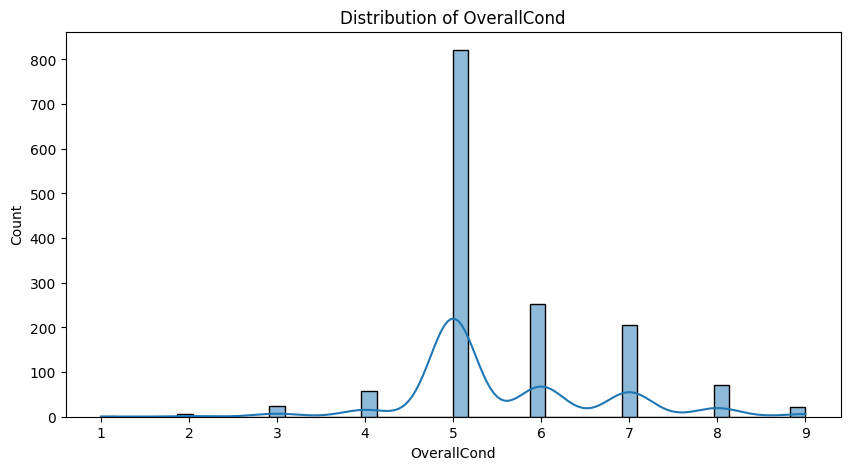

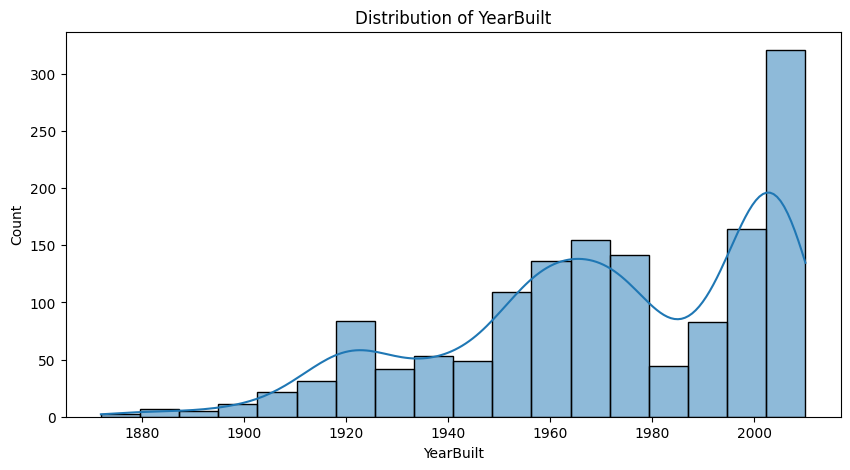

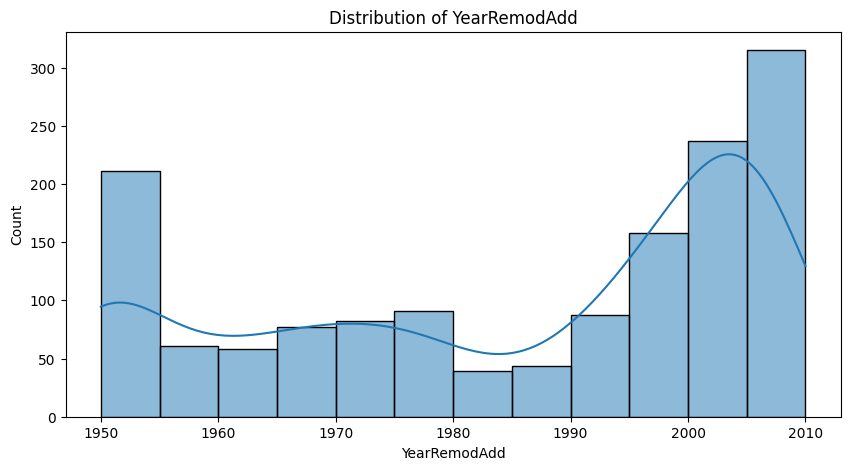

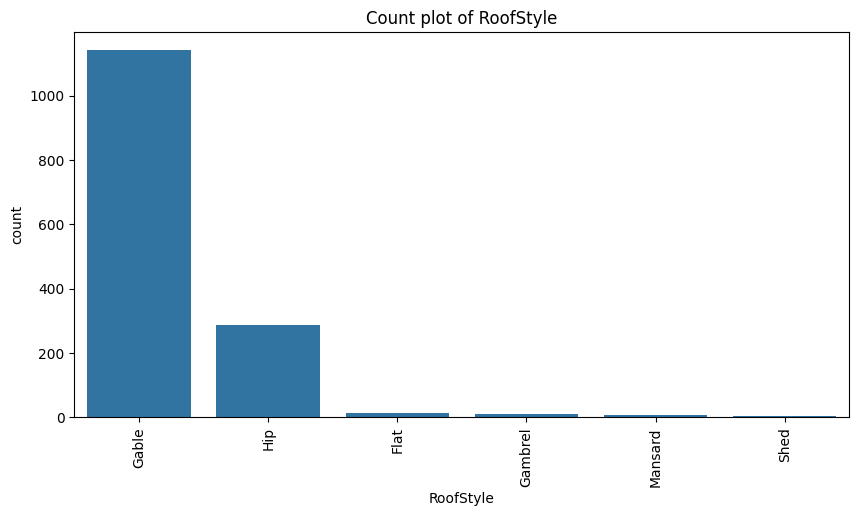

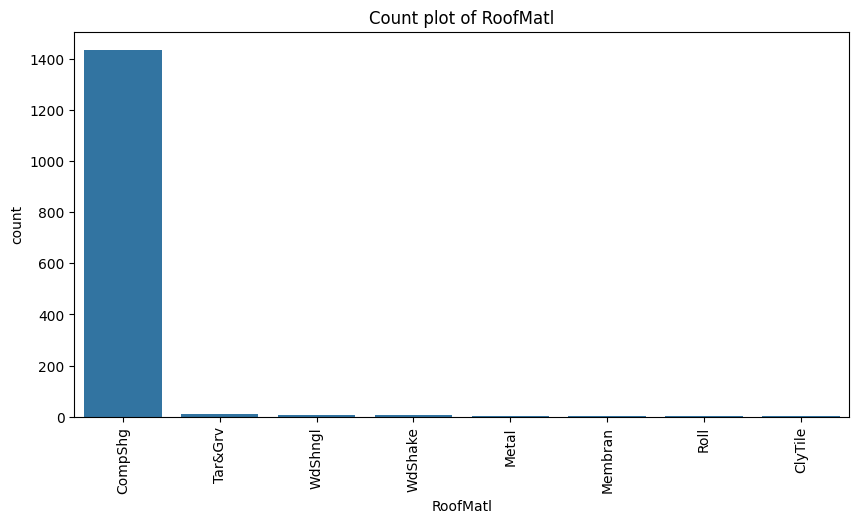

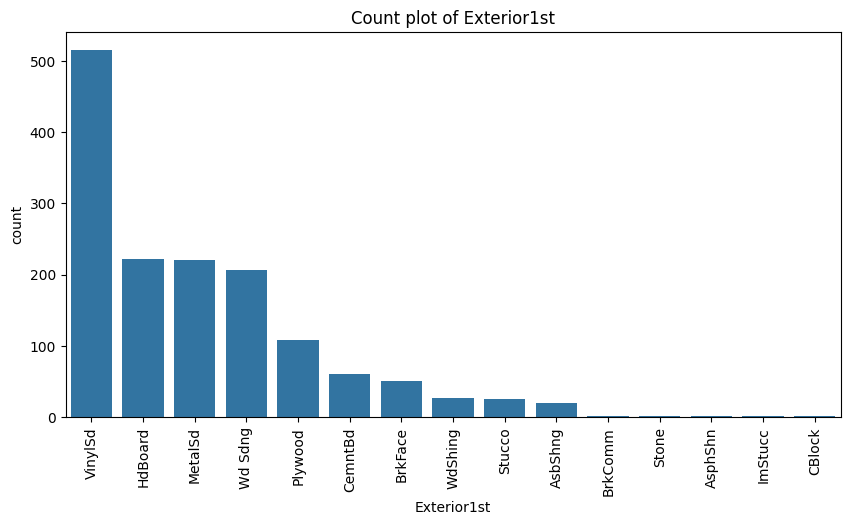

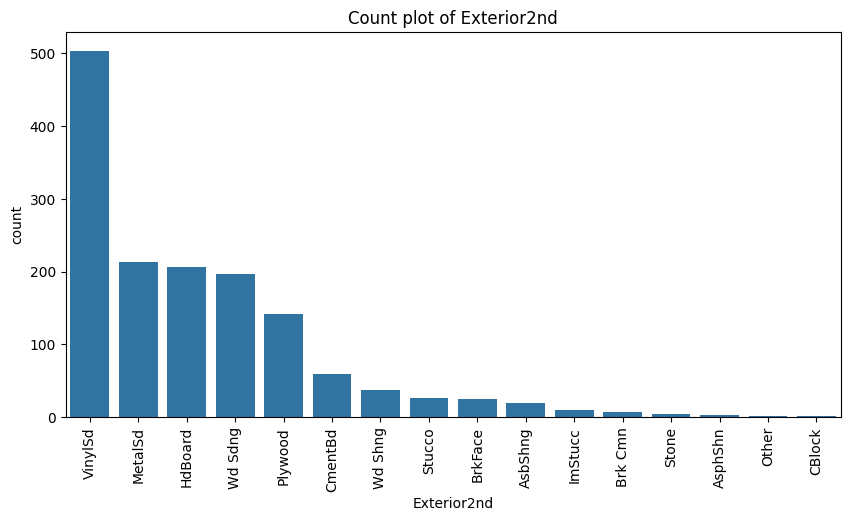

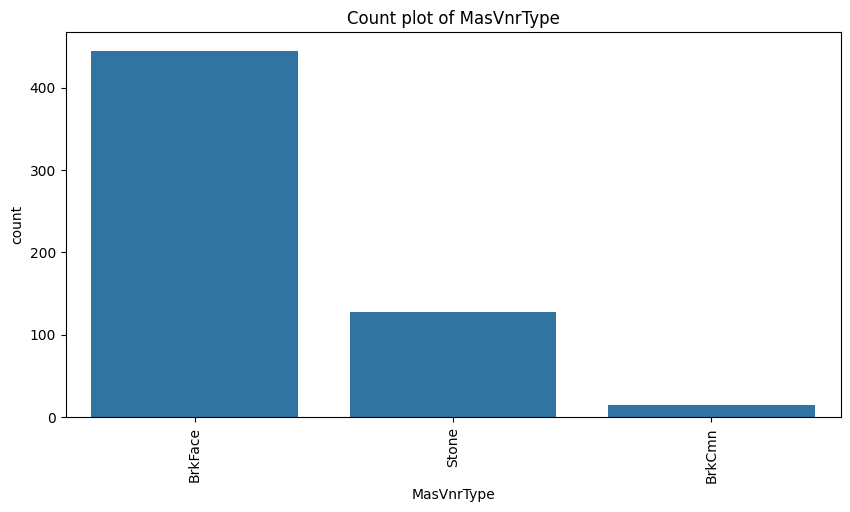

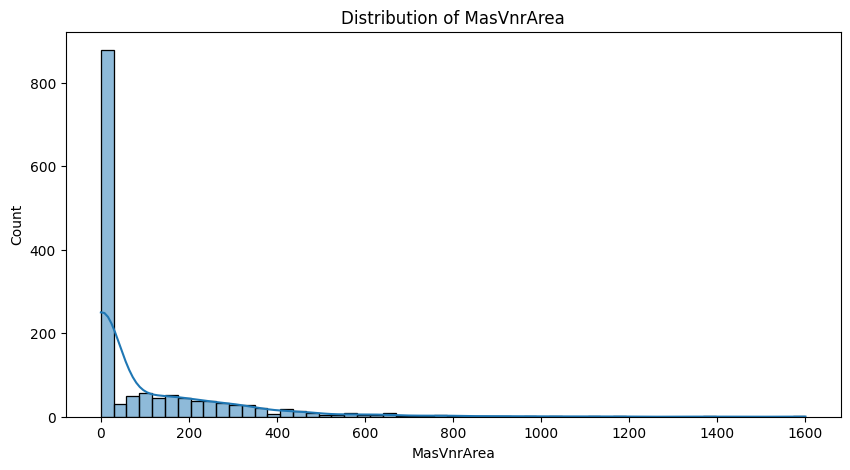

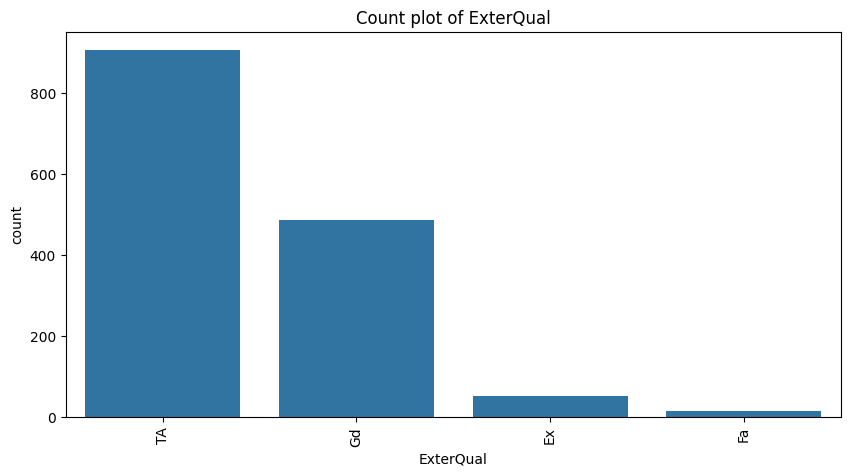

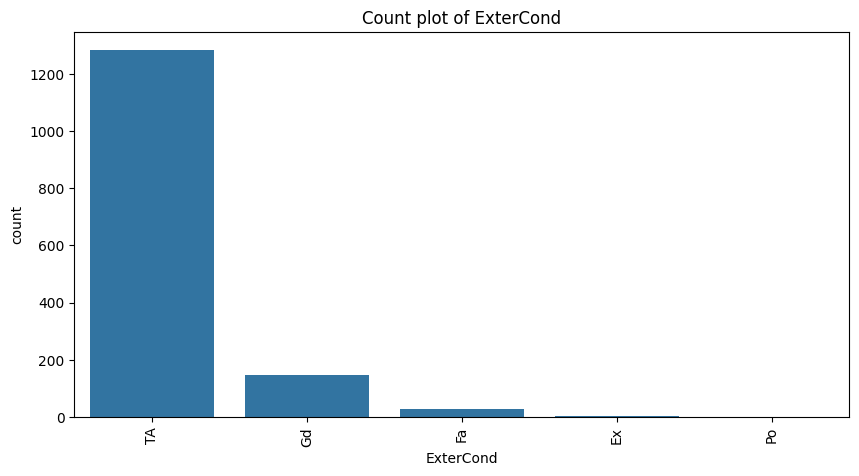

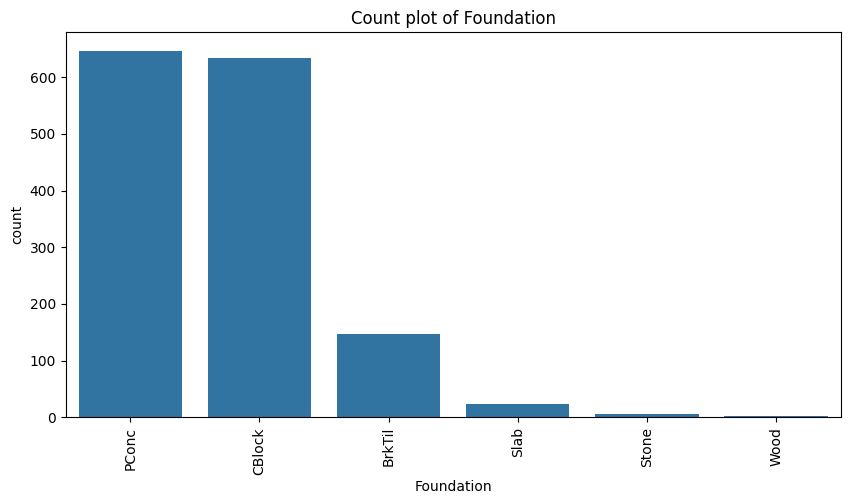

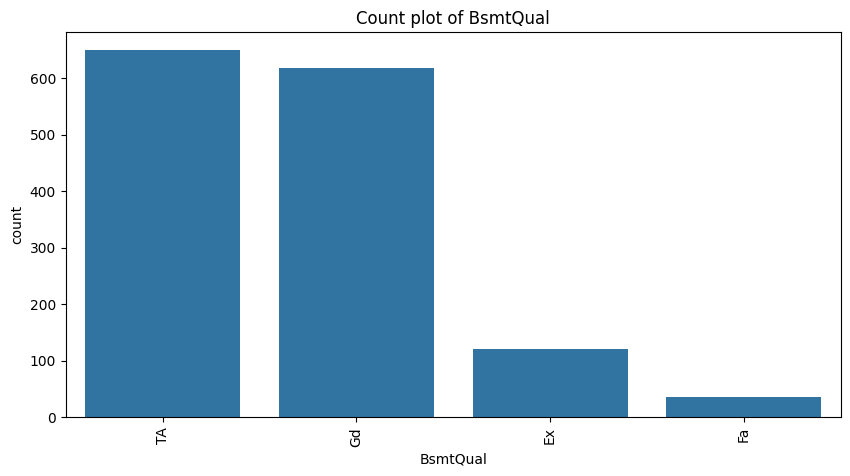

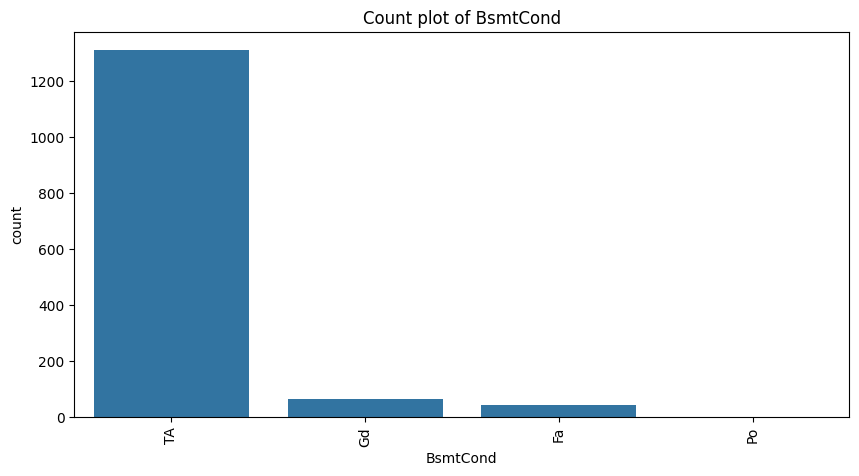

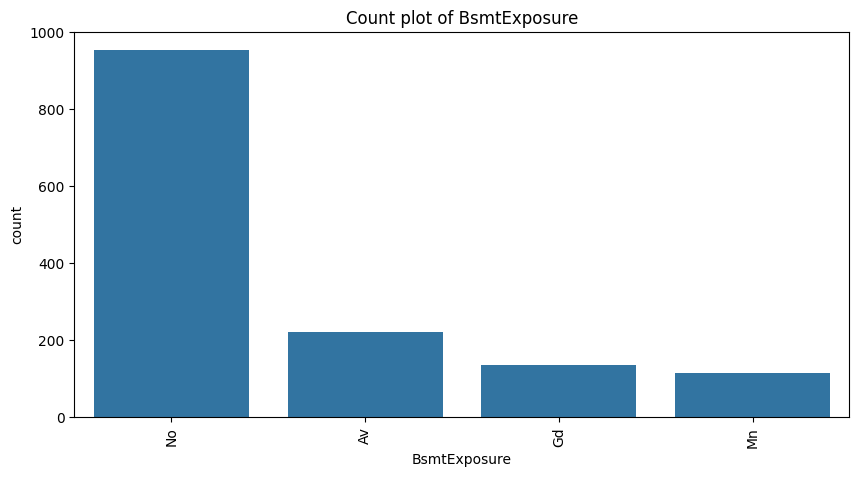

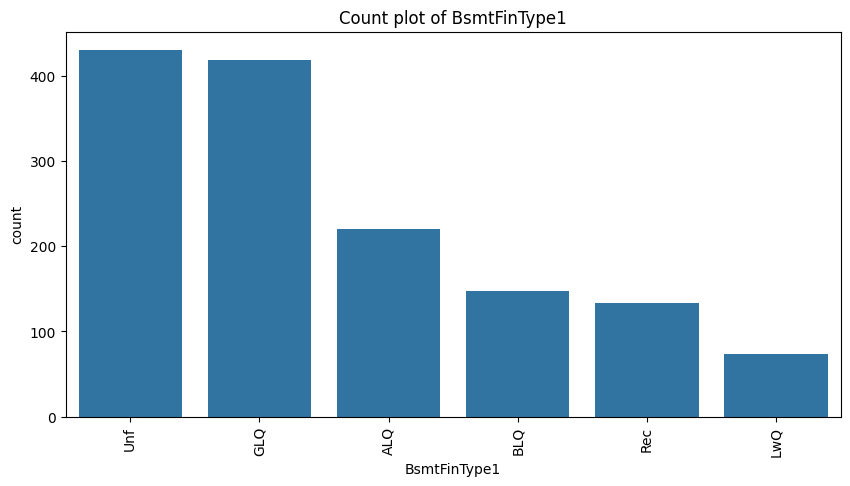

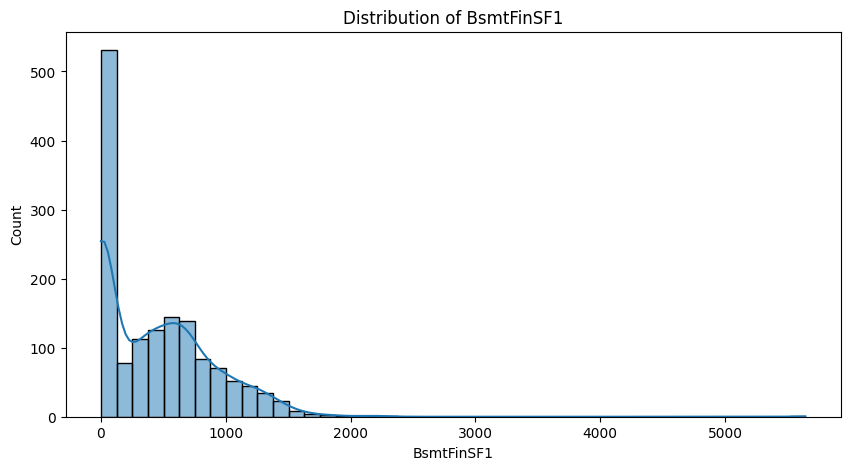

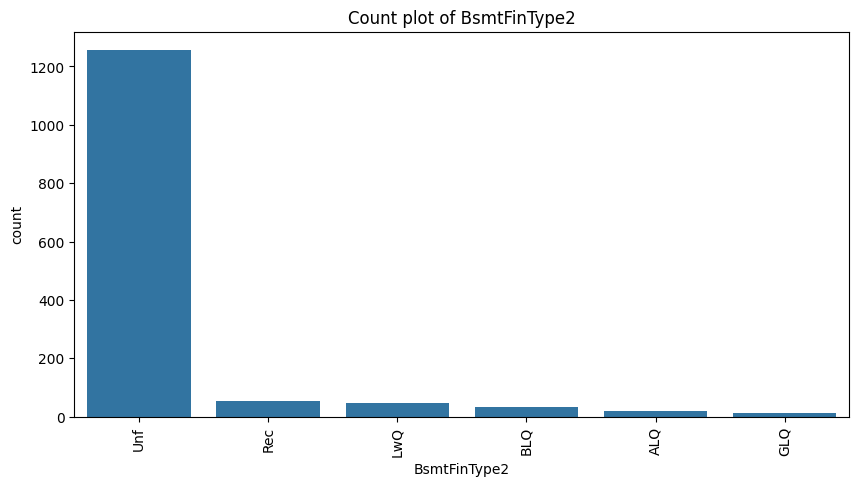

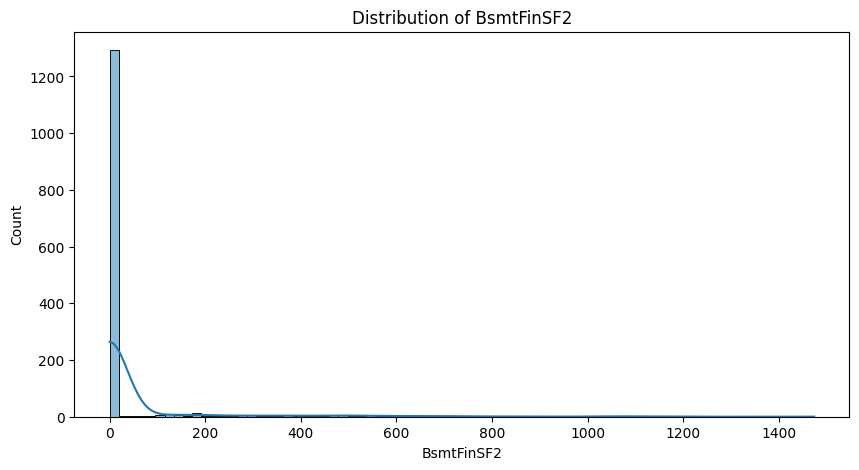

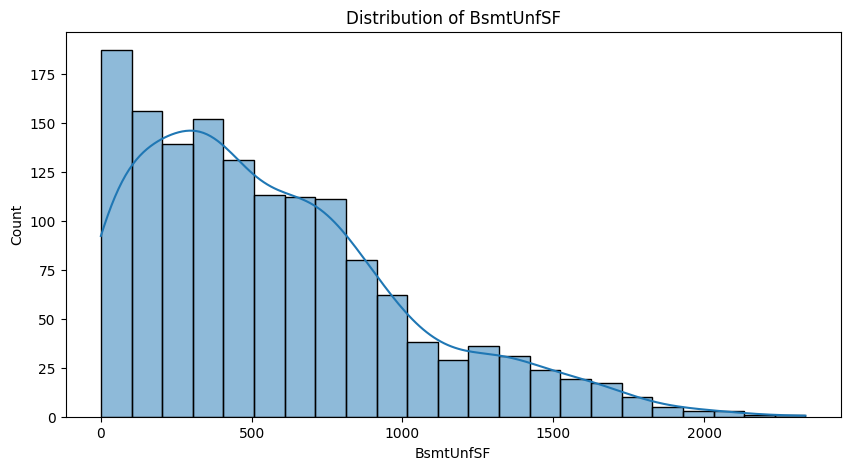

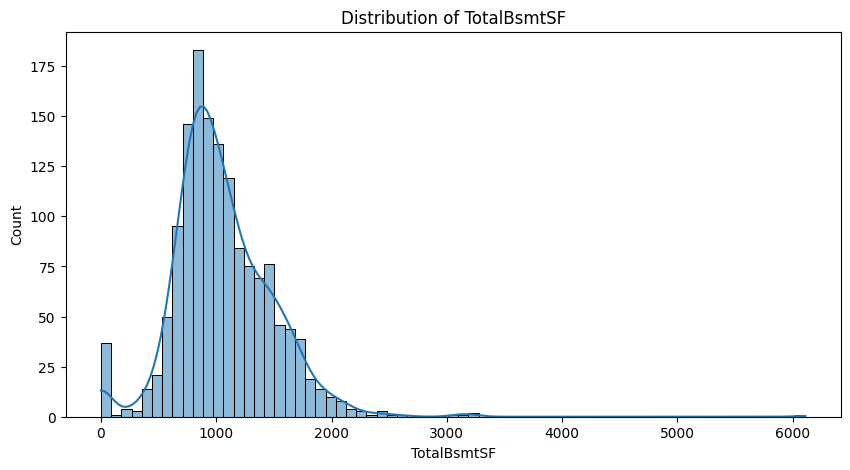

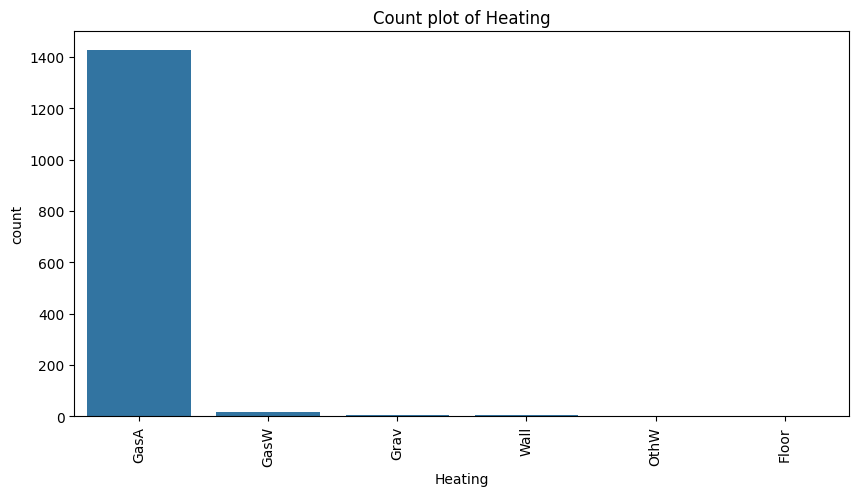

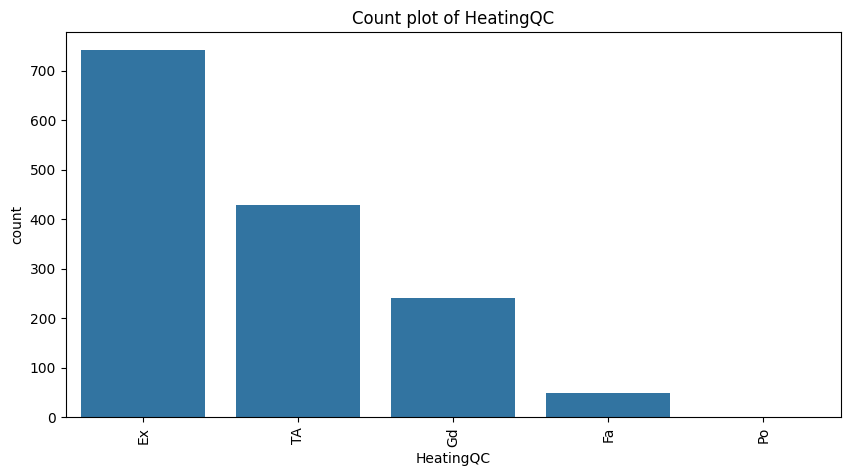

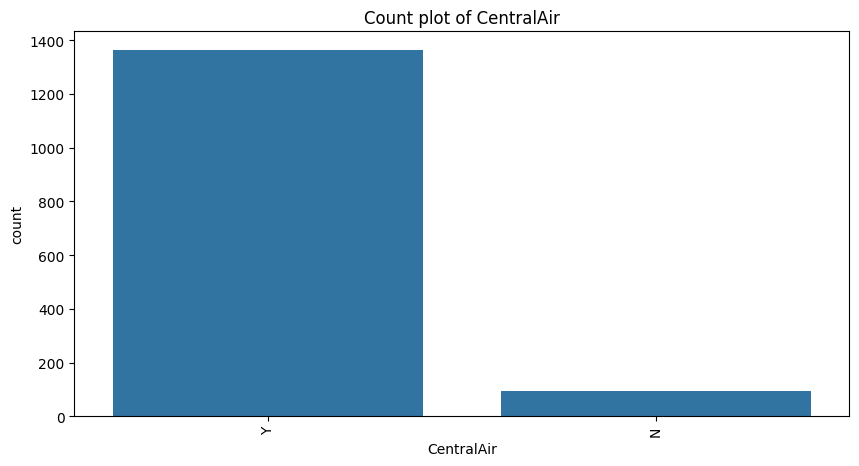

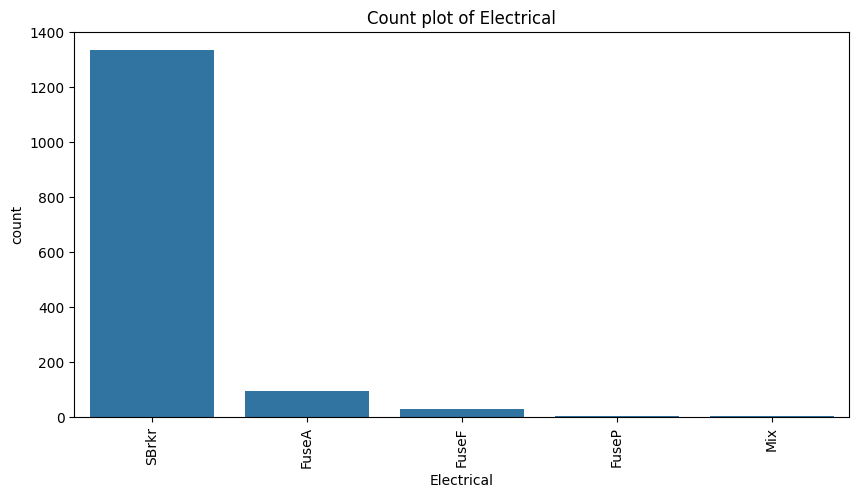

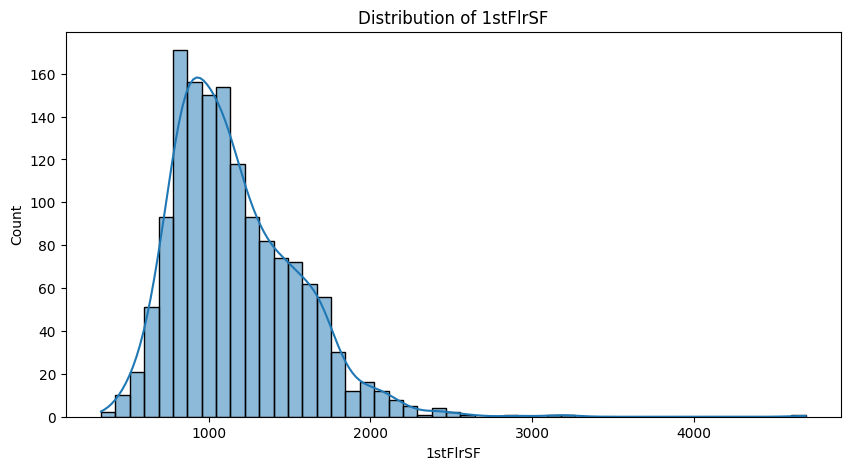

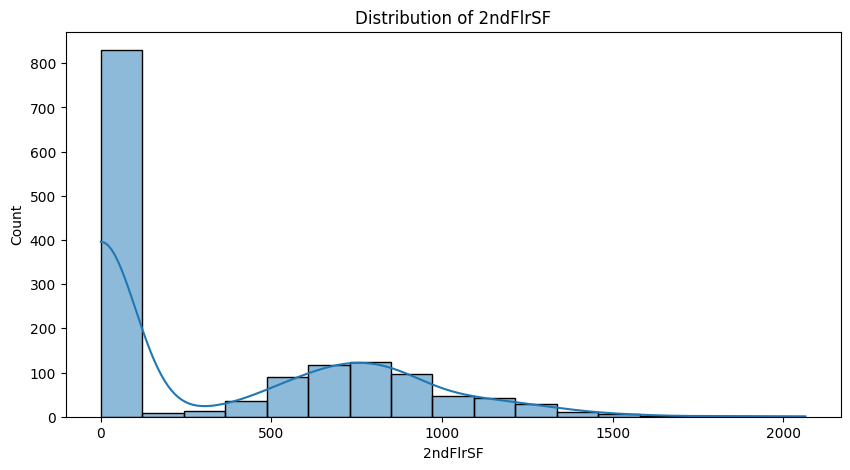

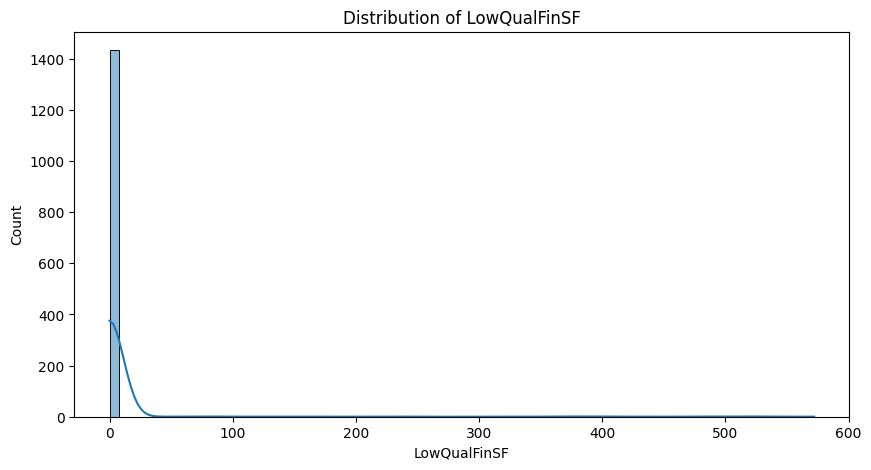

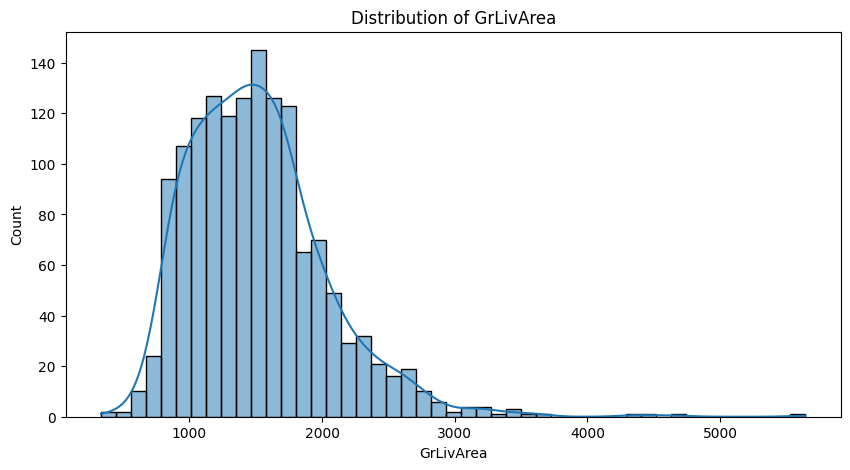

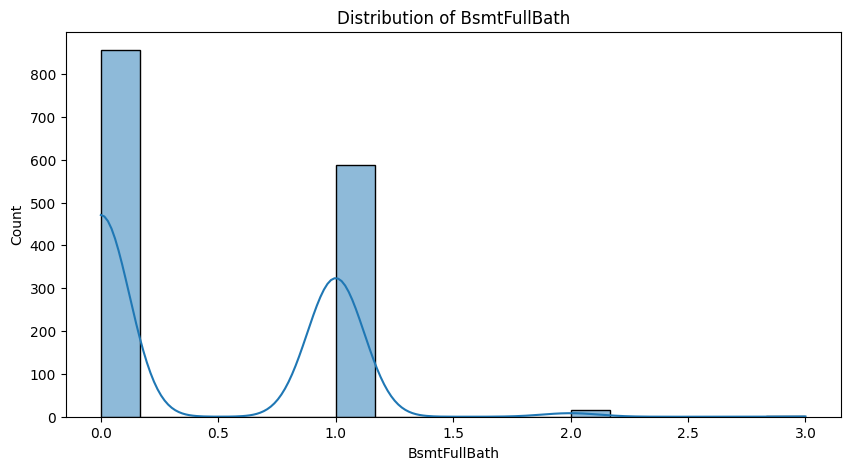

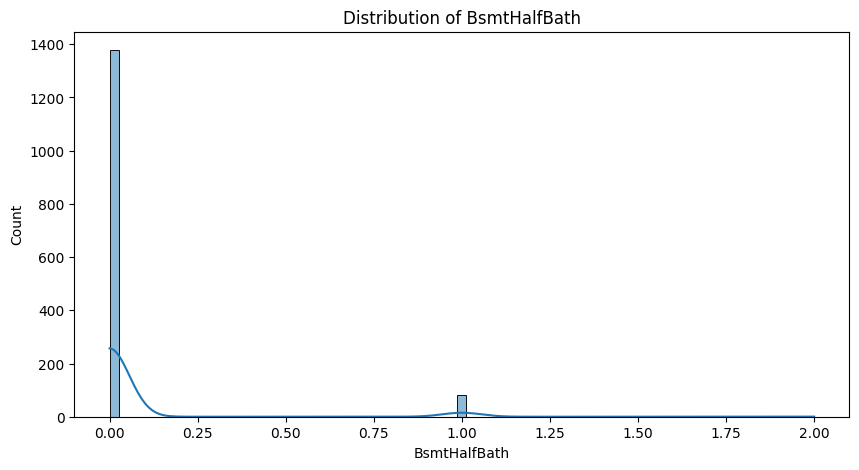

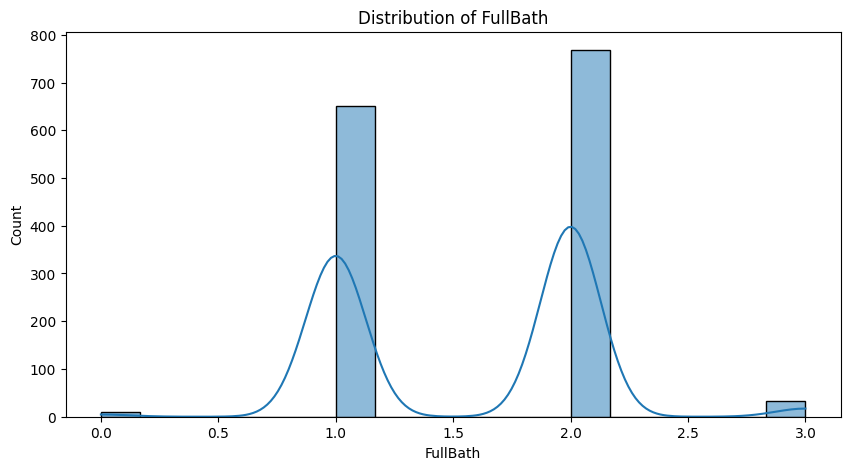

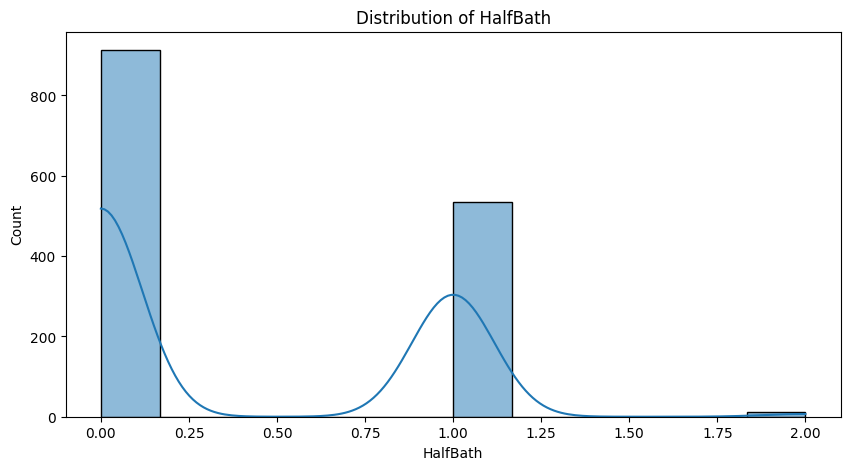

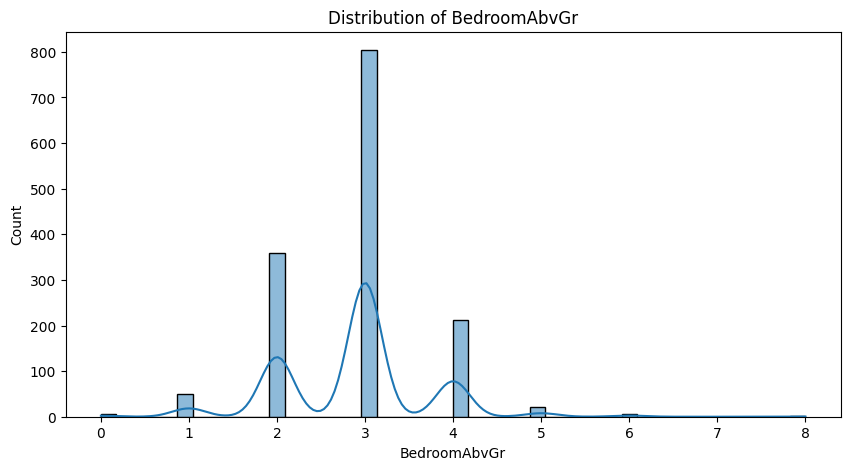

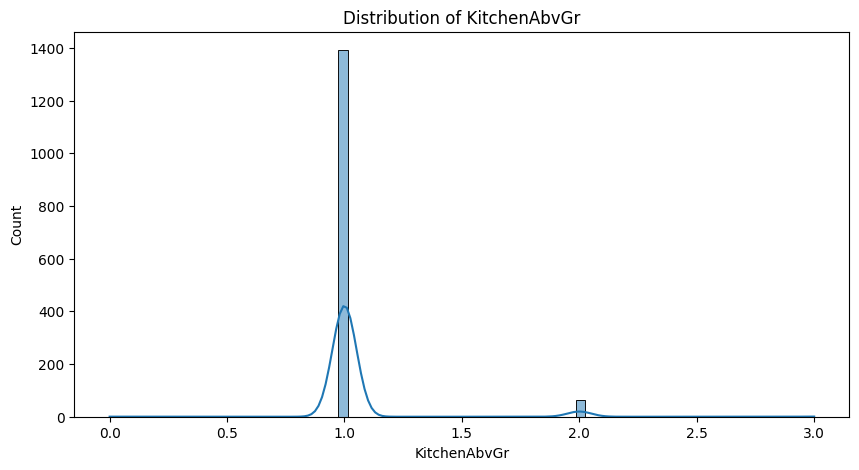

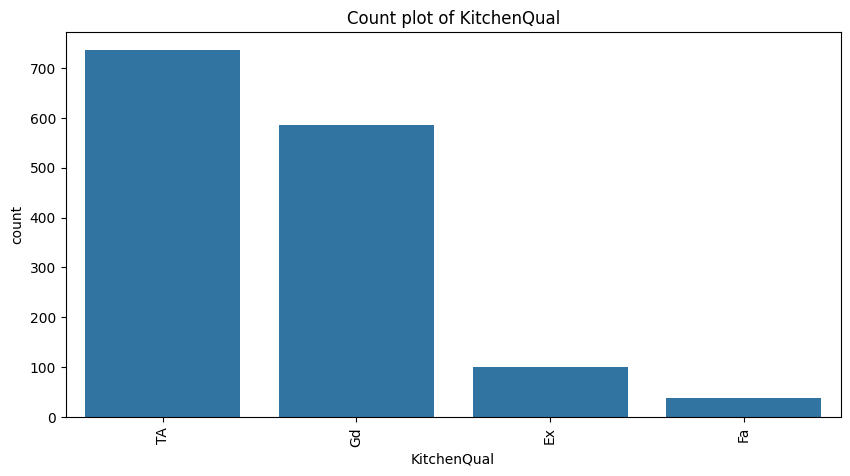

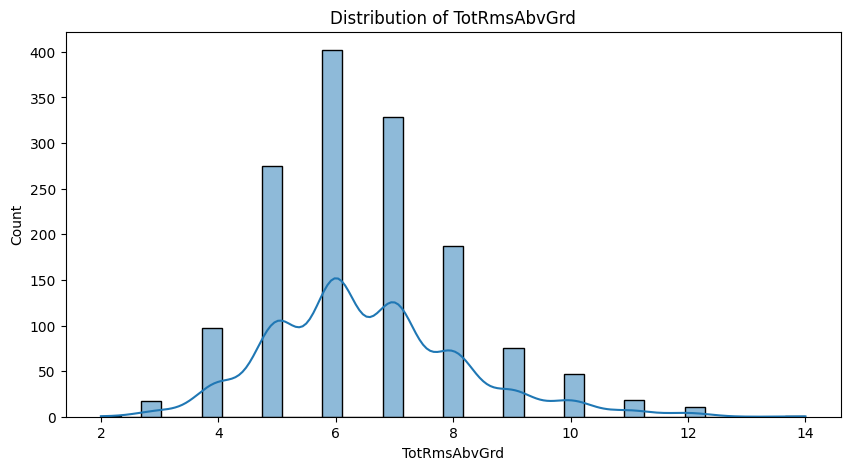

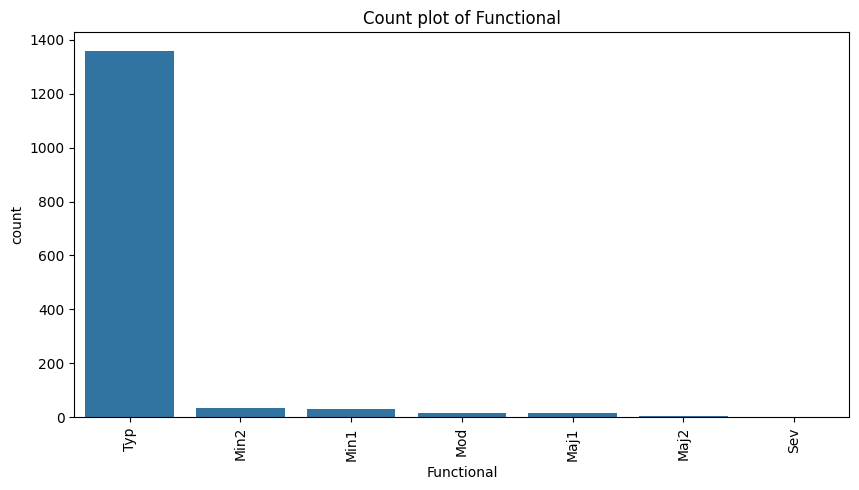

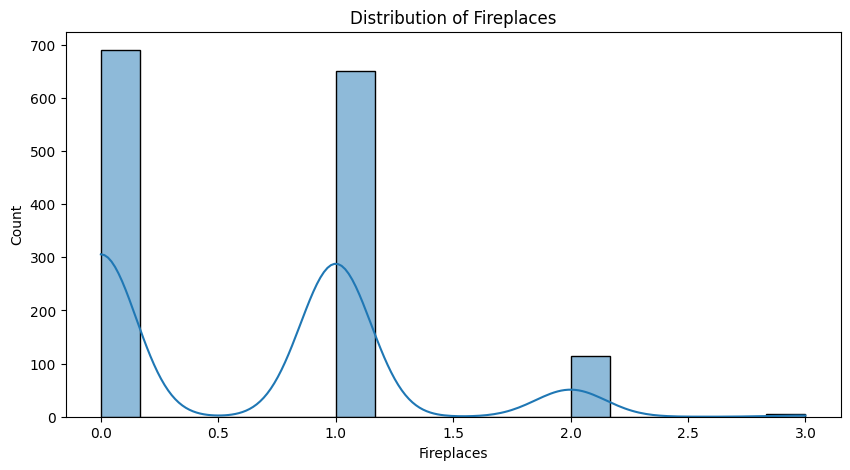

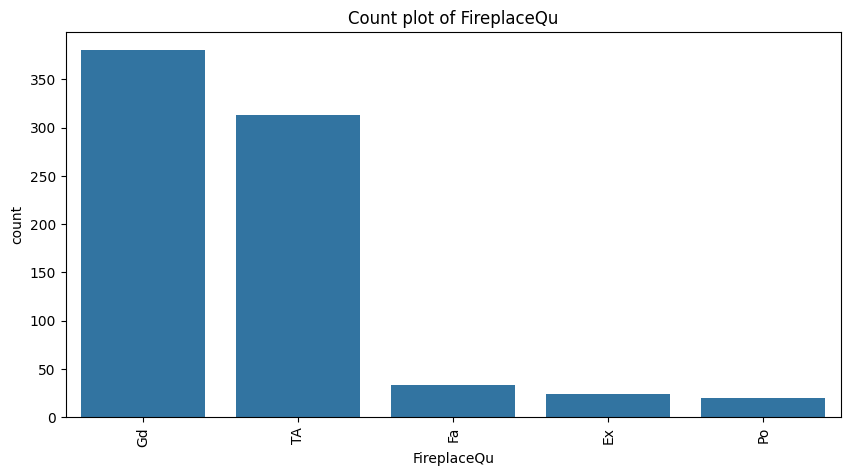

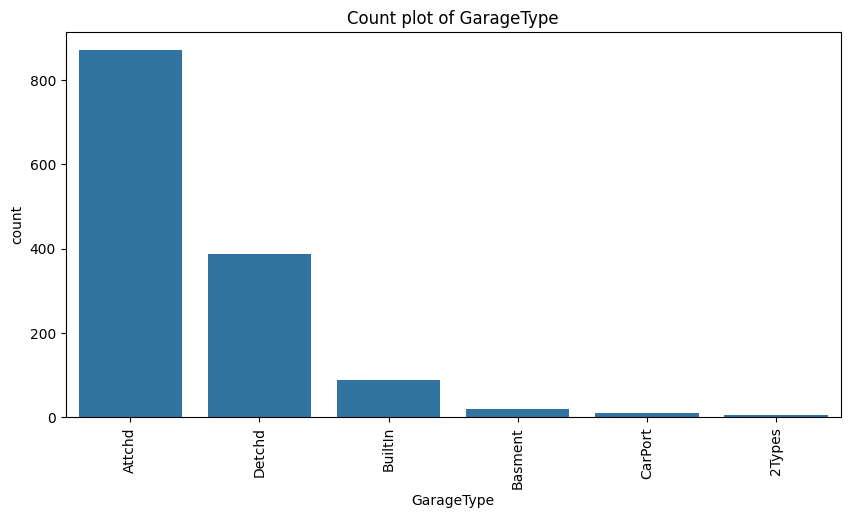

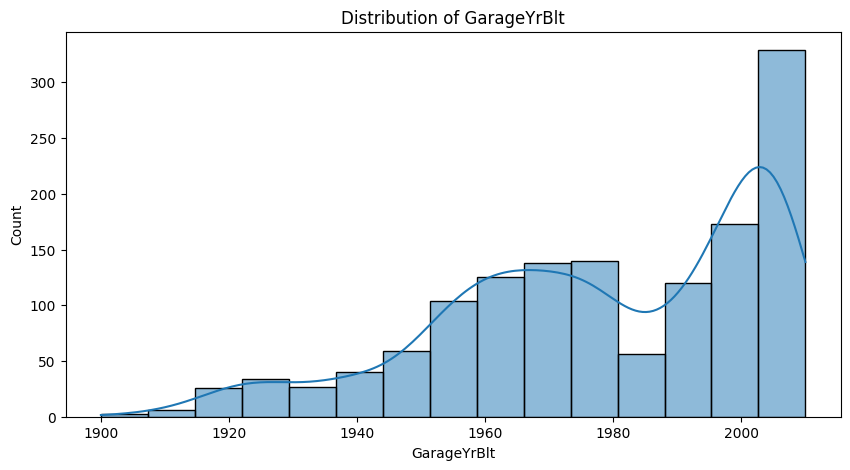

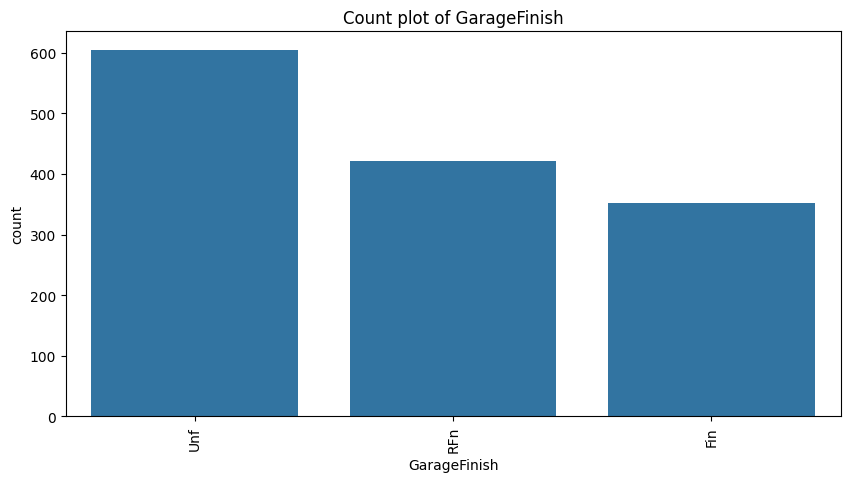

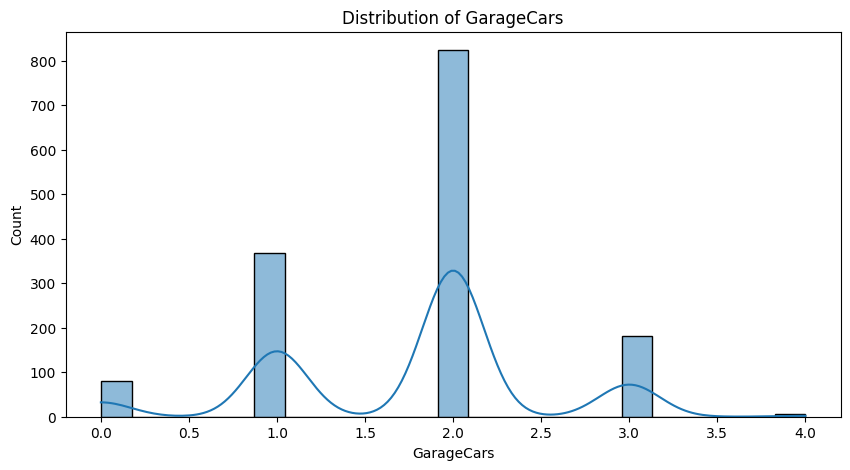

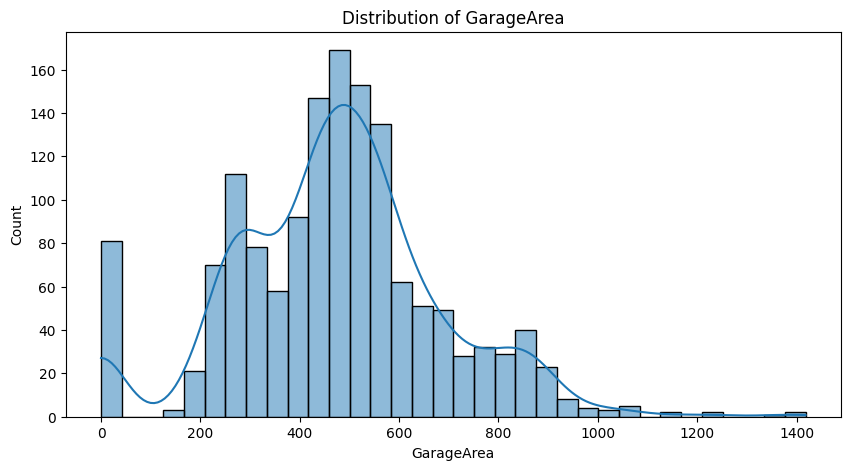

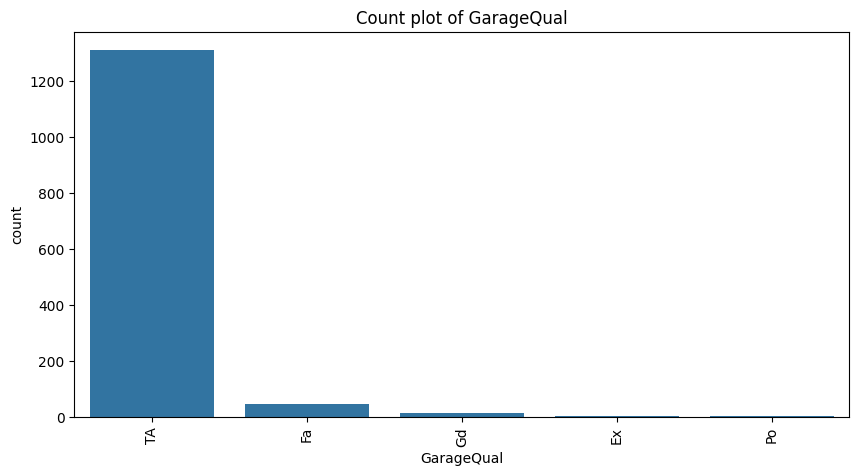

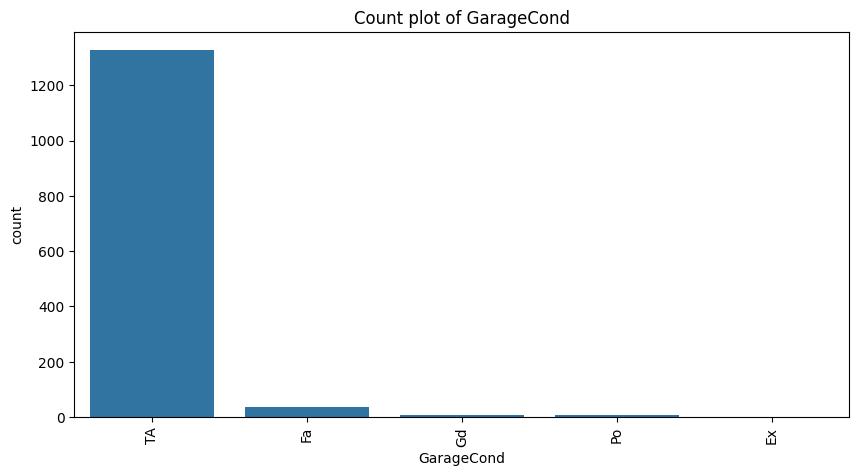

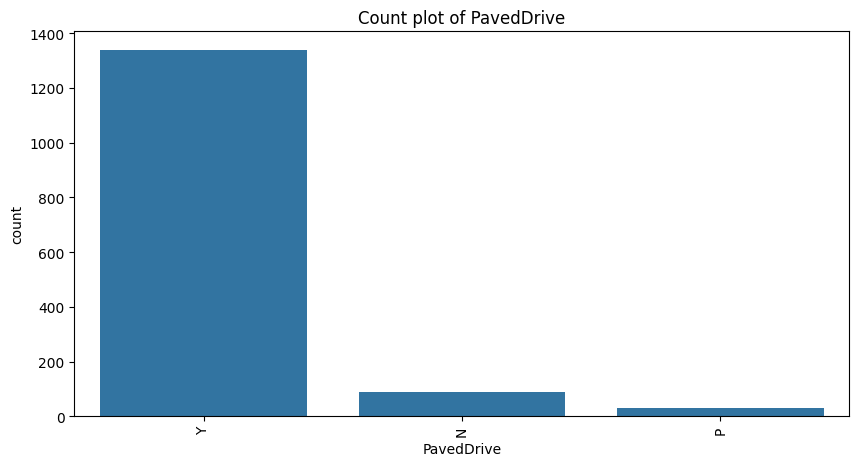

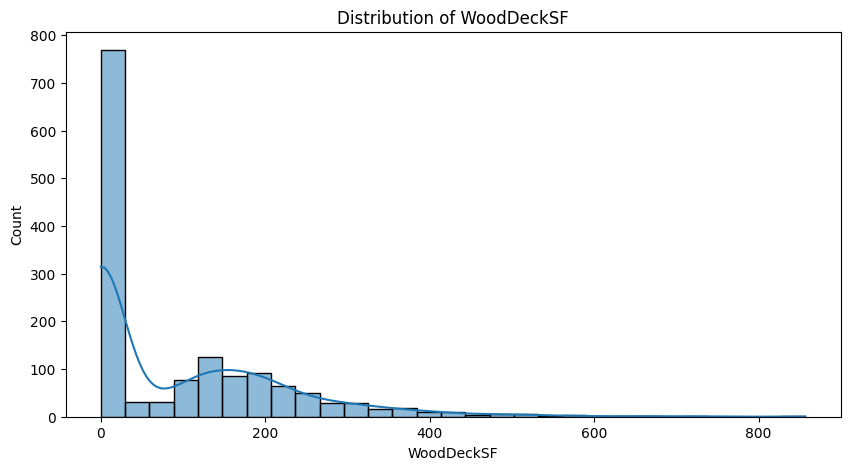

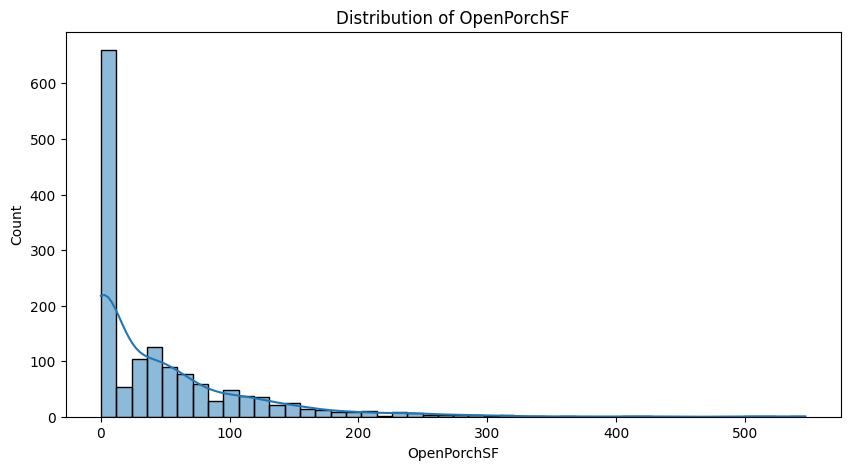

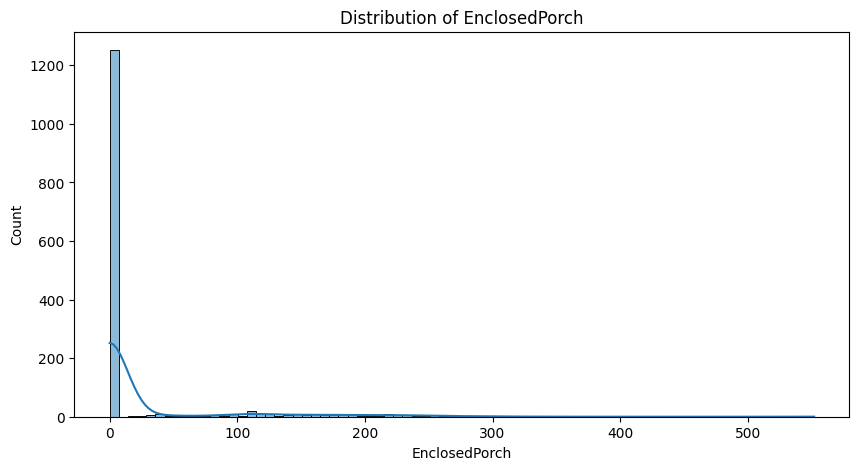

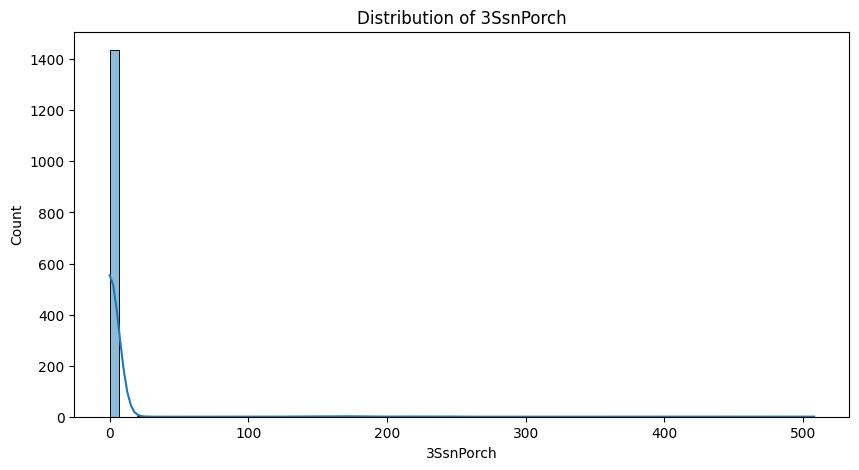

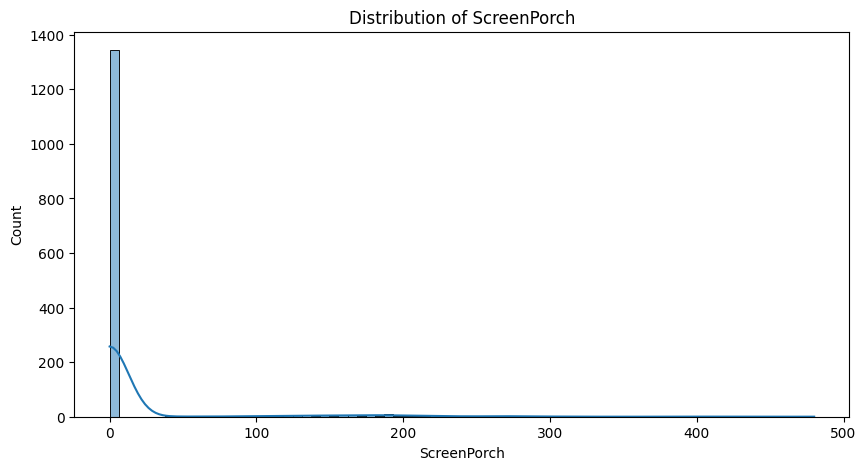

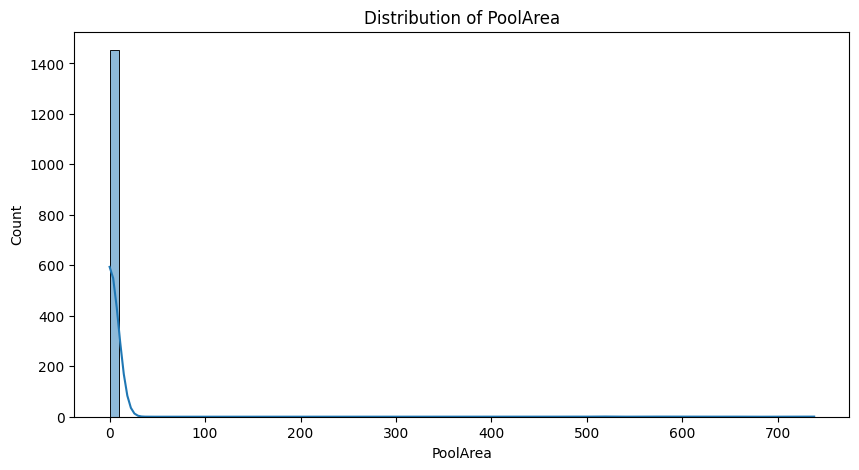

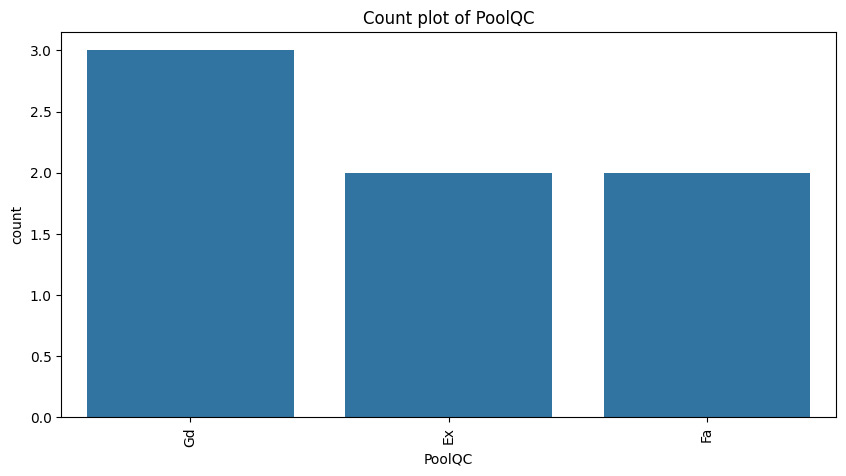

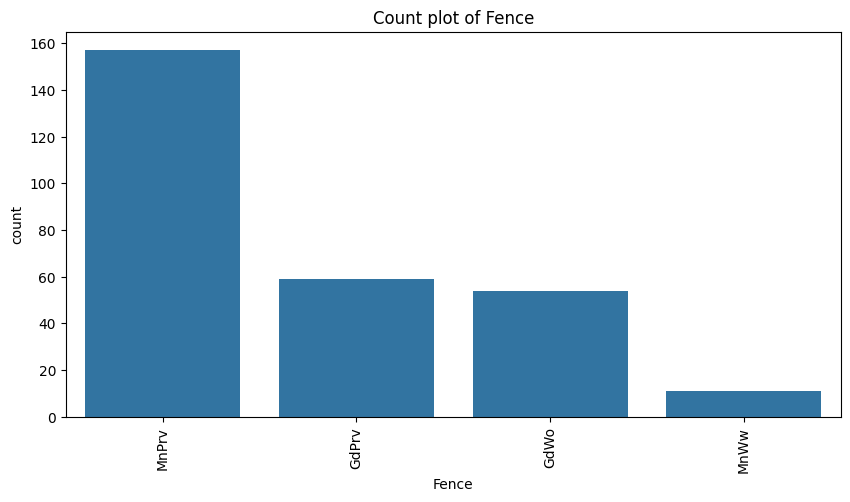

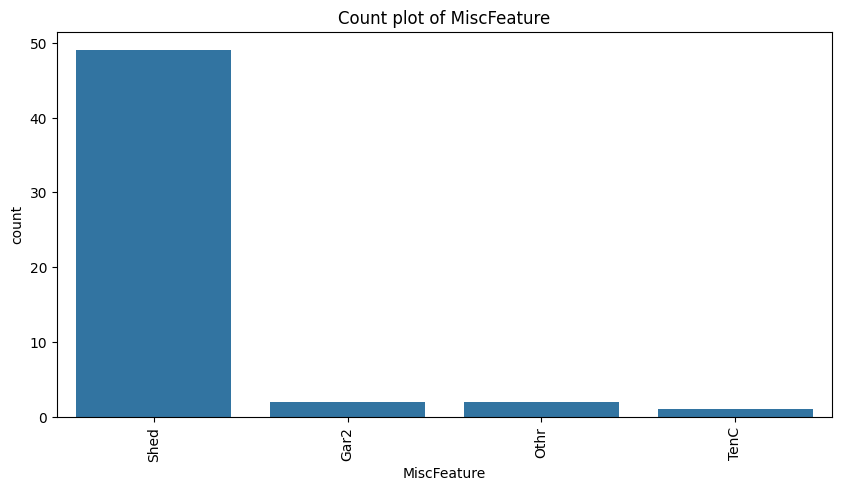

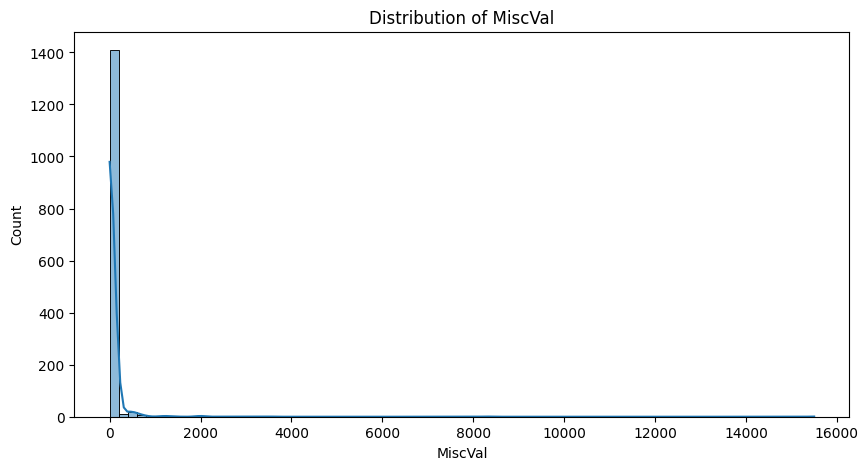

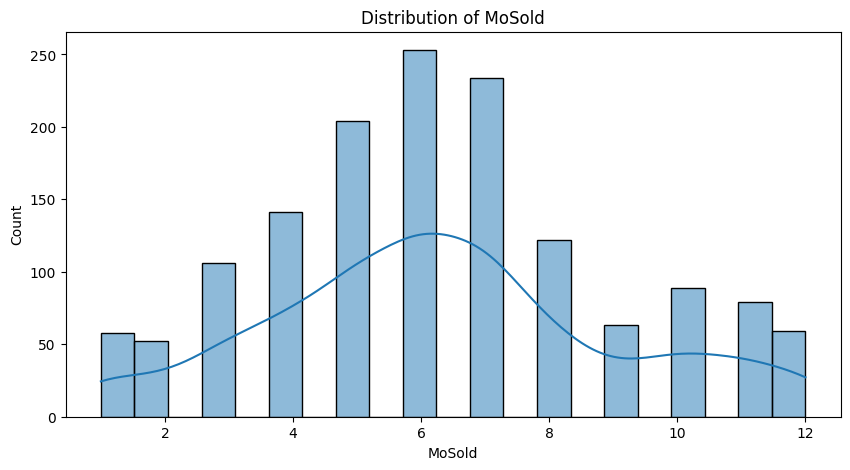

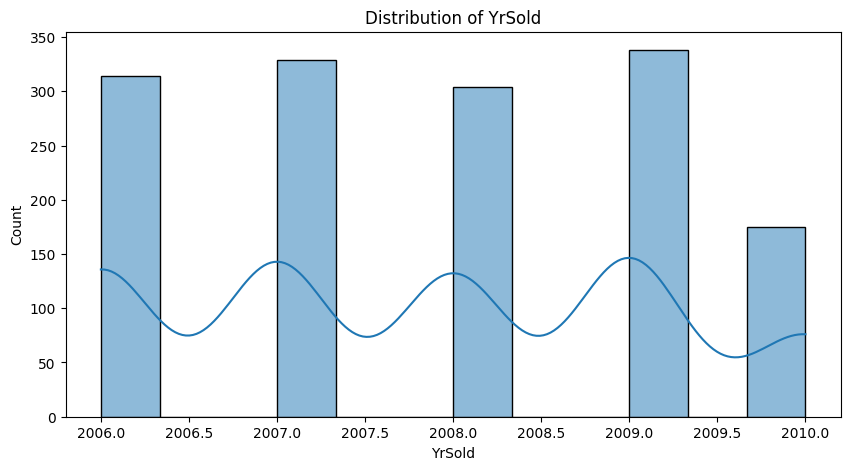

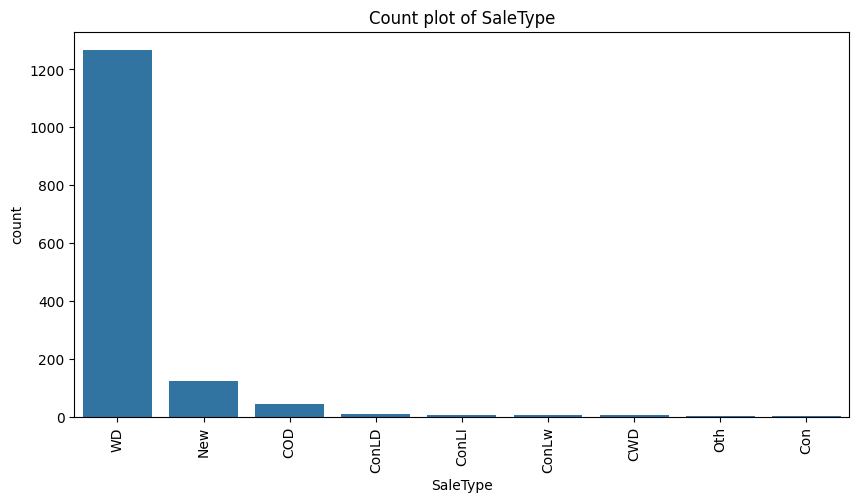

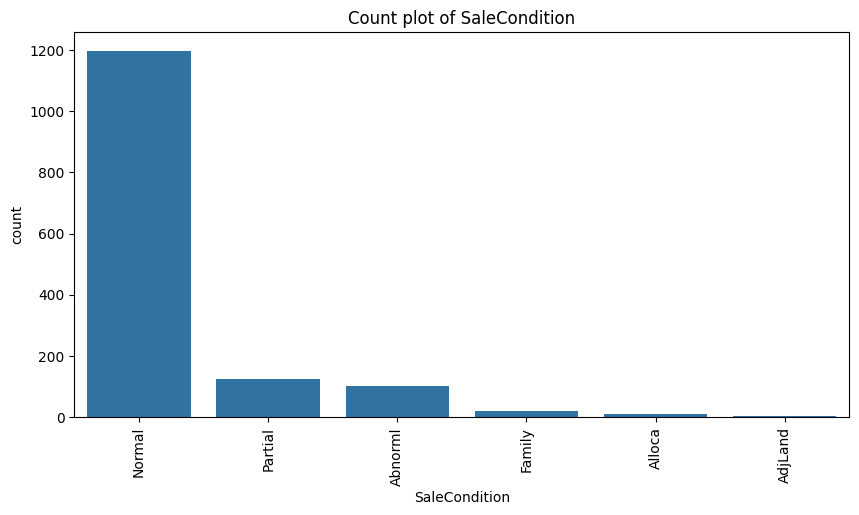

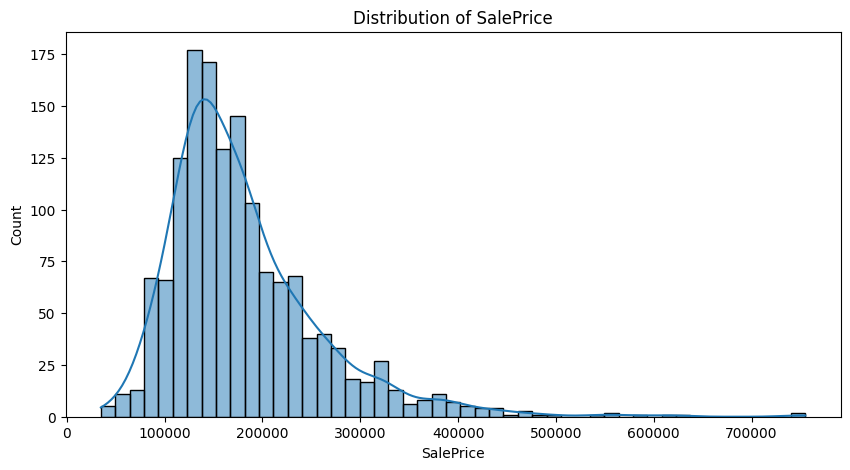

In [174]:
# Univariate analysis
def univariate_analysis(df_copy):
    for col in df_copy.columns:
        if df_copy[col].dtype == 'object':
           plt.figure(figsize=(10, 5))
           sns.countplot(x=df_copy[col], order=df_copy[col].value_counts().index)
           plt.title(f"Count plot of {col}")
           plt.xticks(rotation=90)
           plt.show()
        else:
            plt.figure(figsize=(10, 5))
            sns.histplot(df_copy[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.show()
univariate_analysis(df_copy)

In [175]:
# Bivariate analysis can be done to understand the relationship between features and the target variable (Survived).
def bivariate_analysis(df_copy, target):
    # Identify the target type
    if df_copy[target].dtype == 'object' or df_copy[target].nunique() < 10:
        target_type = 'categorical'
    else:
        target_type = 'continuous'
    for feature in df_copy.columns:
        if feature == target:
            continue
        # feature is categorical
        plt.figure(figsize=(10, 5))
        if df_copy[feature].dtype == 'object' or df_copy[feature].nunique() < 10:
            if target_type == 'categorical':
                sns.countplot(x=feature, hue=target, data=df_copy)
                plt.title(f'{feature} vs {target}')
                plt.xticks(rotation=45)
                plt.show()
            else:
                # Check skewness of the target variable
                skewness = df_copy[target].skew()
                if abs(skewness) > 1:
                    agg_func = 'median'
                    temp=df_copy.groupby(feature)[target].median().reset_index()
                else:
                    agg_func = 'mean'
                    temp=df_copy.groupby(feature)[target].mean().reset_index()
                sns.barplot(x=feature, y=target, data=temp)
                plt.title(f'{feature} vs {target} ({agg_func})')
        # feature is continuous
        else:
            if target_type == 'categorical':
                sns.boxplot(x=target, y=feature, data=df_copy)
                plt.title(f'{target} vs {feature}')
            else:
                sns.scatterplot(x=feature, y=target, data=df_copy)
                plt.title(f'{feature} vs {target}')
        plt.tight_layout()
        plt.show()

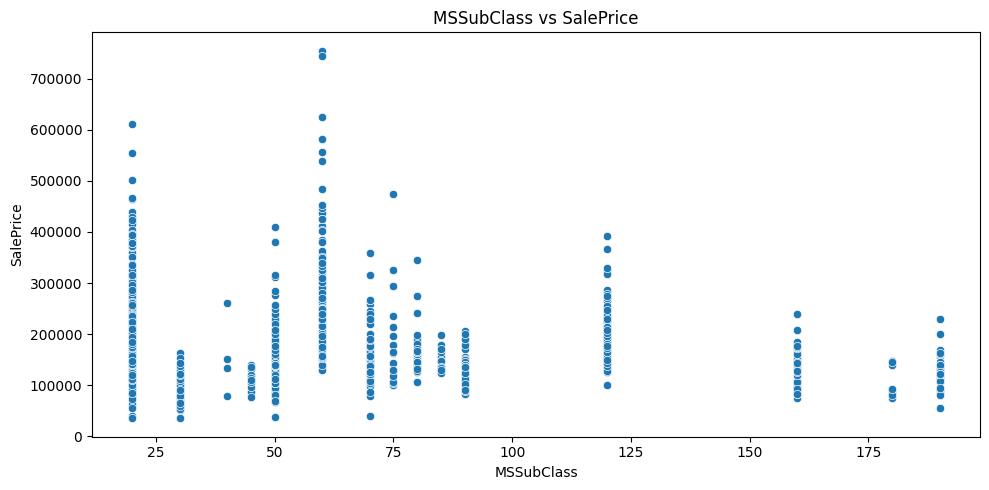

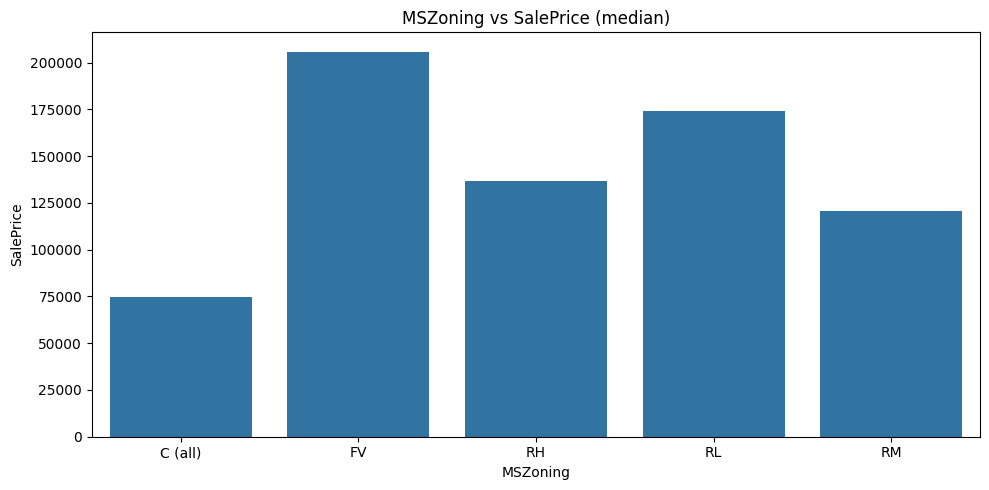

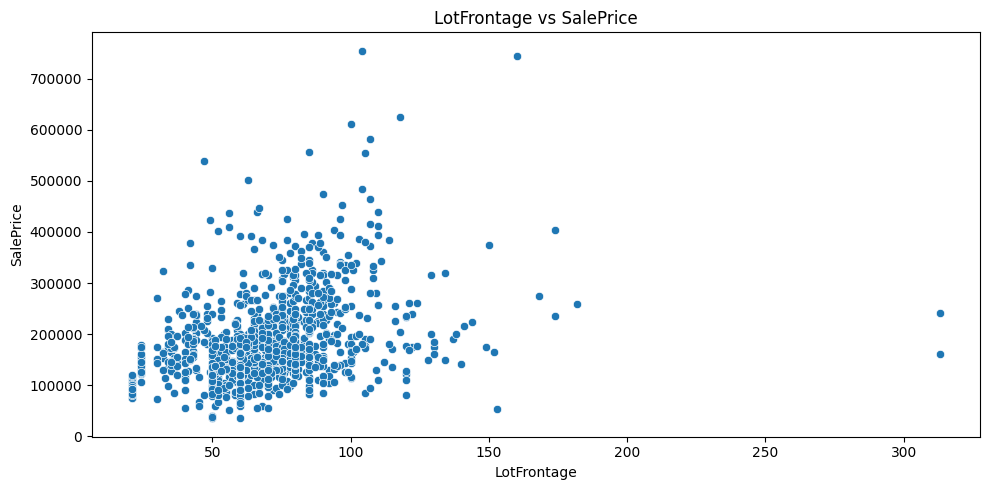

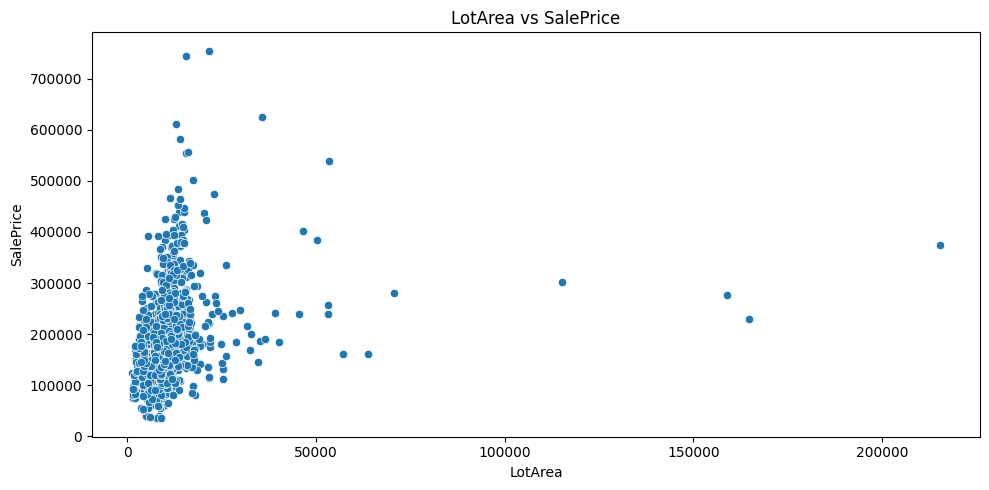

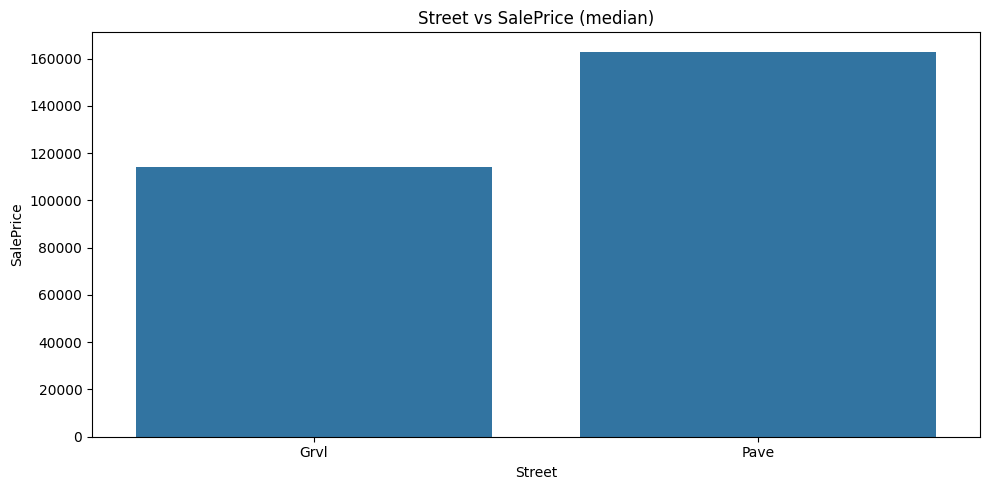

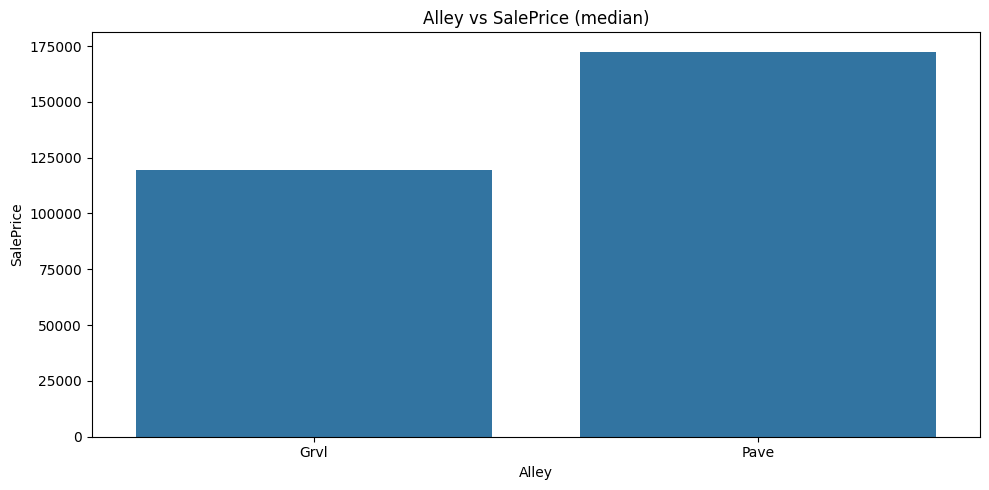

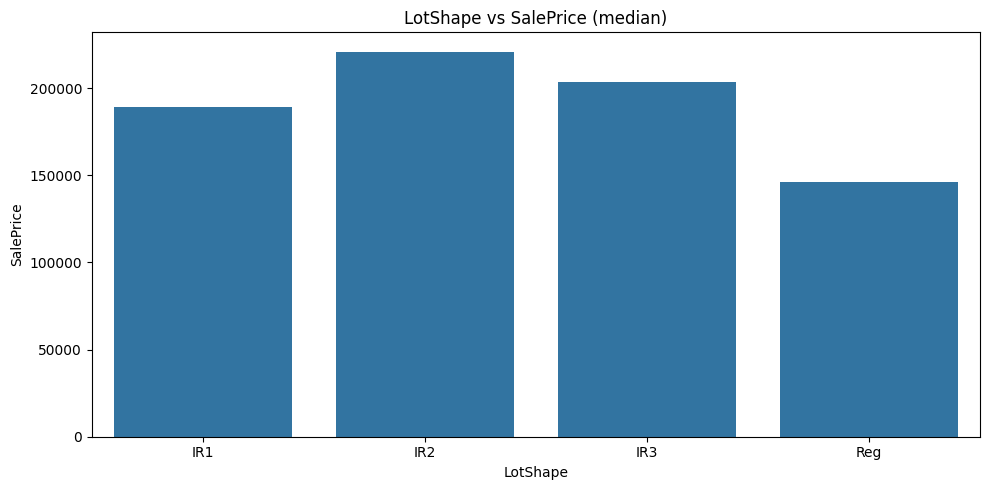

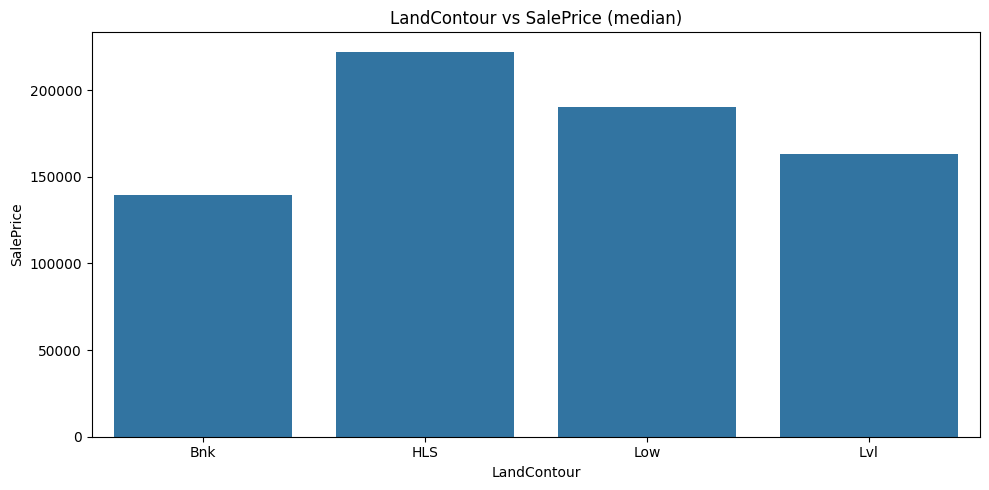

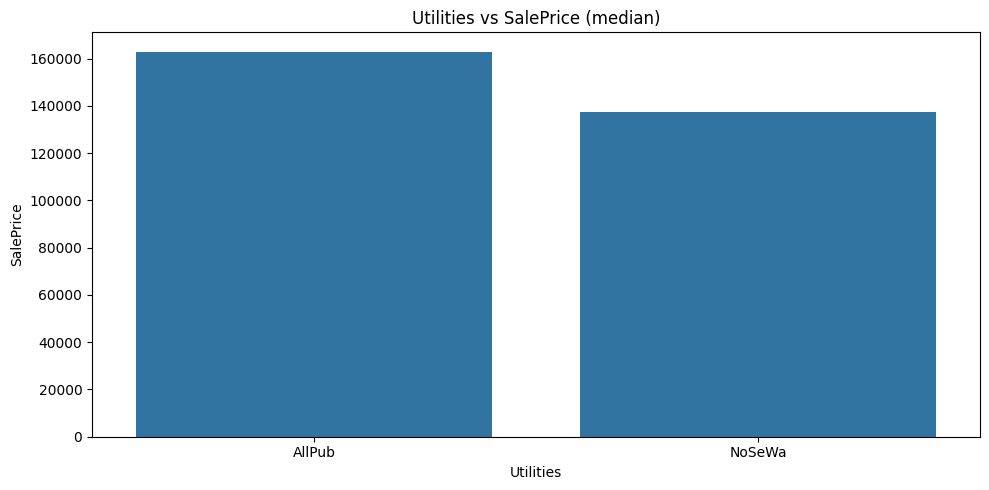

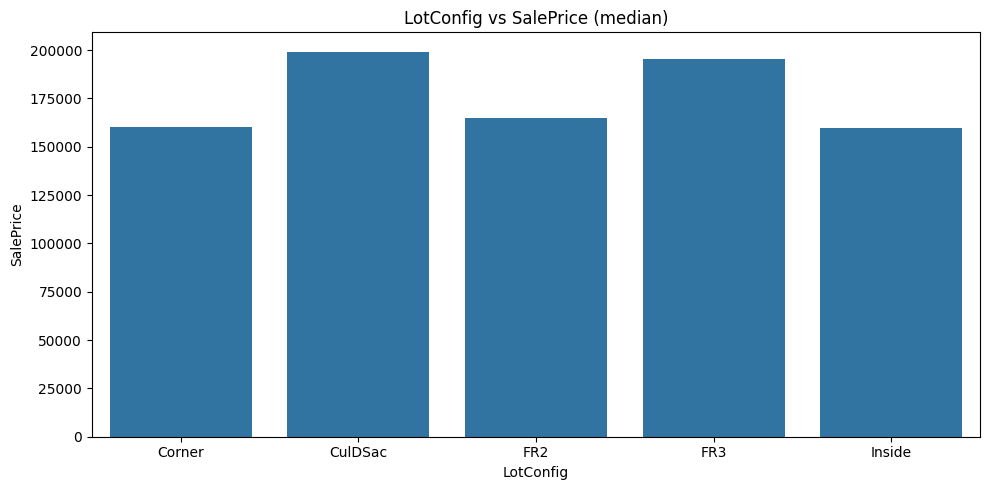

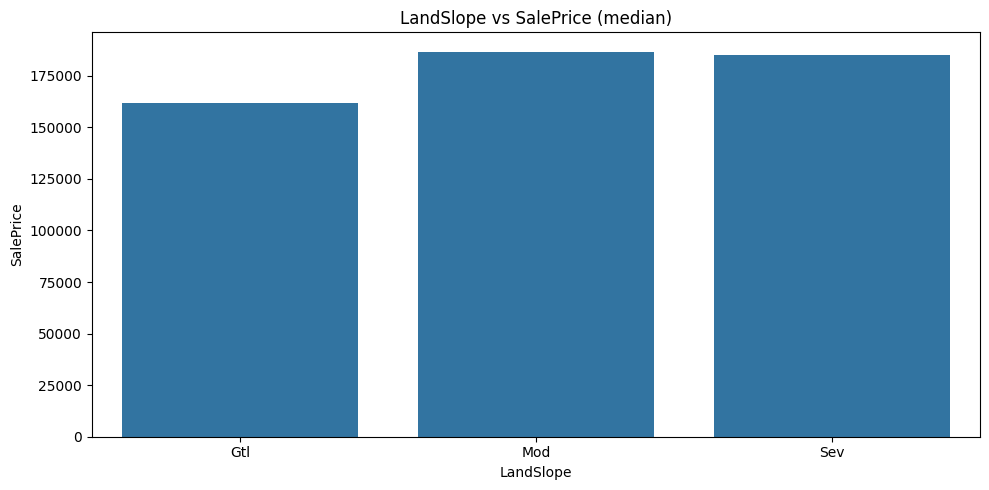

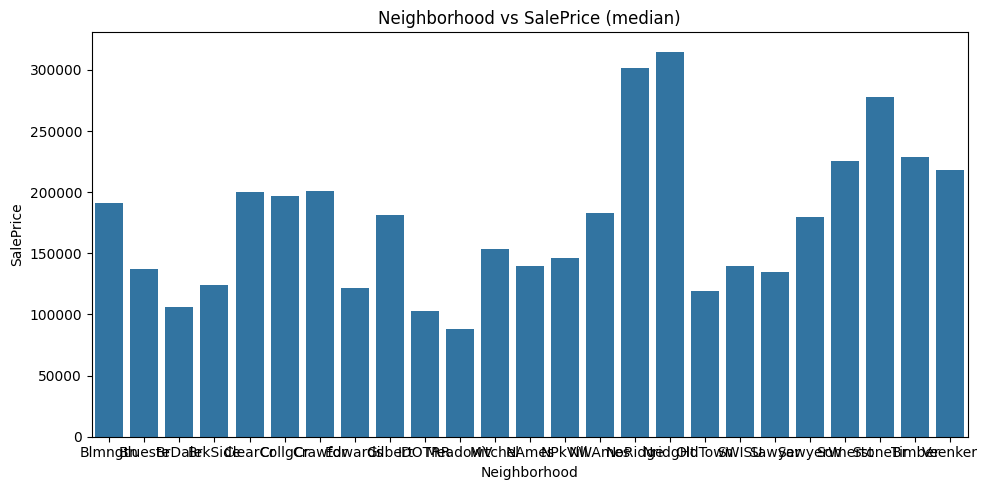

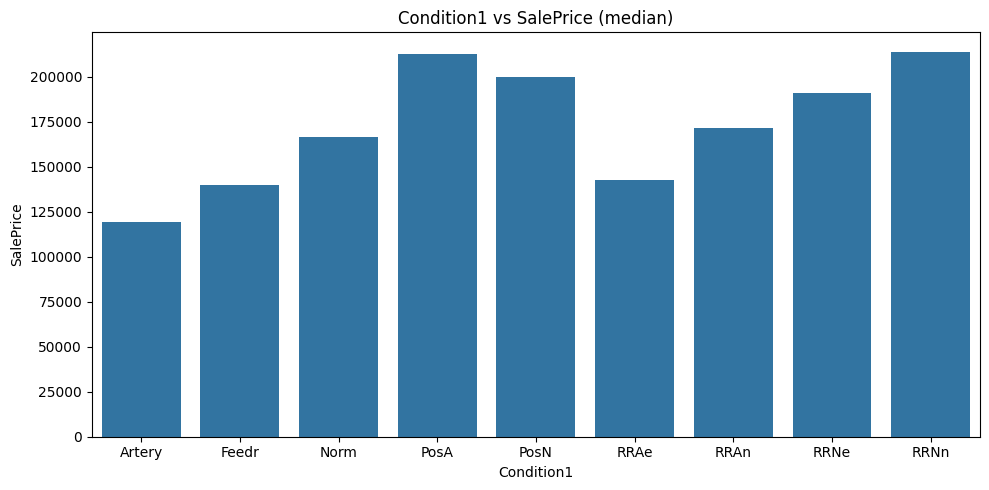

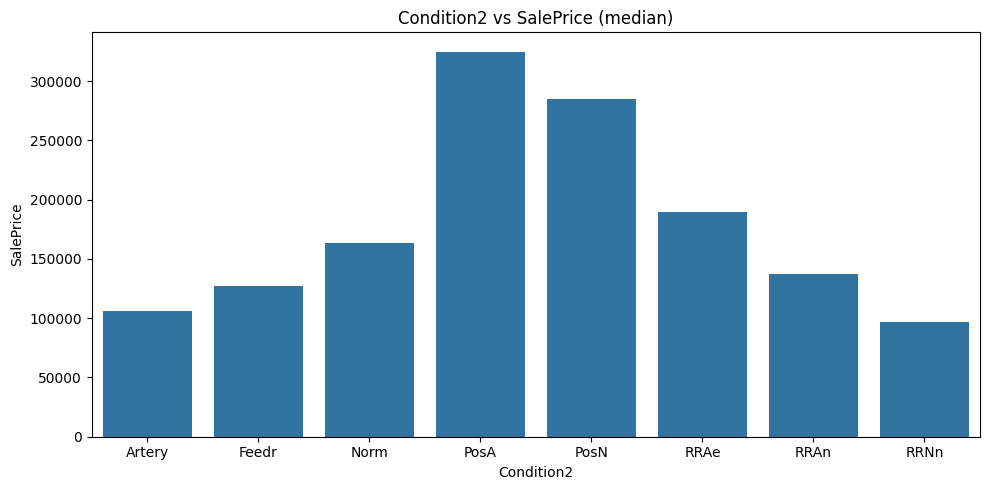

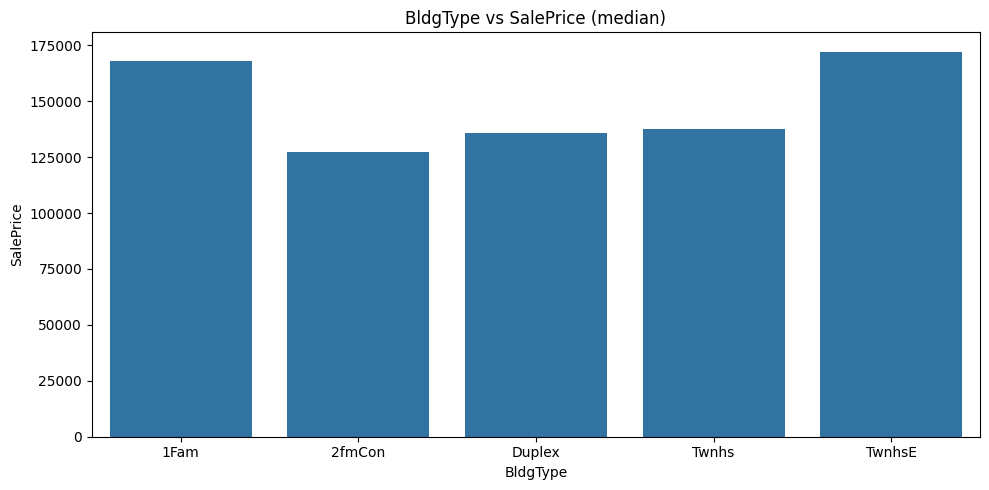

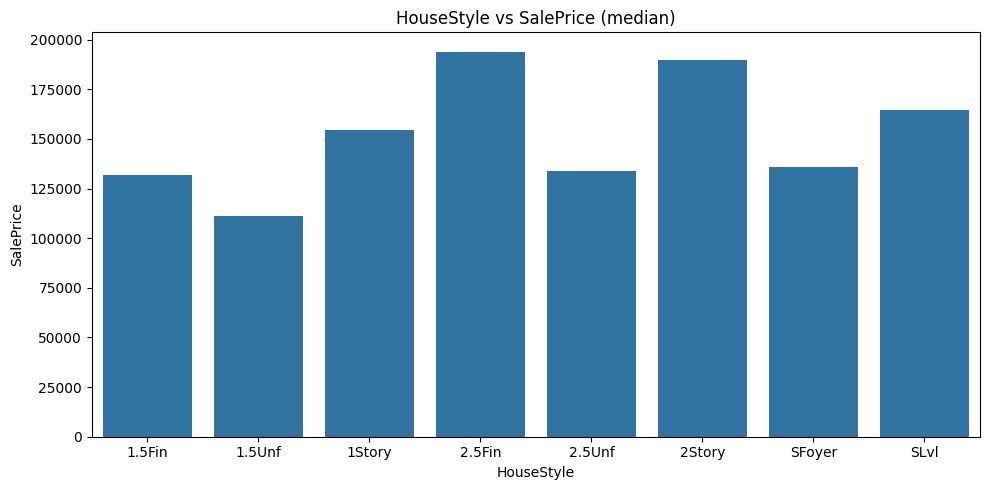

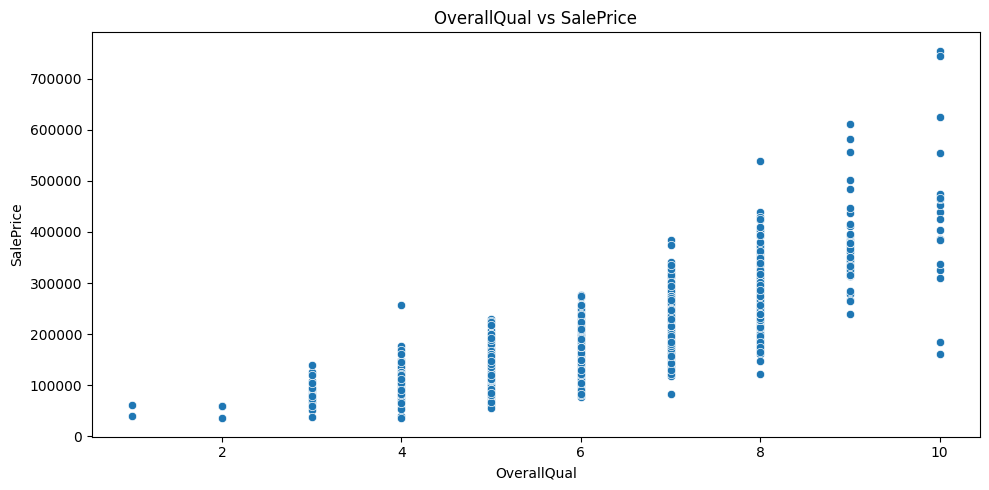

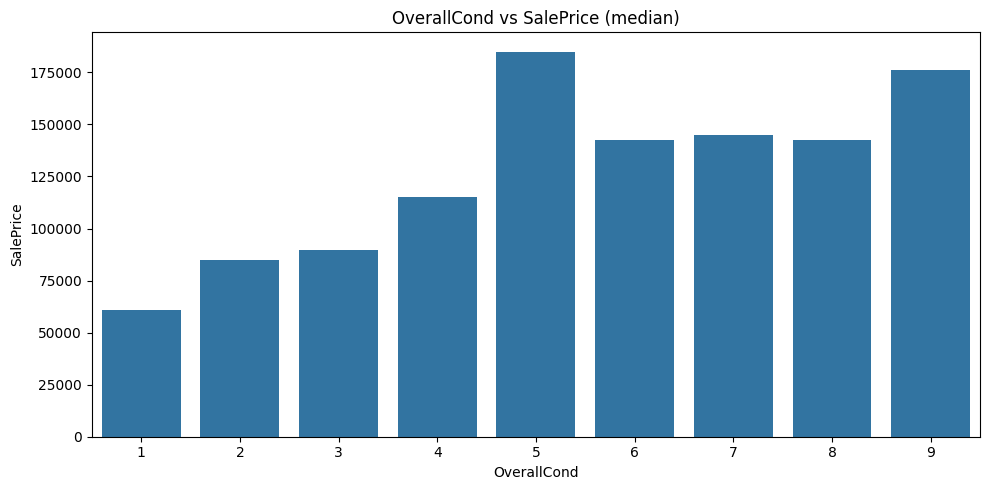

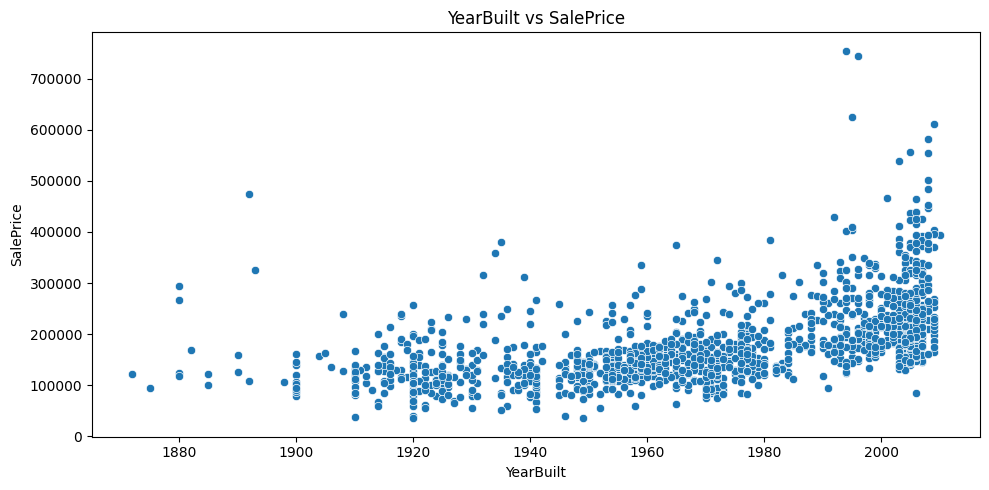

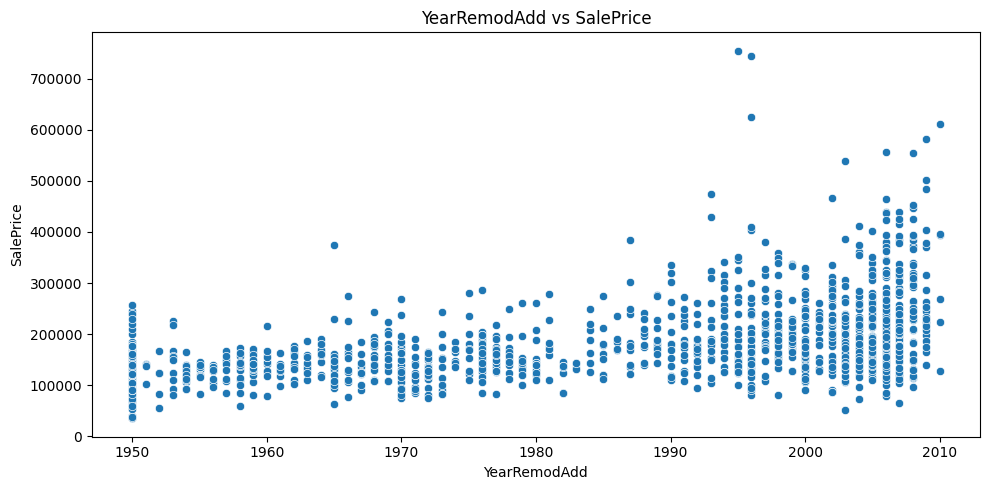

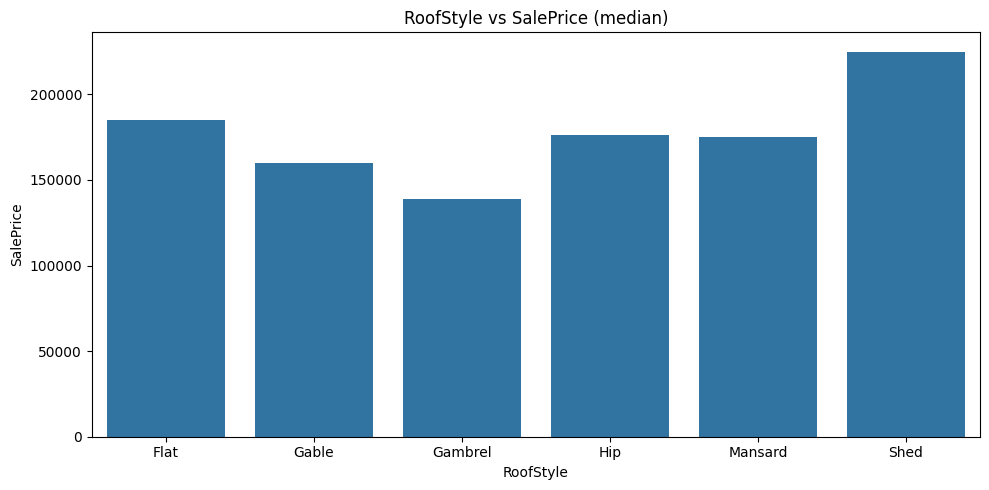

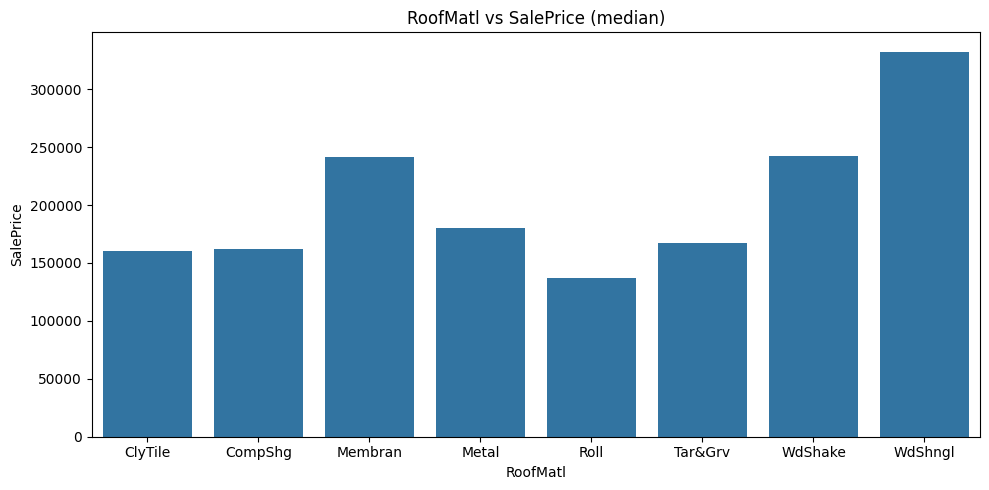

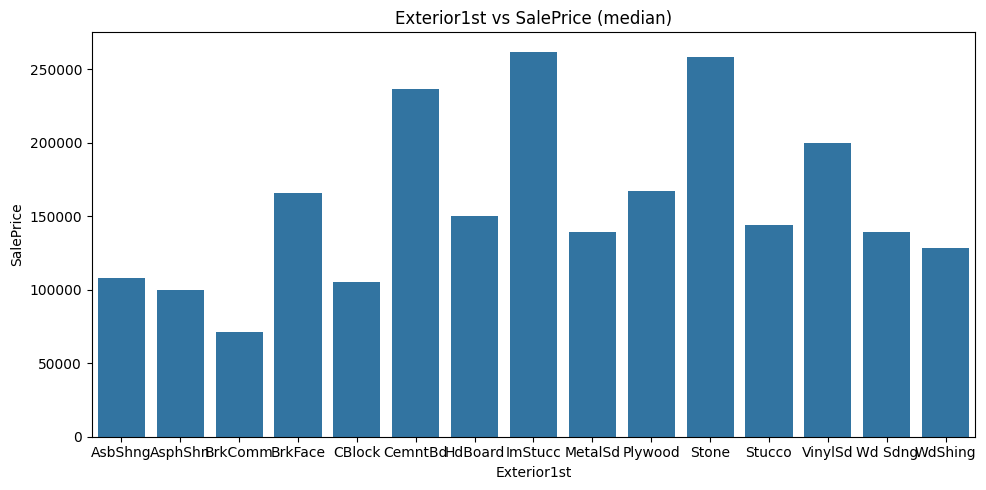

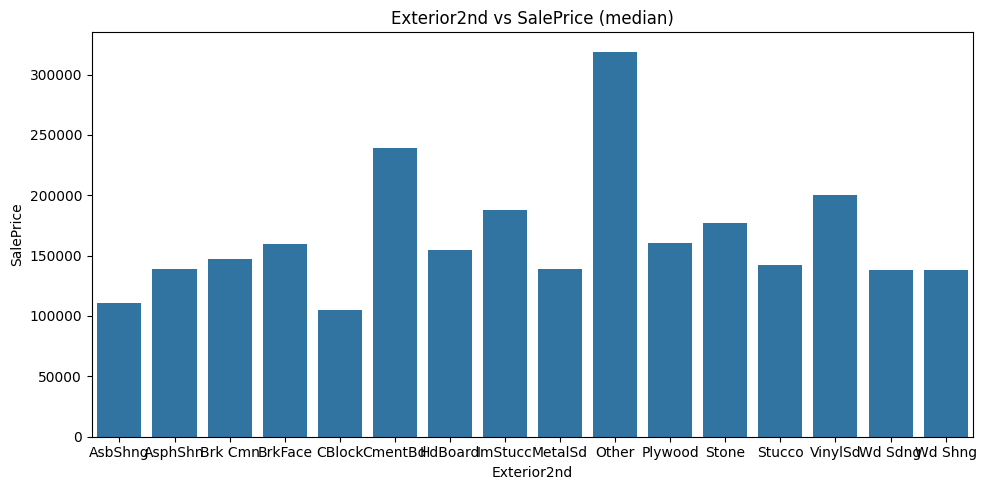

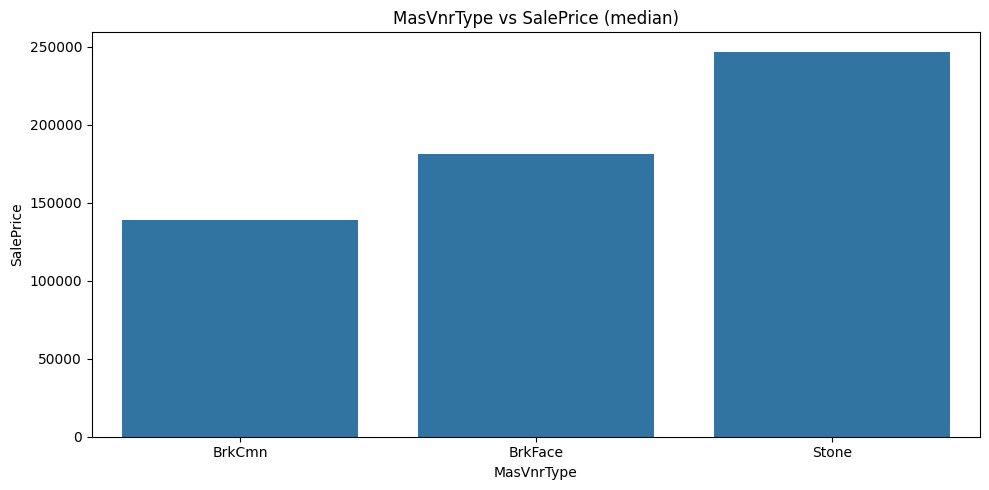

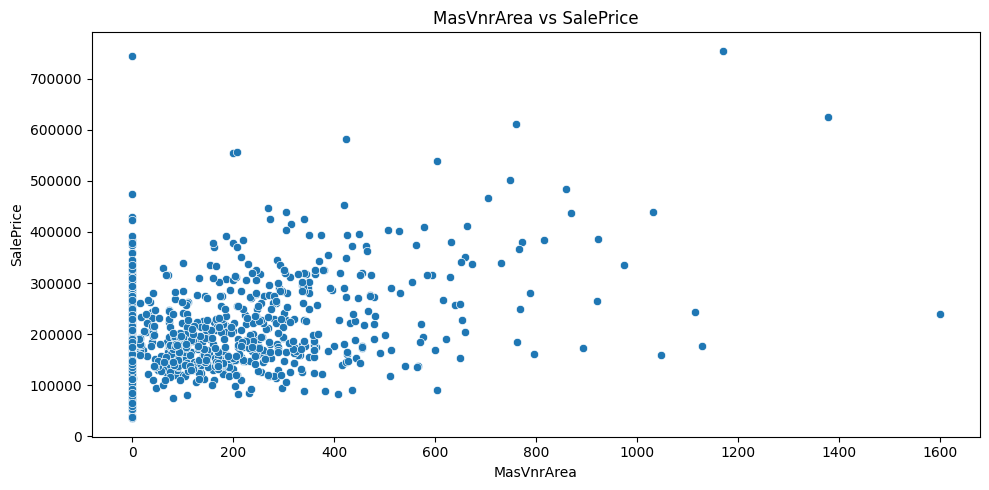

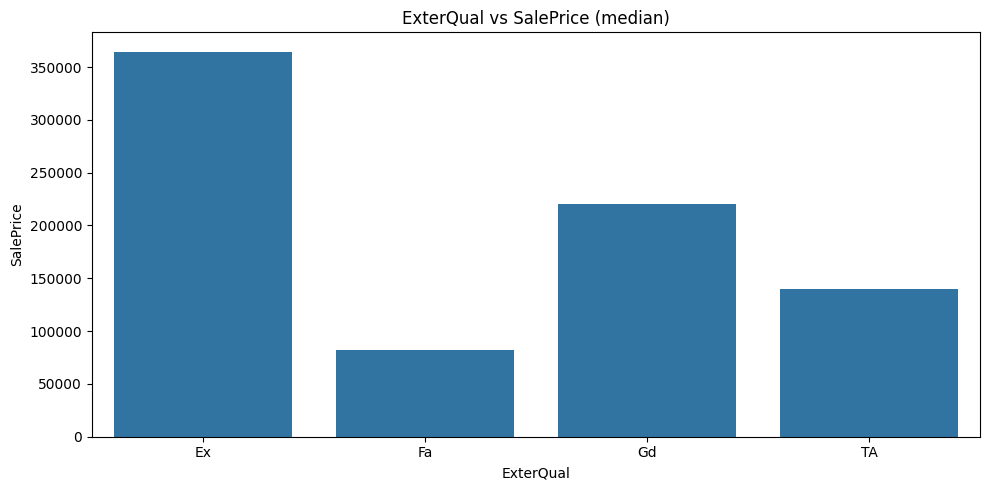

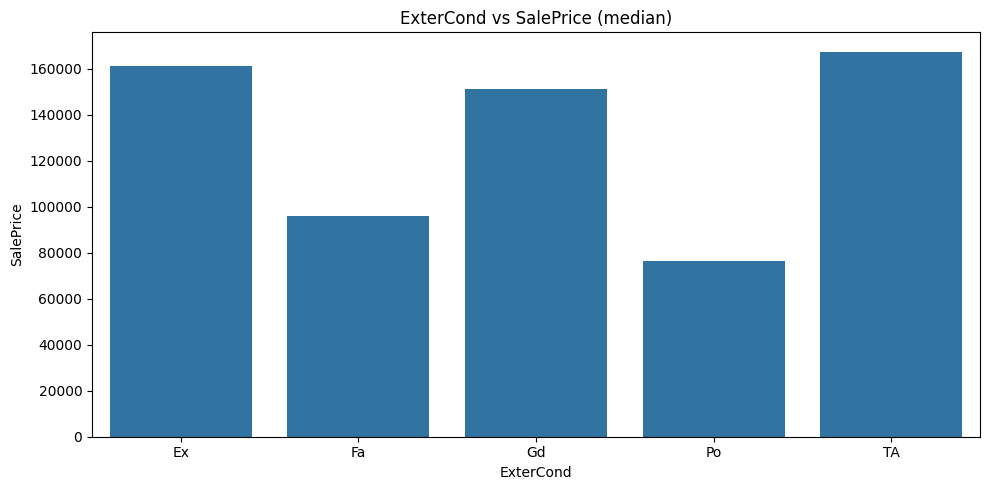

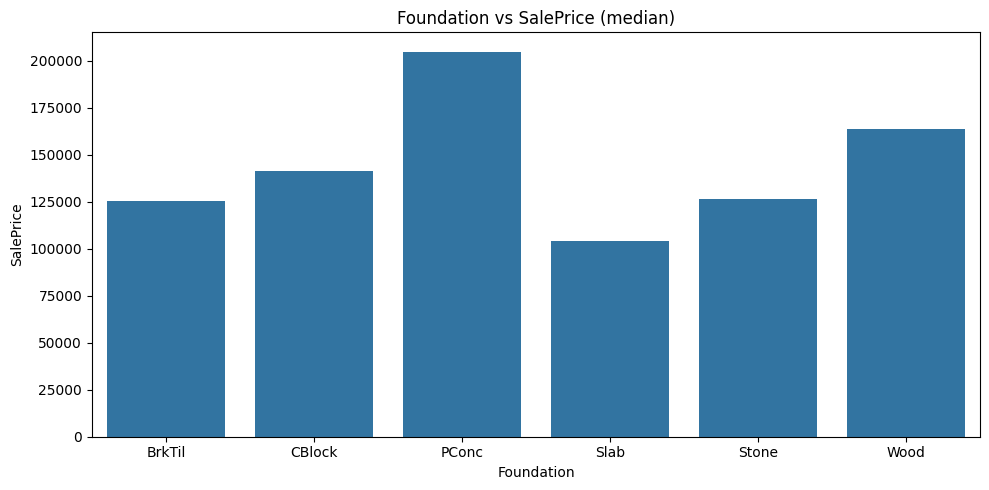

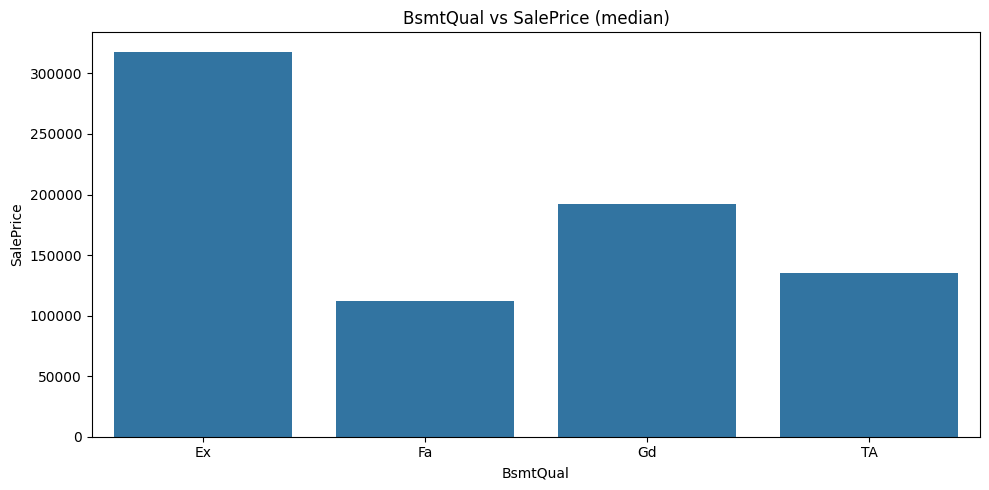

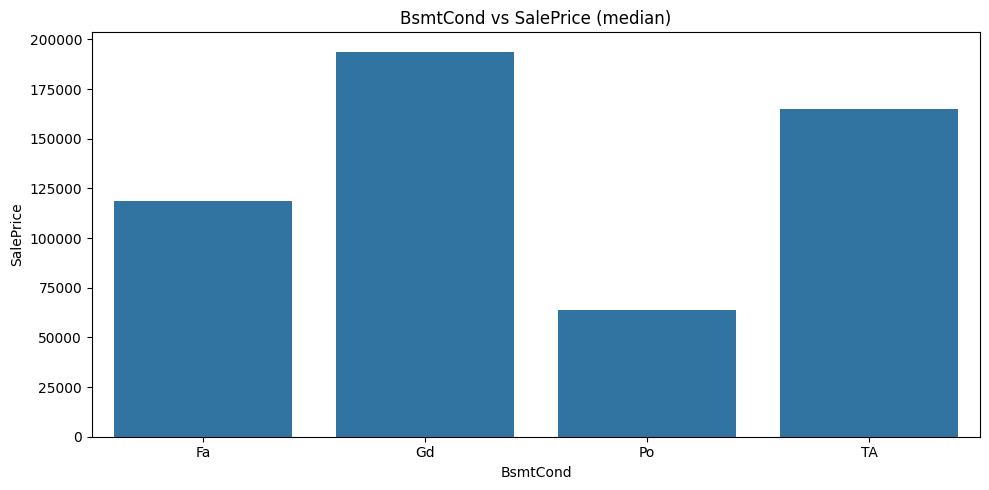

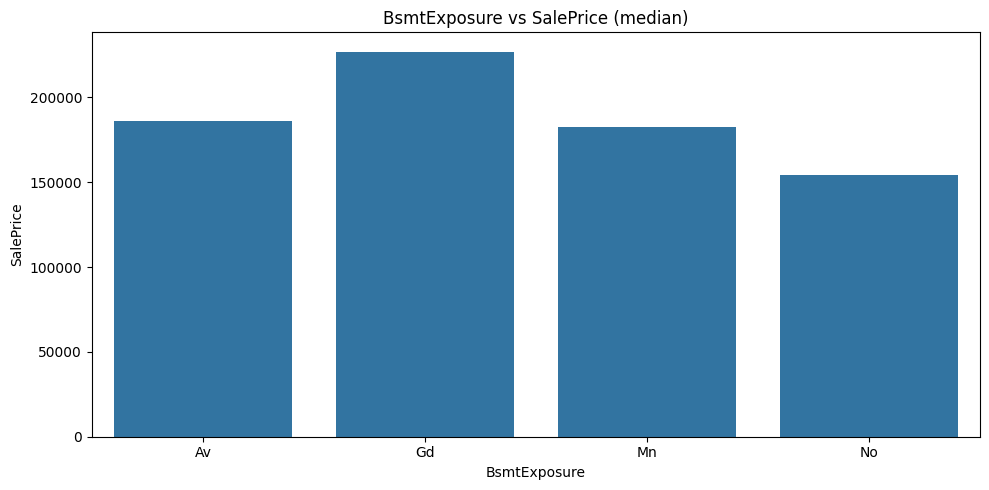

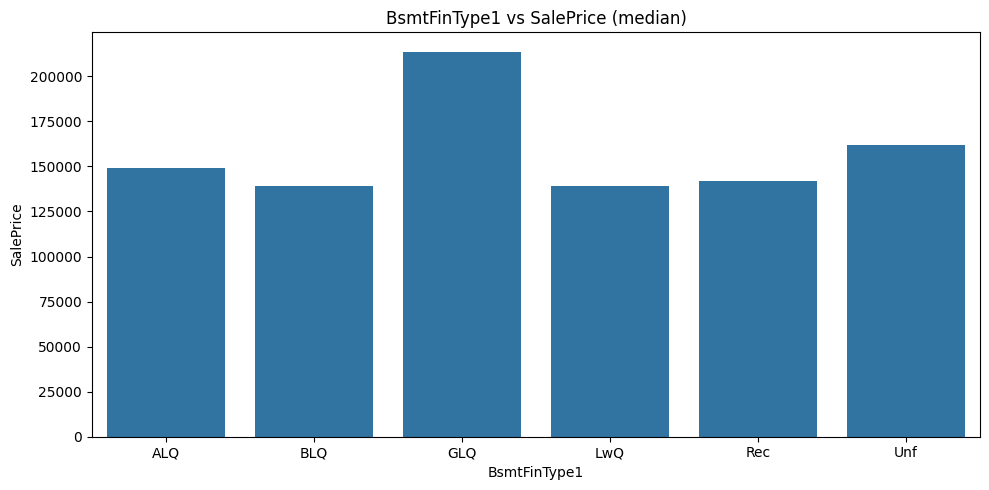

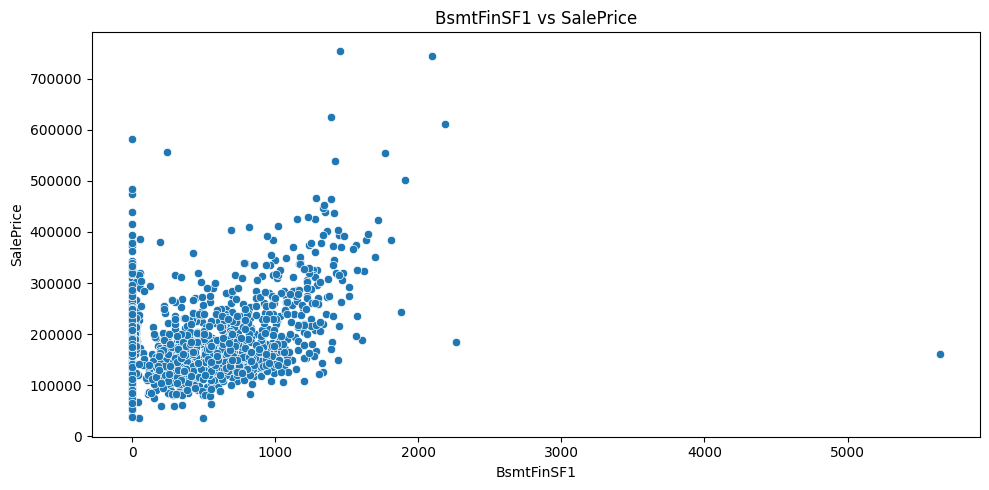

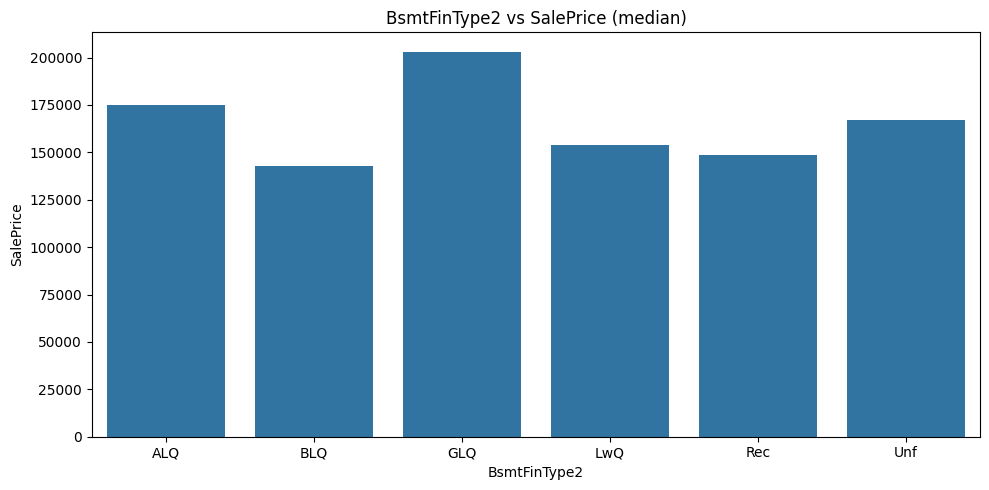

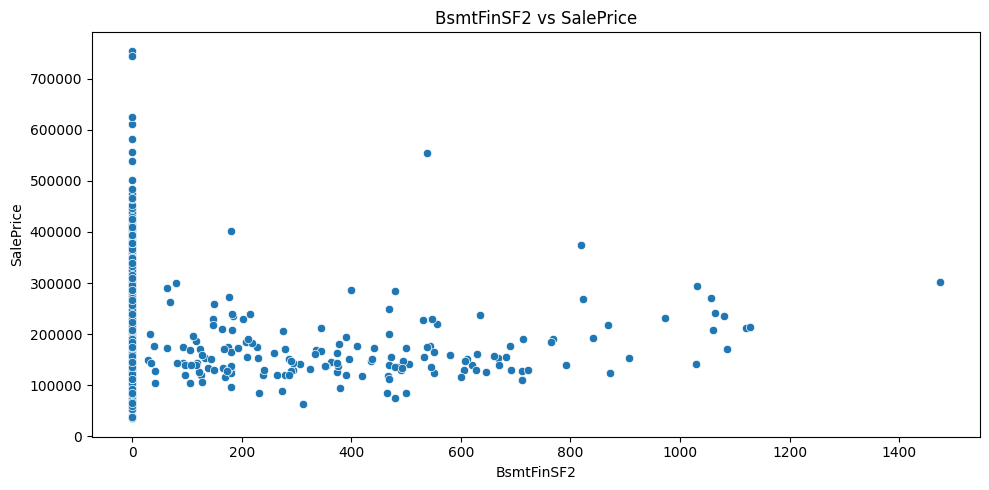

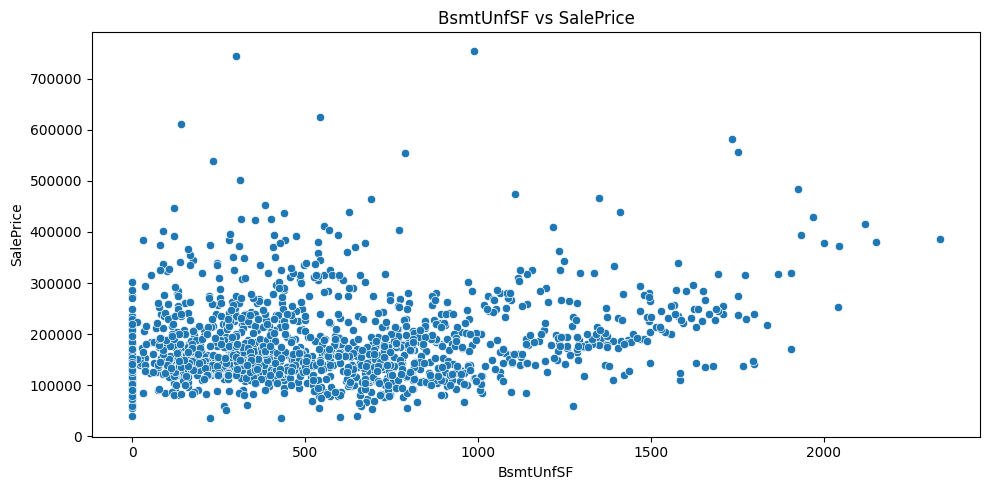

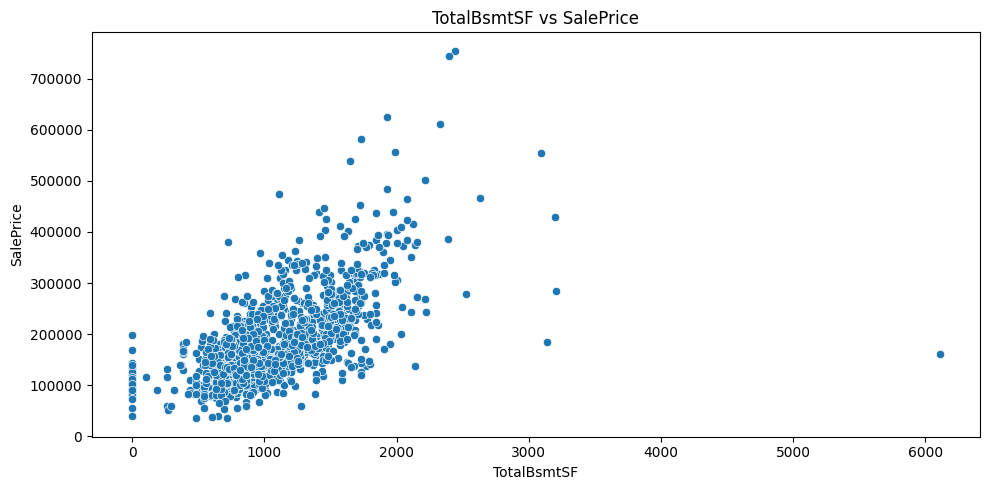

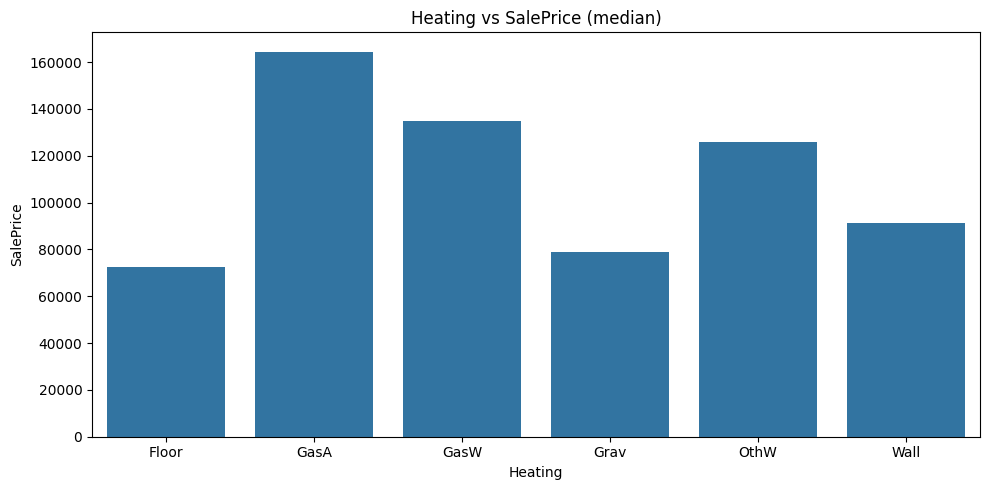

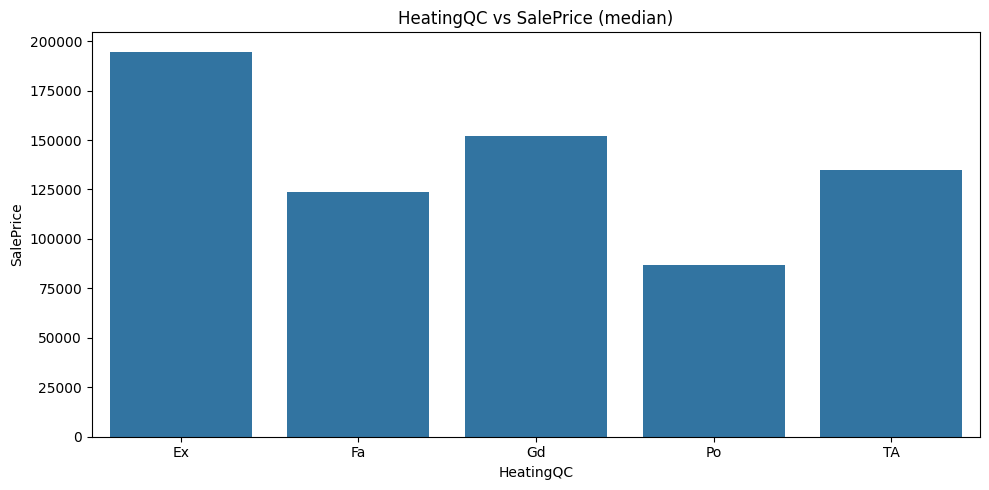

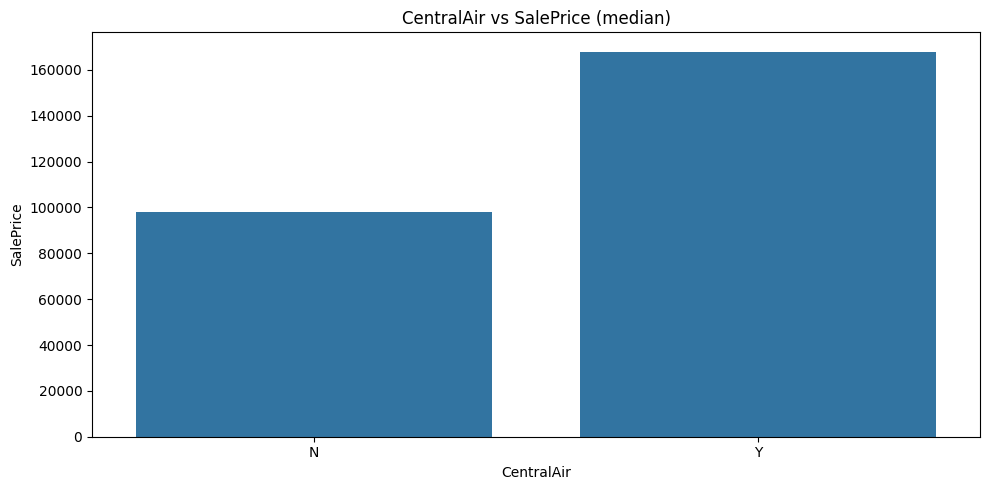

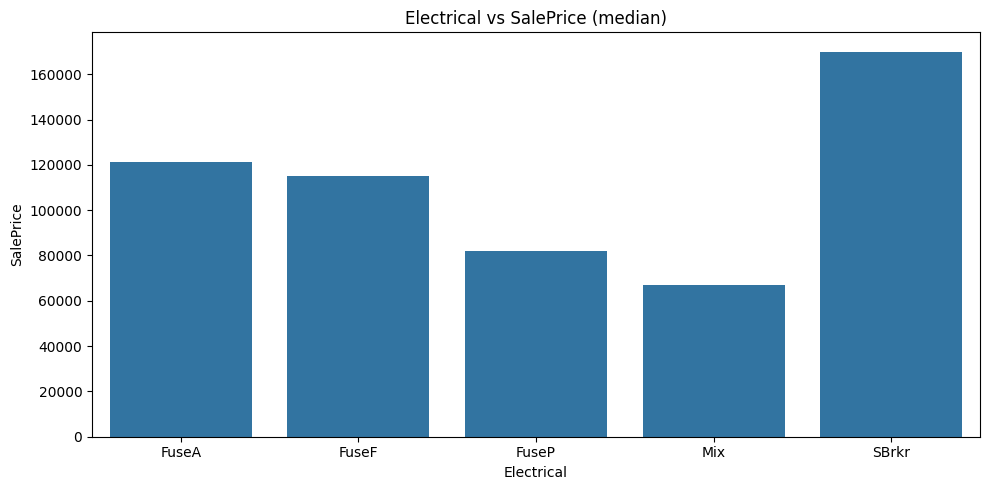

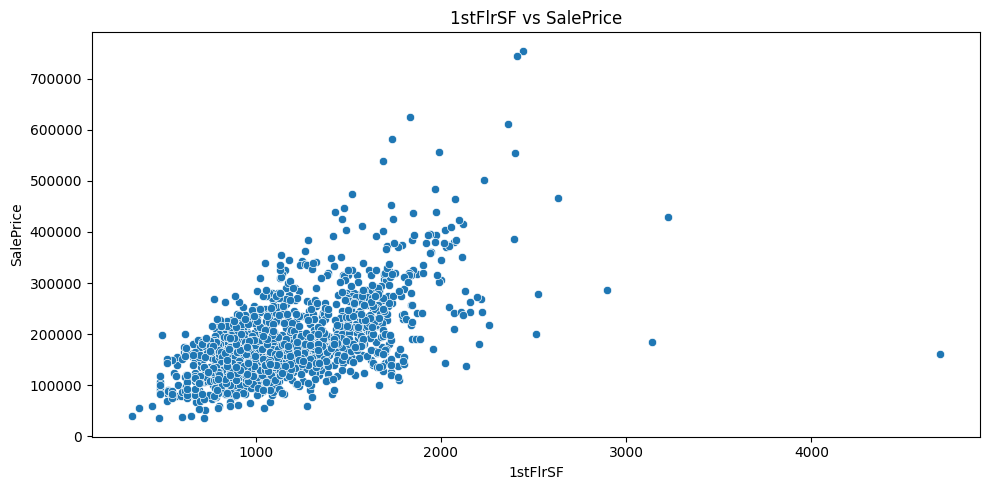

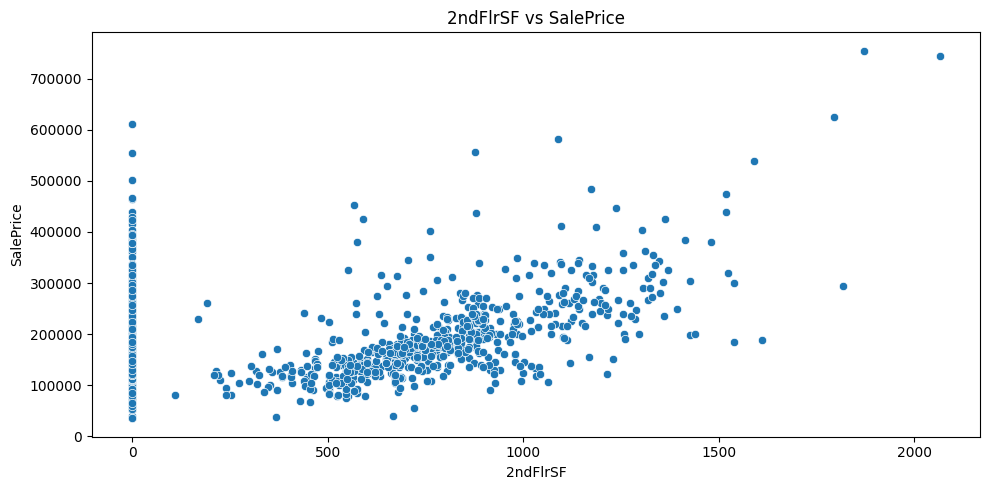

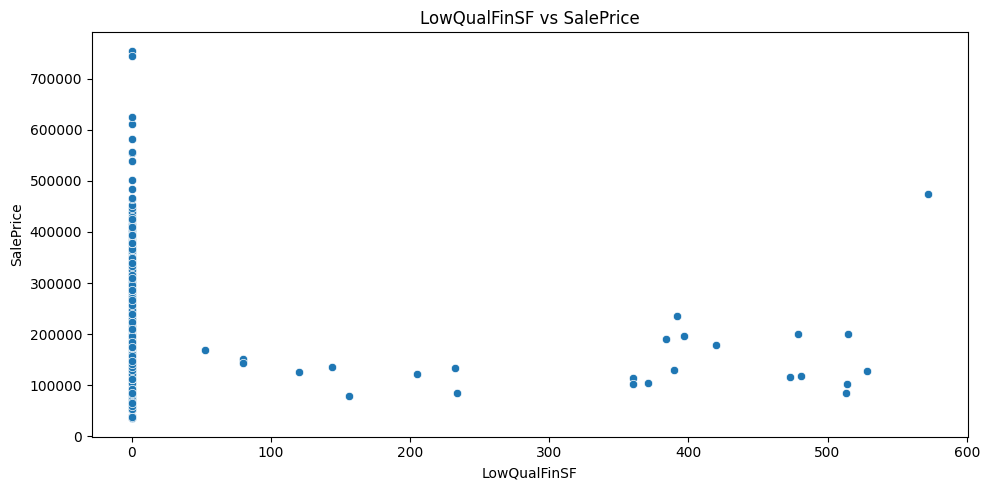

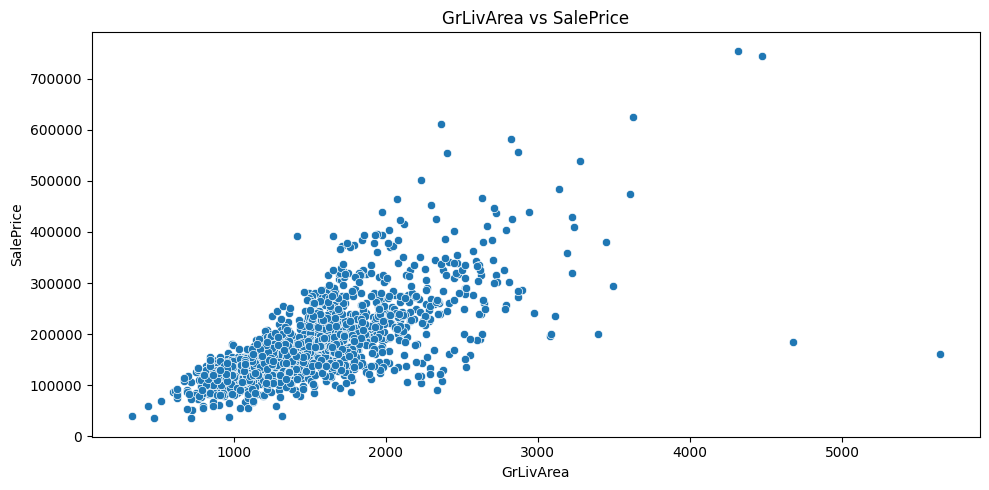

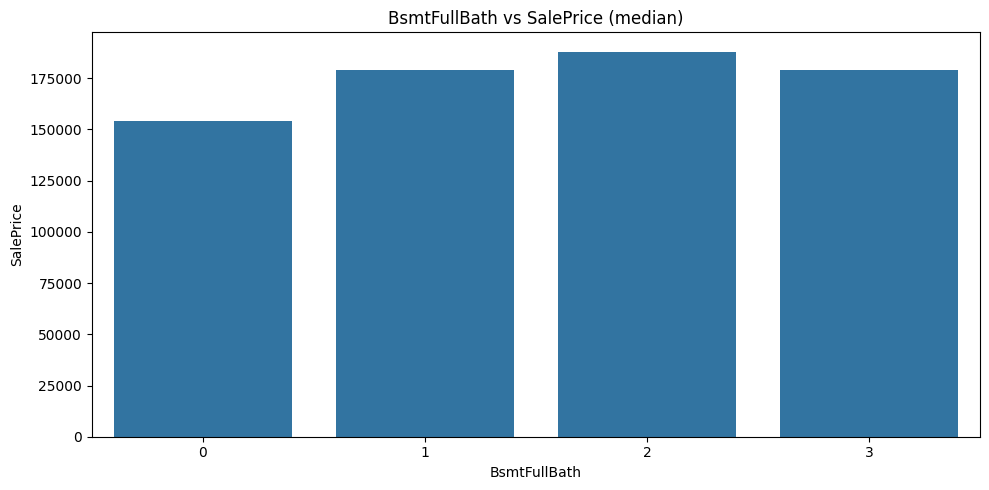

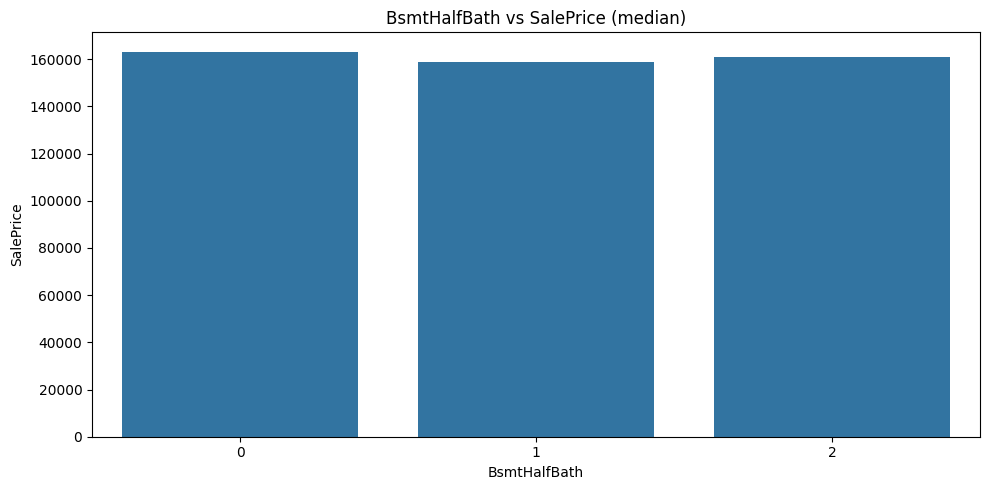

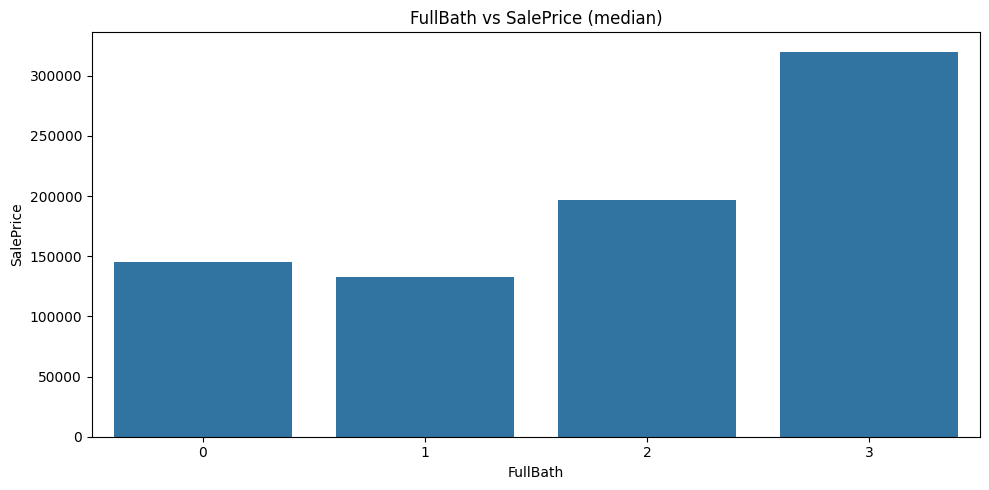

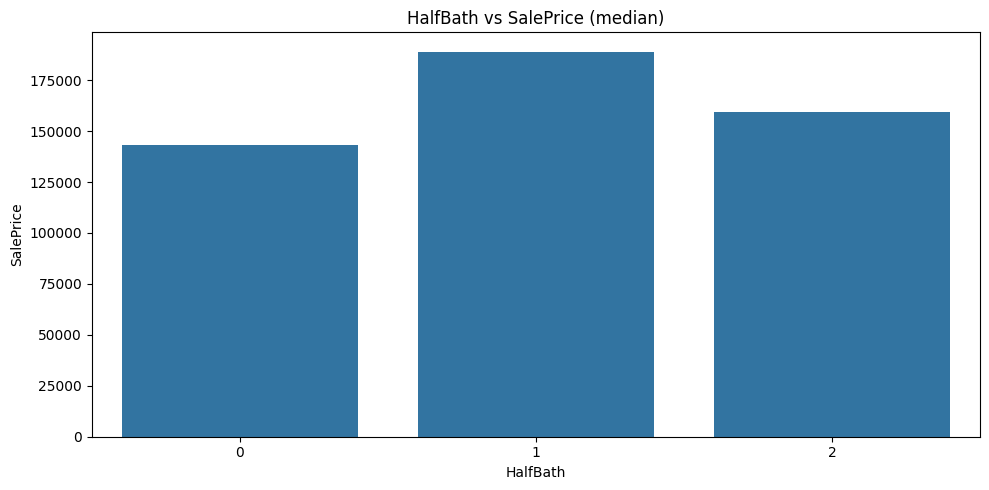

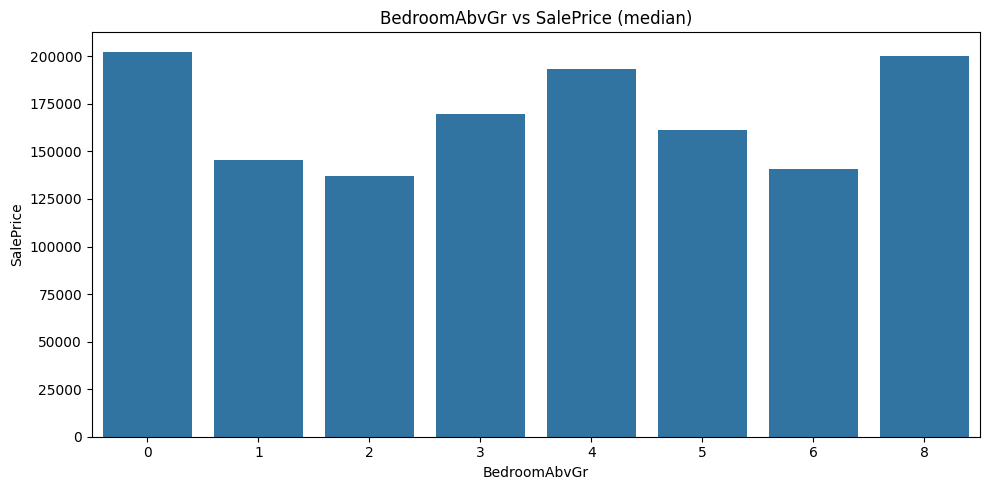

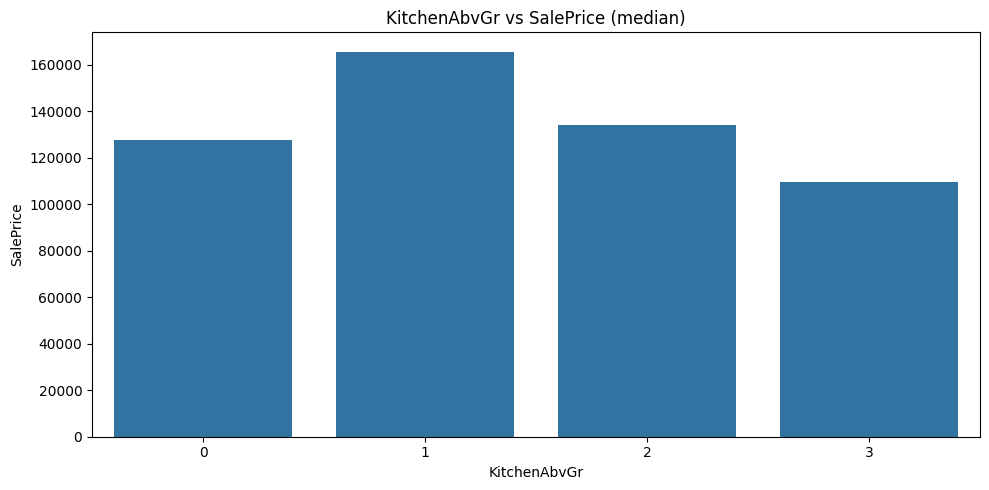

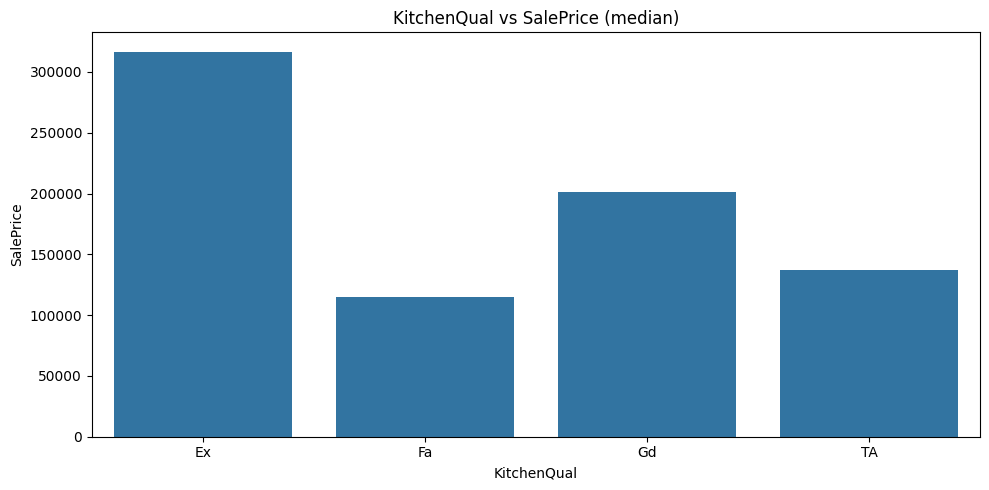

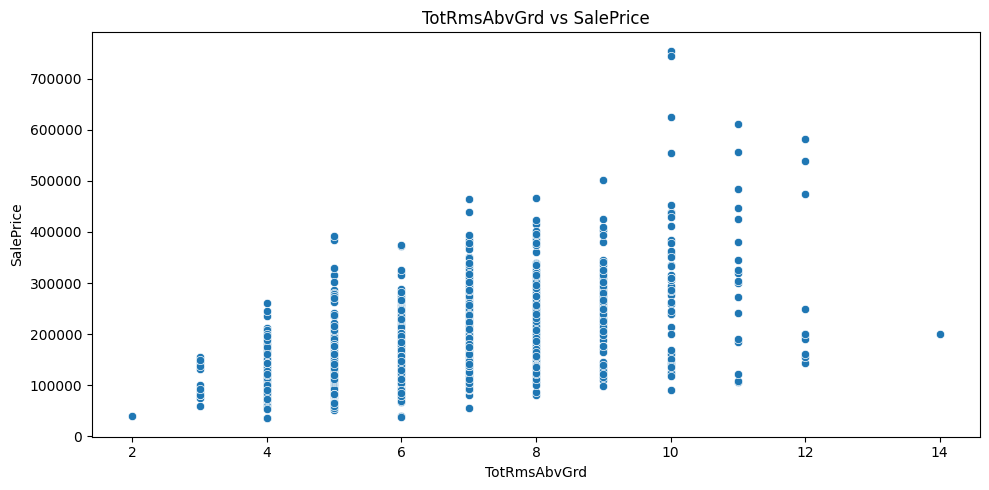

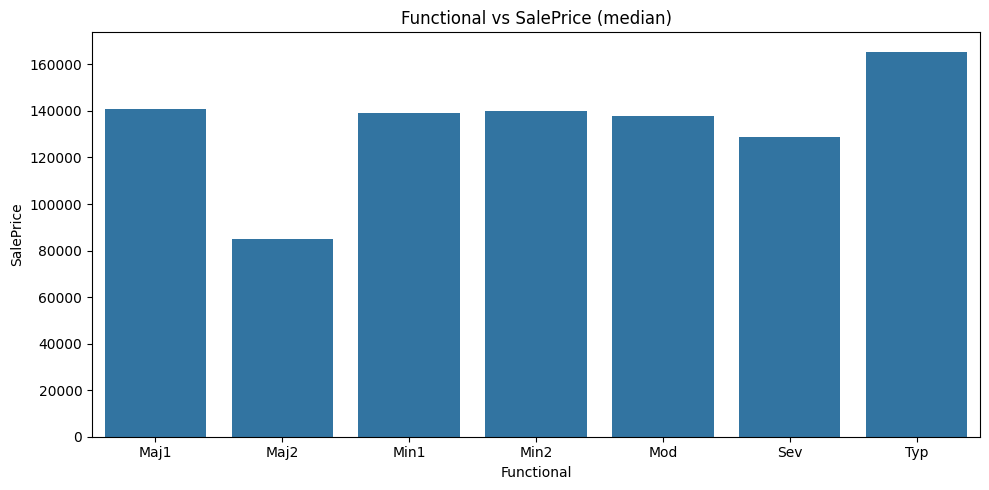

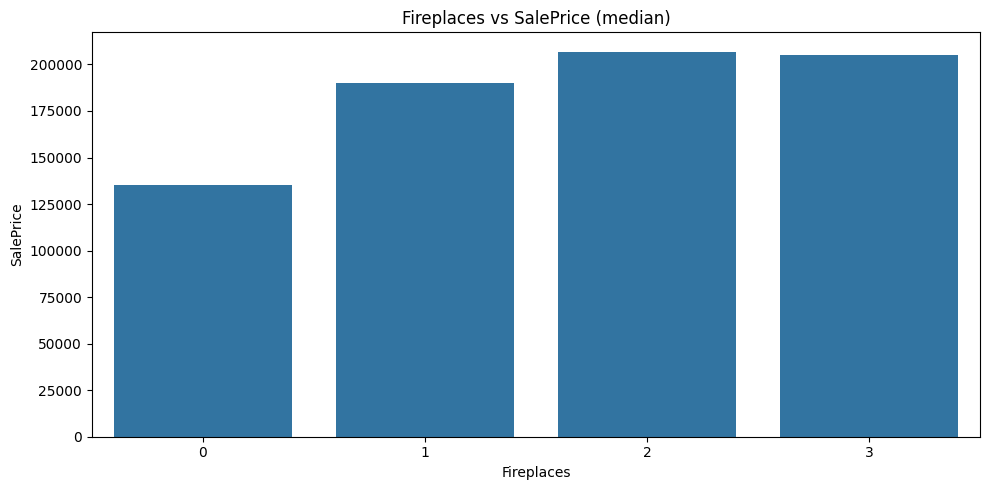

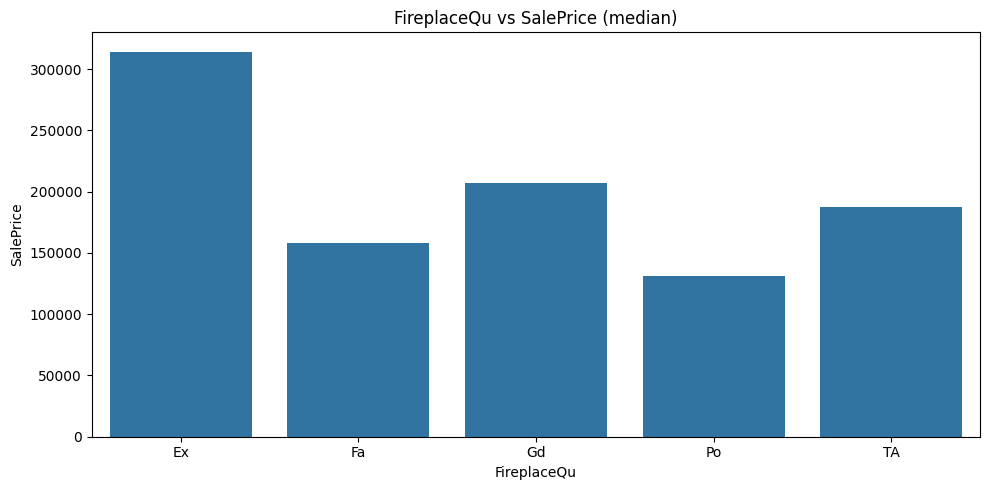

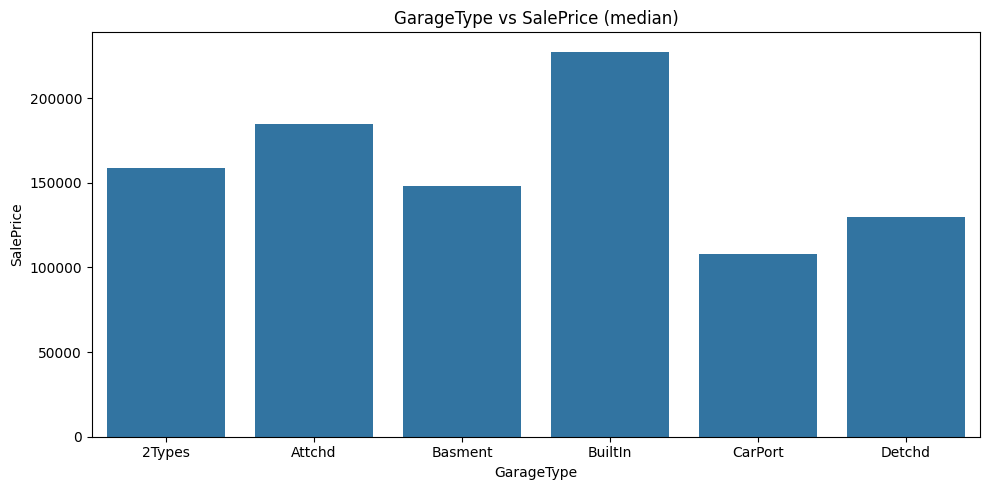

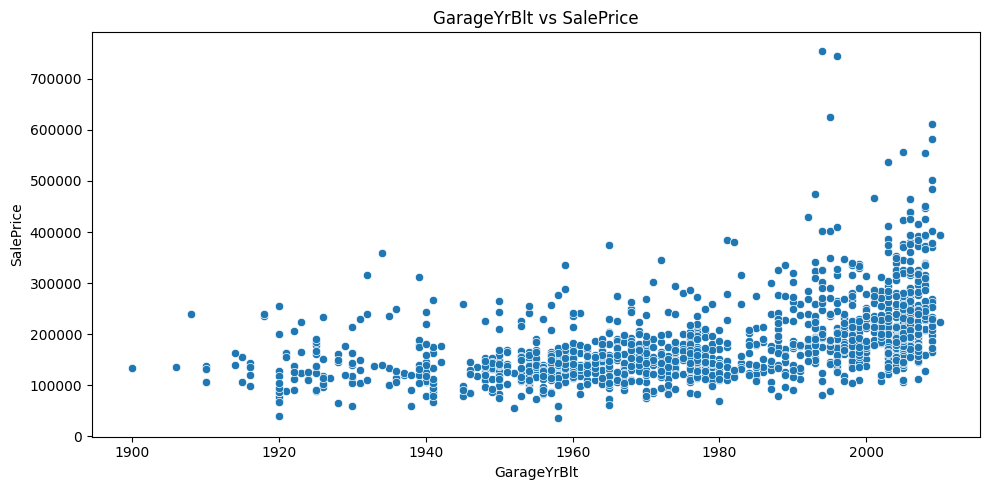

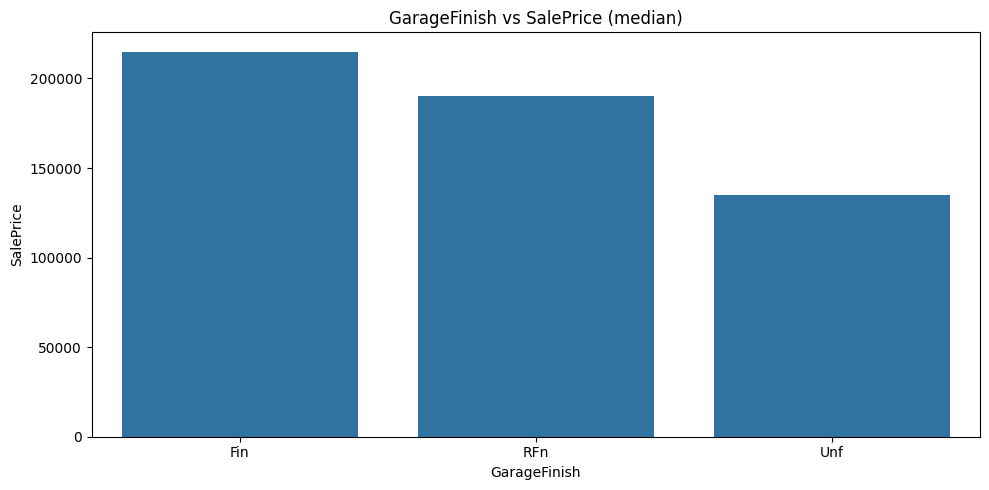

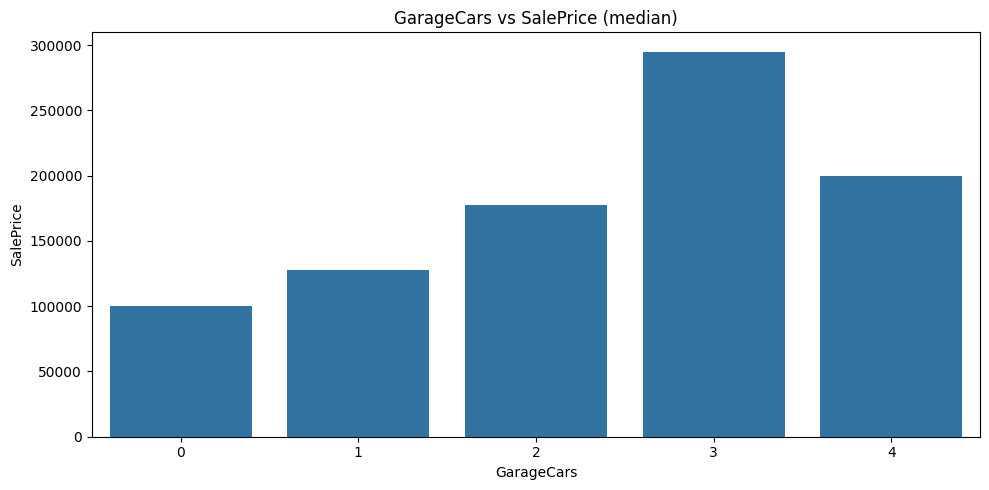

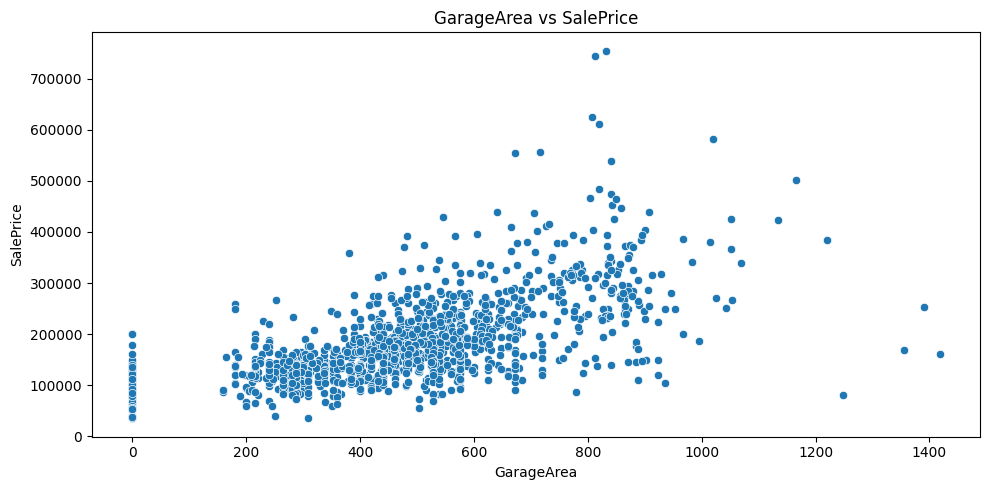

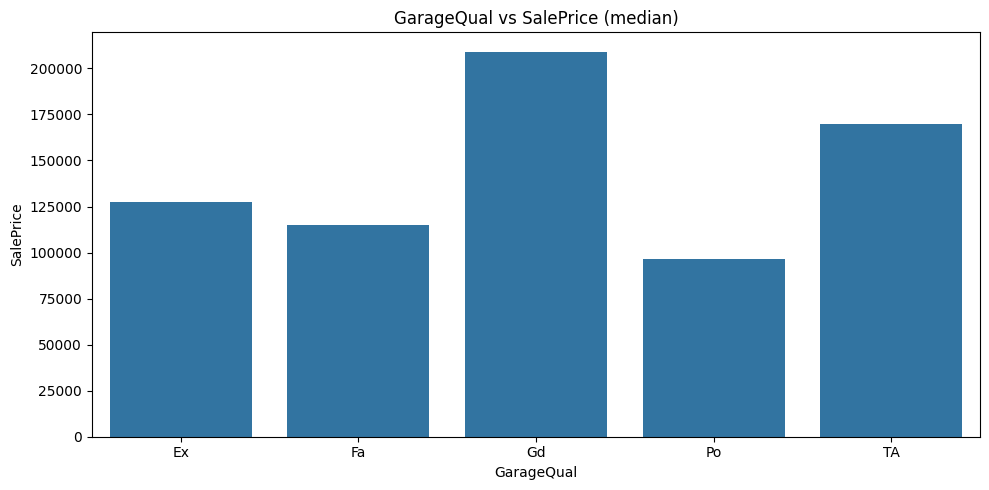

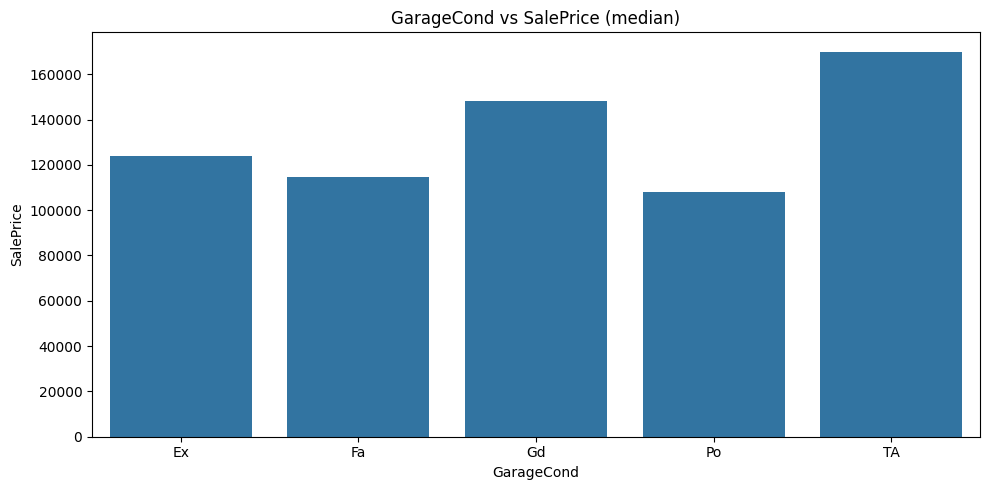

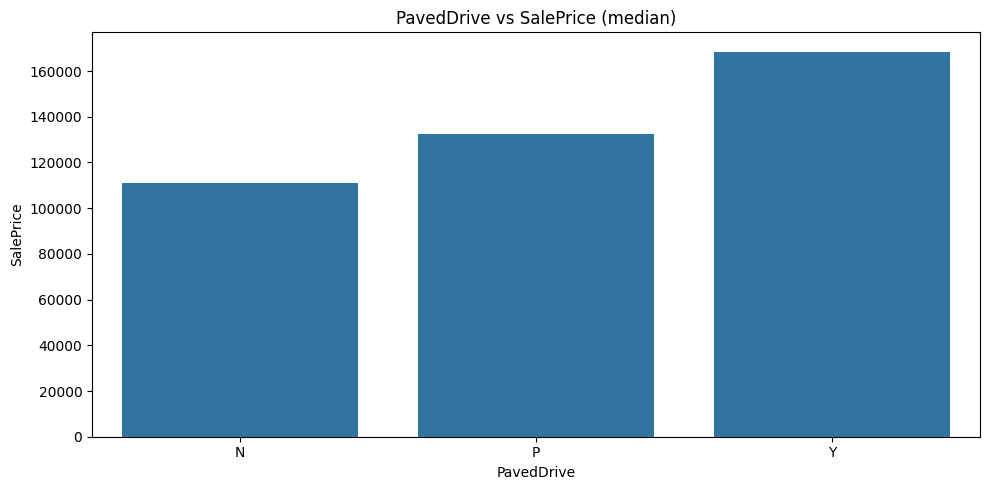

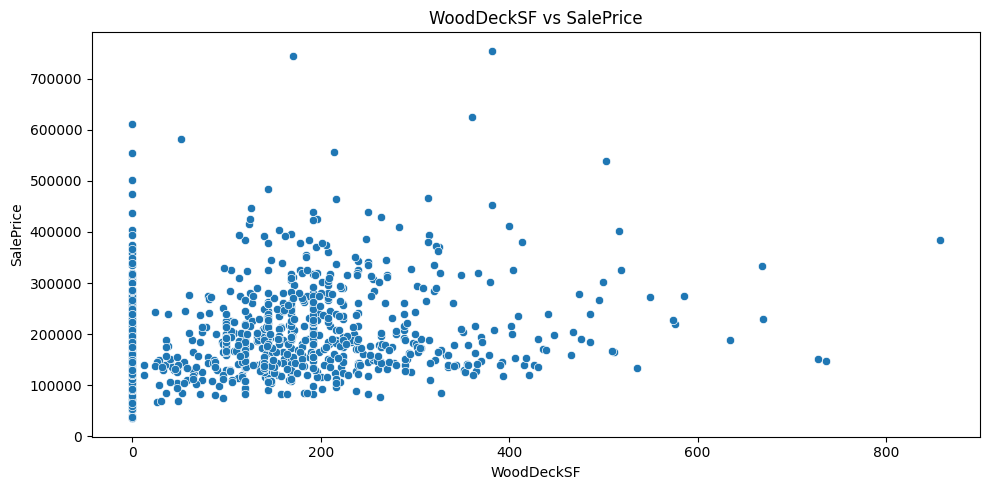

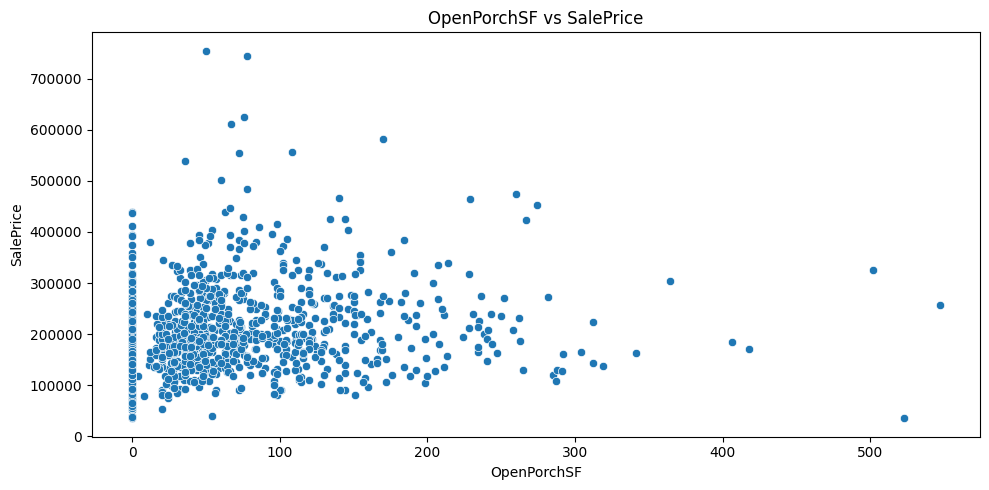

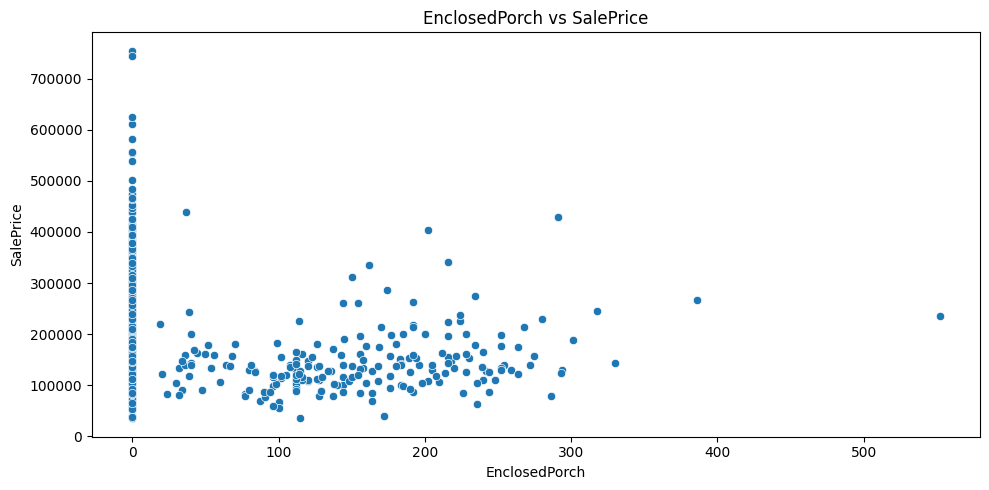

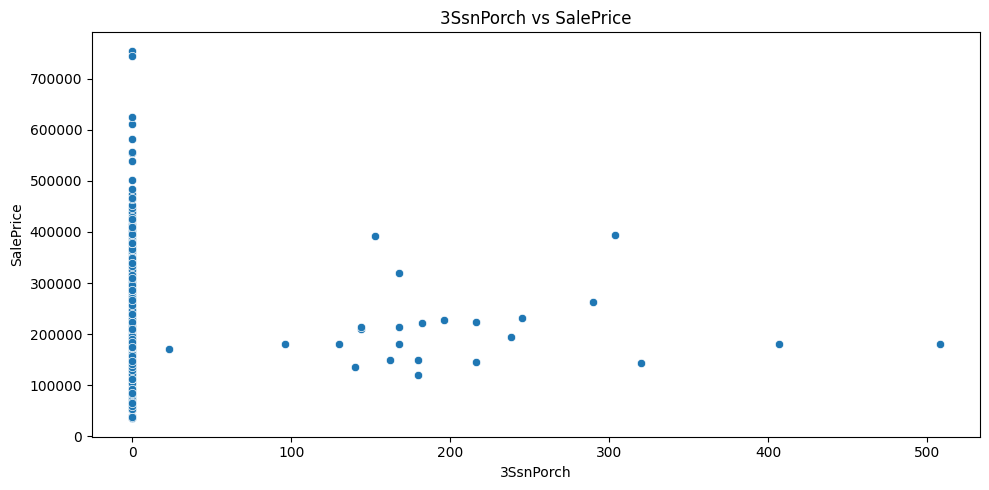

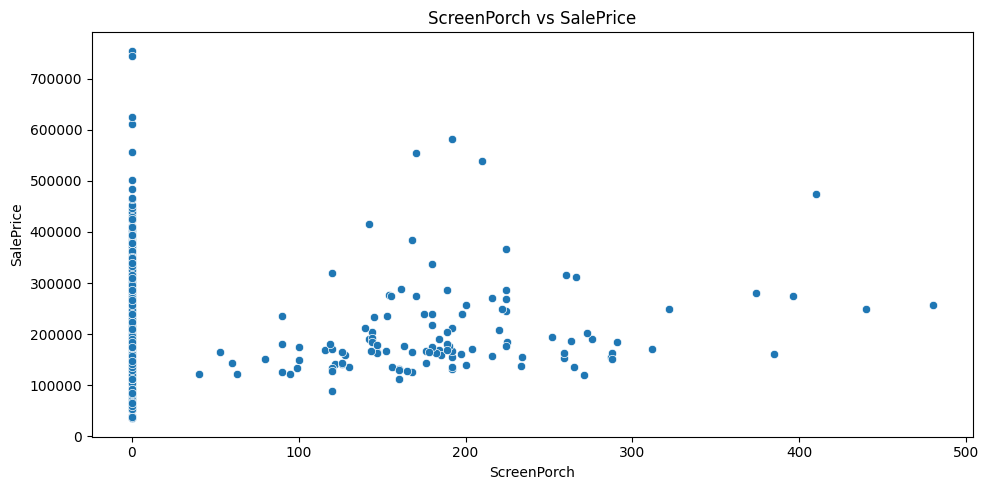

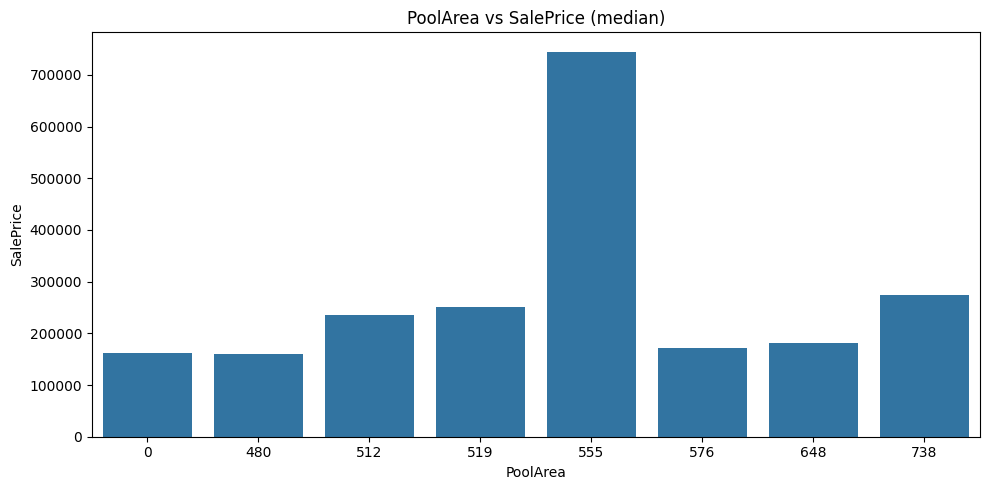

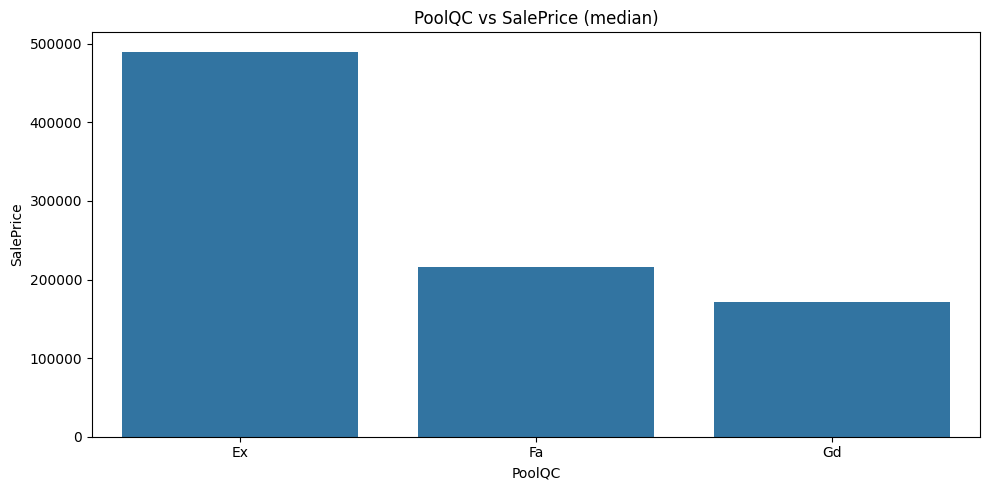

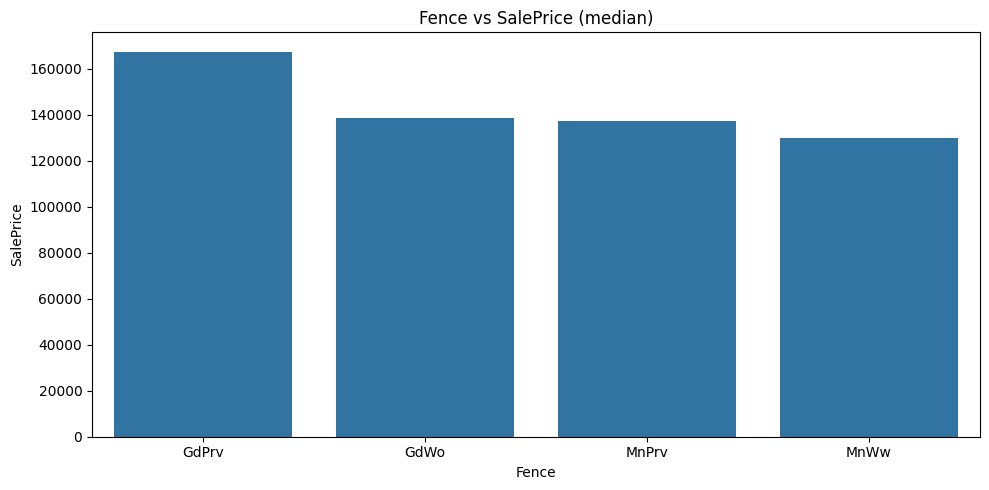

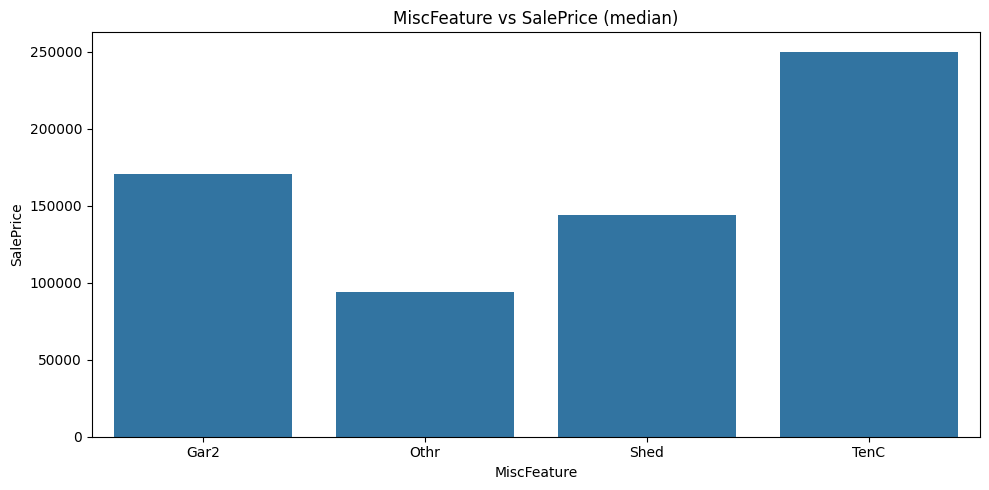

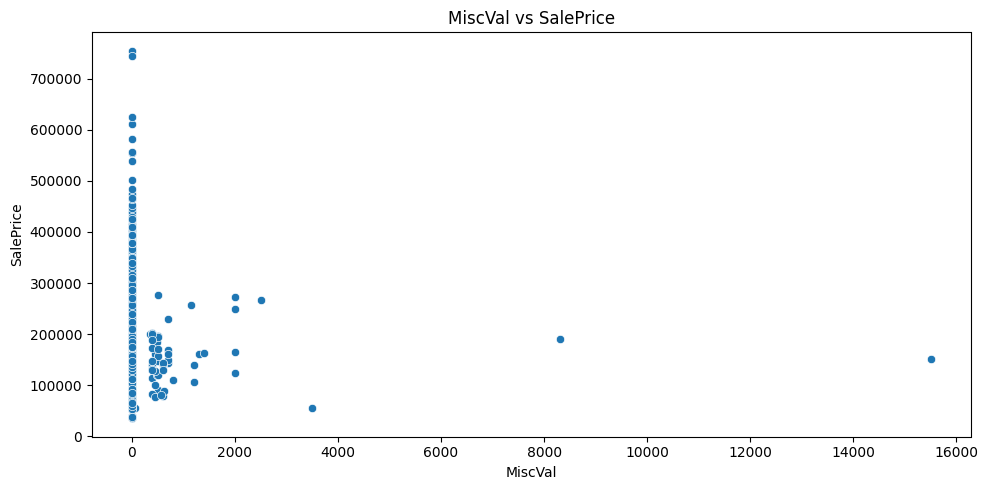

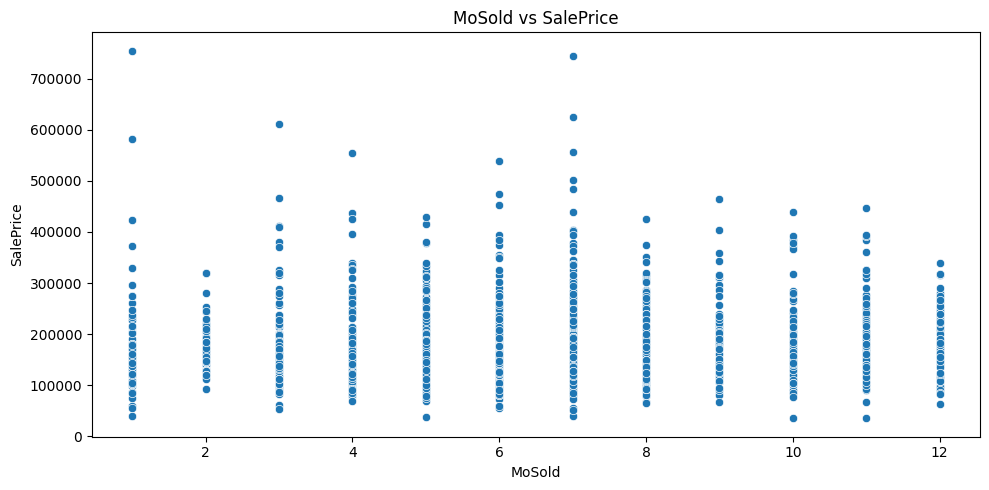

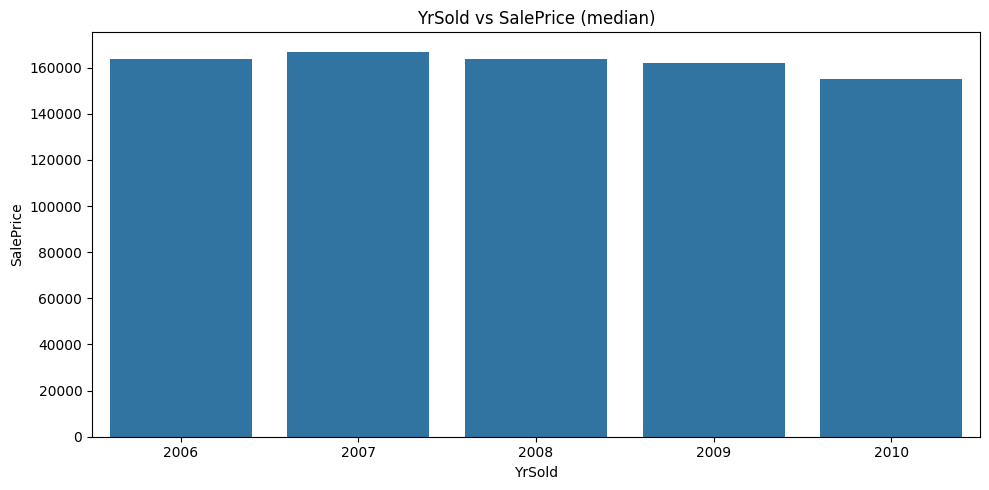

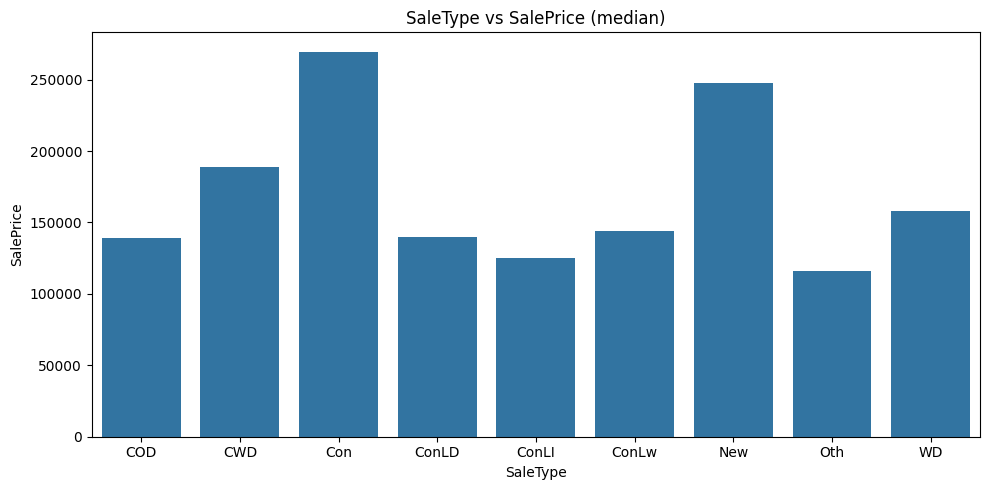

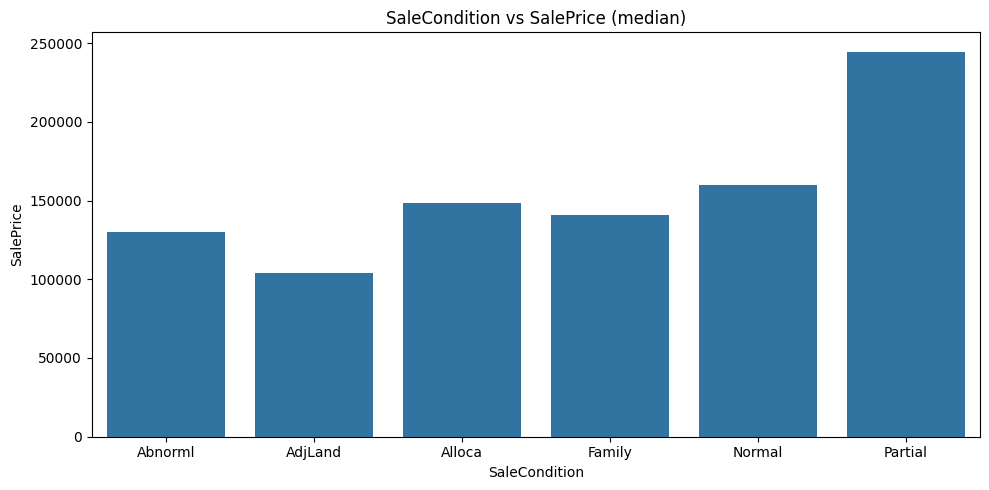

In [176]:
bivariate_analysis(df_copy, 'SalePrice')

In [177]:
# Multivariate analysis can be done to understand the relationship between multiple features and the target variable (Survived).
def multivariate_analysis(df_copy, numerical_columns):
    plt.figure(figsize=(15, 10))
    sns.heatmap(df_copy[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()  

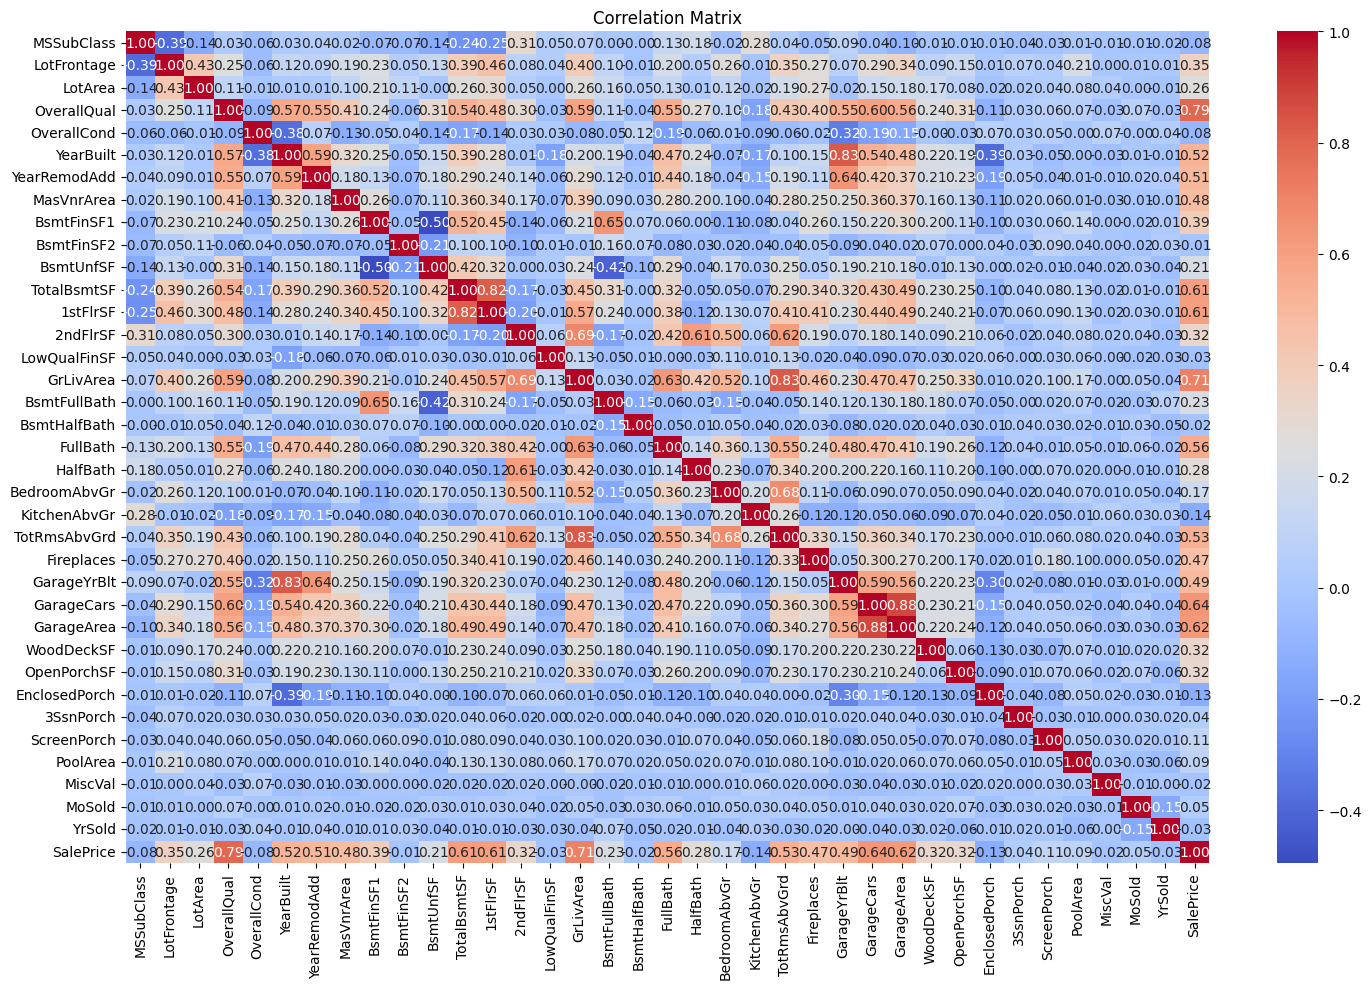

In [178]:
if numerical_columns:
    multivariate_analysis(df_copy, numerical_columns)
else:
    print("No numerical columns available for multivariate analysis.")

In [179]:
df_copy.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [181]:
# Save the cleaned data to a new CSV file
## Define the path where you want to save
save_path = os.path.join('data','processed_data', 'saleprice_cleaned_dataset.csv')
# Ensure the folder exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)
# Save the cleaned DataFrame to the specified path
df_copy.to_csv(save_path, index=False)

## Feature Engineering

#### Fill the missing values

In [182]:
df_copy.shape

(1460, 80)

In [183]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [184]:
missing_columns = df_copy.columns[df_copy.isnull().any()].tolist()

In [185]:
# find the percentage of missing values in each column
for col in missing_columns:
    missing_percentage = df_copy[col].isnull().mean() * 100
    print(f"{col}: {missing_percentage:.2f}%")

LotFrontage: 17.74%
Alley: 93.77%
MasVnrType: 59.73%
MasVnrArea: 0.55%
BsmtQual: 2.53%
BsmtCond: 2.53%
BsmtExposure: 2.60%
BsmtFinType1: 2.53%
BsmtFinType2: 2.60%
Electrical: 0.07%
FireplaceQu: 47.26%
GarageType: 5.55%
GarageYrBlt: 5.55%
GarageFinish: 5.55%
GarageQual: 5.55%
GarageCond: 5.55%
PoolQC: 99.52%
Fence: 80.75%
MiscFeature: 96.30%


In [186]:
df_copy.head()  # Display the first few rows of the original DataFrame

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [187]:
df_copy.isnull().sum()[df_copy.isnull().sum() > 0]  # Check if there are any missing values left

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Skewed and Outlier columns Comparision
1. Columns with outliers (31 columns) - 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
 '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
 2. Skewed columns (19 columns)- 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 
 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 
 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
 3. We need to handle the outliers from the outlier columns

In [188]:
# Give me the columns that has negative values 
negative_columns = [
    col for col in df_copy.columns 
    if np.issubdtype(df_copy[col].dtype, np.number) and (df_copy[col] < 0).any()
]
print("Columns with negative values:", negative_columns)


Columns with negative values: []


In [189]:
# Give me the columns that has zero values
zero_columns = [
    col for col in df_copy.columns 
    if np.issubdtype(df_copy[col].dtype, np.number) and (df_copy[col] == 0).any()
]
print("Columns with zero values:", zero_columns)

Columns with zero values: ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [190]:
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [191]:
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique values count: {df_copy[col].nunique()}")
    print(f"Unique values: {df_copy[col].unique()}")
    print("-" * 40)

Column: MSZoning
Unique values count: 5
Unique values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
----------------------------------------
Column: Street
Unique values count: 2
Unique values: ['Pave' 'Grvl']
----------------------------------------
Column: Alley
Unique values count: 2
Unique values: [nan 'Grvl' 'Pave']
----------------------------------------
Column: LotShape
Unique values count: 4
Unique values: ['Reg' 'IR1' 'IR2' 'IR3']
----------------------------------------
Column: LandContour
Unique values count: 4
Unique values: ['Lvl' 'Bnk' 'Low' 'HLS']
----------------------------------------
Column: Utilities
Unique values count: 2
Unique values: ['AllPub' 'NoSeWa']
----------------------------------------
Column: LotConfig
Unique values count: 5
Unique values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
----------------------------------------
Column: LandSlope
Unique values count: 3
Unique values: ['Gtl' 'Mod' 'Sev']
----------------------------------------
Column: Neighborhood
Unique v

In [192]:
df_copy.shape

(1460, 80)

In [193]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [194]:
df_copy.head()  # Display the first few rows of the encoded DataFrame

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [195]:
df_copy.shape

(1460, 80)

#### Creation of dependent and independent features

In [196]:
# Lets create a independent variable and dependent variable
X = df_copy.drop(columns=['SalePrice'])
y = df_copy['SalePrice']

In [197]:
# Perform train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1168, 79)
X_test shape: (292, 79)
y_train shape: (1168,)
y_test shape: (292,)


In [198]:
# Target variable transformation
# Apply the log transformation to the target variable 'SalePrice'   
y_train_log = np.log1p(y_train)  # log1p handles log(0) safely
y_test_log = np.log1p(y_test)

#### Fill the missing values. CustomImputer

In [199]:
fill_none_cols=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
                        'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
                        'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
zero_fill_cols=['MasVnrArea', 'GarageYrBlt']

In [200]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, fill_none_cols=None, zero_fill_cols=None):
        self.fill_none_cols = fill_none_cols if fill_none_cols else []
        self.zero_fill_cols = zero_fill_cols if zero_fill_cols else []
        self.fill_values_ = {}   # stores learned values

    def fit(self, X, y=None):
        X_ = X.copy()

        # Learn rules for all other columns
        for col in X_.columns:
            if col in self.fill_none_cols or col in self.zero_fill_cols:  # The purpose of fit is to learn from the training data (compute medians, modes, etc.).But for fill_none_cols and zero_fill_cols, we don’t need to “learn” anything. We just need to transform them so we handled it in transform method.
                continue

            if X_[col].dtype == "object":
                if X_[col].isnull().sum() > 0:
                    self.fill_values_[col] = X_[col].mode()[0]
            else:
                if X_[col].isnull().sum() > 0:
                    skewness = X_[col].skew()
                    if skewness > 1 or skewness < -1:
                        self.fill_values_[col] = X_[col].median()
                    else:
                        self.fill_values_[col] = X_[col].mean()
        return self

    def transform(self, X):
        X_ = X.copy()

        # Apply fixed rules
        for col in self.fill_none_cols:
            if col in X_.columns:
                X_[col] = X_[col].fillna("None")

        for col in self.zero_fill_cols:
            if col in X_.columns:
                X_[col] = X_[col].fillna(0)

        # Apply learned rules
        for col, fill_value in self.fill_values_.items():
            if col in X_.columns:
                X_[col] = X_[col].fillna(fill_value)

        # Handle unseen missing columns (only in test)
        for col in X_.columns:
            if X_[col].isnull().sum() > 0 and col not in self.fill_values_:
                if X_[col].dtype == "object":
                    fill_value = X_[col].mode()[0]
                else:
                    skewness = X_[col].skew()
                    if skewness > 1 or skewness < -1:
                        fill_value = X_[col].median()
                    else:
                        fill_value = X_[col].mean()
                X_[col] = X_[col].fillna(fill_value)

        return X_

#### Outlier Handling

In [201]:
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [202]:
'''# Detect the columns with outliers
def detect_outliers(X_train, numerical_columns):
    outlier_columns = []
    # Exclude 'SalePrice' if it's in the list
    features_to_check = [col for col in numerical_columns if col != 'SalePrice']
    for col in features_to_check:
        q1 =X_train[col].quantile(0.25)
        q3 = X_train[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        if (X_train[col] < lower_bound).any() or (X_train[col] > upper_bound).any():
            outlier_columns.append(col)
    return outlier_columns
outlier_columns = detect_outliers(X_train, numerical_columns)
print("Columns with outliers:", outlier_columns)'''

'# Detect the columns with outliers\ndef detect_outliers(X_train, numerical_columns):\n    outlier_columns = []\n    # Exclude \'SalePrice\' if it\'s in the list\n    features_to_check = [col for col in numerical_columns if col != \'SalePrice\']\n    for col in features_to_check:\n        q1 =X_train[col].quantile(0.25)\n        q3 = X_train[col].quantile(0.75)\n        iqr = q3 - q1\n        lower_bound = q1 - 1.5 * iqr\n        upper_bound = q3 + 1.5 * iqr\n        if (X_train[col] < lower_bound).any() or (X_train[col] > upper_bound).any():\n            outlier_columns.append(col)\n    return outlier_columns\noutlier_columns = detect_outliers(X_train, numerical_columns)\nprint("Columns with outliers:", outlier_columns)'

##### Working of my outliers function:
1. Discrete features → only capping (no transformation).
2. Continuous features →
If skewness is high → apply transformation (log/Yeo-Johnson).
else → apply capping.
3. Avoids doing both at the same time.
4. Handles NaNs safely.

In [203]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
from scipy.stats import yeojohnson
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, discrete_threshold=10, skew_threshold=0.75):
       # self.outlier_columns = outlier_columns
        self.discrete_threshold = discrete_threshold
        self.skew_threshold = skew_threshold
        self.params_ = {}
        self.outlier_columns = []
    # we need to give y=None as the scikit-learn’s Pipeline, GridSearchCV, cross_val_score, and other utilities always pass both X and y to .fit(), even for unsupervised transformers (like imputers, scalers, outlier handlers, etc.) even if they are not used.
    # This is to ensure compatibility with scikit-learn's API.
    def fit(self, X, y=None):
        X_ = X.copy()
        numeric_columns= X_.select_dtypes(include=[np.number]).columns
        for col in numeric_columns:
            if X_[col].dropna().empty:
                continue
            unique_values = X_[col].nunique()
            col_type = 'discrete' if unique_values <= self.discrete_threshold else 'continuous' 
            Q1 = X_[col].quantile(0.25)
            Q3 = X_[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            extreme_outliers = ((X_[col] < lower_bound) | (X_[col] > upper_bound)).sum()
            if extreme_outliers > 0:
                self.outlier_columns.append(col)
                if col_type == 'discrete':
                    self.params_[col] = ('cap', lower_bound, upper_bound)
                else:
                    skewness = X_[col].skew()
                    if abs(skewness) > self.skew_threshold:
                        if (X_[col] >= 0).all():
                            self.params_[col] = ('log',)
                        else:
                            self.params_[col] = ('yeojohnson',)
                    else:
                        self.params_[col] = ('cap', lower_bound, upper_bound)
        return self  # fit method returns the self which is a common practice in scikit-learn to allow for method chaining
    
    def transform(self, X):
        X_ = X.copy()
        for col, params in self.params_.items():
            if params[0] == 'cap':
                _, lower, upper = params
                #X_[col] < lower compares each value in the column to the lower bound. It returns a boolean Series where each entry is True if the corresponding value is less than the lower bound and False otherwise.
                X_[col] = np.where(X_[col] < lower, lower,
                                   np.where(X_[col] > upper, upper, X_[col]))
            elif params[0] == 'log':
                X_[col] = np.log1p(X_[col])
            elif params[0] == 'yeojohnson':
                X_[col], _ = yeojohnson(X_[col])
        return X_ # transform method returns the transformed DataFrame, allowing for further processing or model fitting

#### ColumnTransformer for Encoding and Scaling

In [204]:
ordinal_features = {
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
    'LandSlope': ['Sev', 'Mod', 'Gtl'],
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y'],
    'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    'Street': ['Grvl', 'Pave'],
    'Alley': ['None', 'Grvl', 'Pave'],
    'Utilities': ['NoSeWa', 'AllPub']
}

In [205]:
nominal_features = []
high_cardinality_features = []
for col in categorical_columns:
        n_unique = X_train[col].nunique()
        if col not in ordinal_features:
            if n_unique < 30:  # Assuming high_cardinality_threshold is 30
                nominal_features.append(col)
            else:
                high_cardinality_features.append(col)

In [206]:
nominal_features

['MSZoning',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [207]:
high_cardinality_features

[]

In [208]:
continuous_numeric_features = [
    col for col in numerical_columns 
    if col != 'SalePrice' and X_train[col].nunique() > 10
]

In [209]:
continuous_numeric_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold']

In [210]:
for col in continuous_numeric_features:
    print(f"Column: {col}")
    print(f"Unique values count: {X_train[col].nunique()}")
    print(f"Unique values: {X_train[col].unique()}")
    print("-" * 40)

Column: MSSubClass
Unique values count: 15
Unique values: [ 20  60  30  50  85  80  45  90 160  40 190  75 120  70 180]
----------------------------------------
Column: LotFrontage
Unique values count: 107
Unique values: [ 70.  59.  67.  60.  50. 122.  40.  78.  76.  85.  82.  80.  nan  49.
  75.  47.  55.  91.  52.  65.  35. 100.  79. 128.  71.  64.  34.  53.
  33.  95.  58.  72. 105.  44.  69.  54.  43.  74.  21.  90. 102.  77.
  51. 107. 120.  96.  89.  30. 103.  62. 104.  84.  68. 160.  92.  81.
  88. 115.  46.  36.  73.  39.  56.  48.  63.  87. 106.  86. 141.  24.
 108.  99.  57. 114.  42.  83. 121.  98. 144. 110.  61. 130.  93. 137.
 118.  66. 313. 168.  45. 109. 124. 149. 134.  32. 129.  97.  37. 112.
  41.  94. 152. 150. 111. 182. 174.  38. 101. 153.]
----------------------------------------
Column: LotArea
Unique values count: 890
Unique values: [  8400   7837   8777   7200   5000   9800  11911   5436  12090   9158
  13400  11880  13600   9600   8068  21000   8235   7950  1241

In [211]:
ordinal_features = {
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
    'LandSlope': ['Sev', 'Mod', 'Gtl'],
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y'],
    'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    'Street': ['Grvl', 'Pave'],
    'Alley': ['None', 'Grvl', 'Pave'],
    'Utilities': ['NoSeWa', 'AllPub']
}

#### Column Transformer - from sklearn.compose import ColumnTransformer
1. When we need to apply different types of encoding techniques and imputation techniques on columns if we do it independently like applying each technique on different columns and then concatenating them with the dataset takes time and inefficient so we use column transformer for it.
2. We create an object of the ColumnTransfer and inside it we pass the list of transformers and remainder, if remainder=drop (default value), it drops the columns that are not listed in the transformerd and donot include them in the transformed output and if the remainder=passthrough, simply we skip these columns and not include them in the transformation and but include them in the final transformed output and in the list of transformers we pass the techniques we want to use as a tuples and inside the tuple we mention the transformer name, technique (ohe, ordinal encoding, simpleimputer), list of columns on which the transformation should happen.
2. Syntax of column encoder -
transformer= ColumnTransformer(transformers=[
    (transformername, technique, list of columns),
    (transformername, technique, list of columns),
    (transformername, technique, list of columns)
],
remainder='' )

In [212]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder

def build_preprocessor(ordinal_features, nominal_features, high_card_features, continuous_numeric_features):
    preprocessor = ColumnTransformer(
        # We define 3-element tuples for each transformer: (name, transformer, columns)
        # [ordinal_features[col] for col in ordinal_features]--> Iterates over each column in ordinal_features (a dictionary).Gets the predefined order of categories for each column.
        # list(ordinal_features.keys() - > Gets the list of column names from the ordinal_features dictionary and applies OrdinalEncoder to these columns.
        #drop='first'- Drops the first category of each column to avoid multicollinearity. It is used to avoid the dummy variable trap, which can lead to multicollinearity in regression models. By dropping the first category, we ensure that the encoded variables are linearly independent.
        #sparse_output=False - By default, OneHotEncoder returns a sparse matrix. Setting sparse_output=False ensures that the output is a dense array, which is often easier to work with in subsequent steps of a machine learning pipeline.
        # handle_unknown='ignore' - This parameter ensures that if the test data contains categories that were not seen during training, they will be ignored rather than causing an error.
            transformers=[
            ('ord', OrdinalEncoder(categories=[ordinal_features[col] for col in ordinal_features]),
             list(ordinal_features.keys())),
            ('nom', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
             nominal_features),
            ('high', TargetEncoder(cols=high_card_features), high_card_features),
            ('num', StandardScaler(), continuous_numeric_features)
        ],
        remainder='drop'
    )
    return preprocessor

#### Full Pipeline

In [213]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV

def build_pipeline(ordinal_features, nominal_features, high_card_features, numeric_features,fill_none_cols,
        zero_fill_cols, model):
    preprocessor = build_preprocessor(ordinal_features, nominal_features, high_card_features, numeric_features)
    custmomimputer= CustomImputer(
        fill_none_cols,
        zero_fill_cols
    )
    pipe = Pipeline([
        ('custom_imputer', custmomimputer),
        ('outliers', OutlierHandler()),
        ('encode_scale', preprocessor),
        ('model', model)
    ])
    return pipe

#### Why we need to use the pipeline and how it can prevent the data leakage?



###### What Does Cross-Validation (CV) Do?
1. Cross-validation is a model validation technique used to assess how well your model generalizes to unseen data.

✅ Cross-Validation Steps (e.g., cv=5)
1. Split X_train and y_train into 5 folds:
The data is divided into 5 approximately equal-sized splits or folds.
Each fold contains both X values (features) and y values (targets).

2. Training and Validation on Folds:
For each of the 5 iterations:
4 folds are used as the training set
1 fold is used as the validation set (to test the model)
The model is trained and evaluated
This rotates so every fold is used as validation once.

3. Compute average performance:
It evaluates the model (e.g., using scoring='neg_mean_squared_error')
Then averages the results across the 5 validation sets

4. Best Parameters:
If using GridSearchCV, it finds the hyperparameters that give the best average performance

5. ✅ Only X_train and y_train are used. X_test and y_test are untouched.

Each CV fold has its own instance of the model and scaler.
The model is trained on a subset only — not on the full data.

Questions:
We're doing cross-validation (cross_val_score) on X_train, y_train_log, and then we also do final_pipe.fit(X_train, y_train_log) afterward. Since both are using the same data, where exactly is the retraining happening on the full dataset?
Answer:
Yes, you are retraining the best model on the full training set — that’s exactly what this line is doing:
final_pipe.fit(X_train, y_train_log)

Cross-validation evaluates candidate models, but does not retain a model trained on the full dataset. So, after you identify the best model via CV, you need to retrain it on the full dataset. 

| Stage               | Purpose                      | Data Used                                | Model Trained                             |
| ------------------- | ---------------------------- | ---------------------------------------- | ----------------------------------------- |
| `cross_val_score()` | Model selection / Evaluation | `X_train`, `y_train_log` (5-fold splits) | Multiple models, partially trained        |
| `final_pipe.fit()`  | Final training               | **Full `X_train`, `y_train_log`**        | ✅ **One final model** trained on all data |
| `.predict(df_test)` | Prediction                   | Kaggle test set                          | Final trained model                       |


| Phase                  | Training?                   | Purpose                         | Data Used                           | Is Model Saved? |
| ---------------------- | --------------------------- | ------------------------------- | ----------------------------------- | --------------- |
| `cross_val_score(...)` | ✅ Yes (temporary, internal) | Model evaluation                | Subsets of training data            | ❌ No            |
| `final_pipe.fit(...)`  | ✅ Yes (final, full)         | Final model for production/test | **All** of `X_train`, `y_train_log` | ✅ Yes           |




### RMSE, MSE, and MAE?
These are regression error metrics — they measure how far off your model’s predictions are from the true values (targets).

🧠 1. MAE — Mean Absolute Error
🔍 What it measures:
The average absolute difference between predicted and actual values.
It tells you:
"On average, how wrong are my predictions?"

📊 Interpretation:
If MAE = 3,000 → On average, your predictions are off by $3,000.
All errors are treated equally, whether small or large.

📌 What it tells you:
A simple and interpretable metric.
Good if you care about typical prediction error, and want to avoid being overly influenced by large outliers.


🧠 2. MSE — Mean Squared Error
🔍 What it measures:
The average of the squared differences between predicted and actual values.
It emphasizes large errors more heavily because of the squaring.

📊 Interpretation:
MSE = 2,000,000 (if your target is in dollars) → hard to interpret directly.
Because it's in squared units, it’s not intuitive.

📌 What it tells you:
Useful when you want to heavily penalize large errors.
Mathematically convenient (used in optimization).
Less interpretable directly — more useful as a tool for comparison than standalone evaluation.


🧠 3. RMSE — Root Mean Squared Error
🔍 What it measures:
The square root of MSE, so it's in the same unit as the target.
Like MSE, it penalizes large errors, but it’s more interpretable.

📊 Interpretation:
RMSE = 3,500 → On average, the model's predictions are ~$3,500 away from the true value, with more emphasis on large errors.

📌 What it tells you:
Best when large errors are especially costly (e.g. house price prediction, loan approvals).
Widely used in competitions (e.g. Kaggle).
Gives a balanced view — more sensitive than MAE, but interpretable.

🧠 These metrics help answer:
"How well is my model predicting?"


| Metric   | Low Value Means...                     | High Value Means...         | When It’s Best                                      |
| -------- | -------------------------------------- | --------------------------- | --------------------------------------------------- |
| **MAE**  | On average, your predictions are close | You're consistently off     | When all errors matter equally                      |
| **MSE**  | Errors are small and consistent        | You have large outliers     | When large errors are **very bad**                  |
| **RMSE** | Good accuracy and low big errors       | Inconsistent or high errors | When you want interpretable + penalize big mistakes |

✅ Final Conclusions You Can Draw
1. If MAE is low, your model’s predictions are reliably close to the actual values.
2. If RMSE is much higher than MAE, it means some predictions are way off (outliers).
3. If both are close, your model has balanced performance — no huge errors.
4. If RMSE and MAE are both high, your model needs improvement.


| Scenario                | Why RMSE Is Good                                                                            |
| ----------------------- | ------------------------------------------------------------------------------------------- |
| **House pricing**       | Mispricing a house by \$200K is way worse than \$20K — RMSE punishes big mistakes.          |
| **Loans & risk**        | Misjudging risk badly can cause big financial loss — RMSE teaches the model to avoid those. |
| **Medical predictions** | Wrong diagnosis with large margin can be fatal — big errors are very costly.                |


| Use Case                            | Preferred Metric | Why                                          |
| ----------------------------------- | ---------------- | -------------------------------------------- |
| House prices, medical risk, finance | RMSE             | Large mistakes are very costly               |
| Sales, delivery estimates, weather  | MAE              | All mistakes are equally bad                 |
| Noisy data with outliers            | MAE              | MAE is more robust (outliers don’t dominate) |
| Fairness-sensitive applications     | MAE              | Equal error treatment across all groups      |


#### Why did we pick RMSE (Root Mean Squared Error) as the evaluation metric in the model selection and cross-validation process?

🎯 The Goal of Your ML Task
You're predicting house prices, a continuous numerical value. This is a classic regression problem.

When evaluating a regression model, we have several options:
| Metric                             | Description                      |
| ---------------------------------- | -------------------------------- |
| **MAE** (Mean Absolute Error)      | Average of absolute errors       |
| **MSE** (Mean Squared Error)       | Average of squared errors        |
| **RMSE** (Root Mean Squared Error) | Square root of MSE               |
| **R² Score**                       | Proportion of variance explained |

✅ Why RMSE?
1. RMSE punishes large errors more than MAE
Since RMSE squares the errors, it penalizes large prediction errors more harshly.

In house pricing, being off by $100,000 is worse than being off by $10,000 — and RMSE reflects that.

2. RMSE has the same units as the target
RMSE is interpretable:
If y is in log-sale prices, RMSE is in log units.
After np.expm1, it's back to dollar scale.

That means you can say:
"My model has an average prediction error of about $15,000."

🚨 Why not MSE or MAE?
1. MAE is more robust to outliers, but less sensitive to large errors, which you may want to capture in house prices.
2. MSE is fine, but its unit is squared dollars, which is not interpretable.
3. R² Score is good for model comparison, but not as intuitive or directly reflective of dollar error.

📈 Example: RMSE in Context
Imagine:

| House | True Price | Predicted | Error | Squared Error |
| ----- | ---------- | --------- | ----- | ------------- |
| A     | 200,000    | 180,000   | -20K  | 400M          |
| B     | 350,000    | 340,000   | -10K  | 100M          |
| C     | 500,000    | 490,000   | -10K  | 100M          |

MAE = average of abs(errors) = (20k + 10k + 10k) / 3 = 13.33k
MSE = average squared = (400M + 100M + 100M)/3 = 200M
RMSE = sqrt(200M) ≈ $14,142

RMSE gives a slightly higher penalty because of the large 20K miss — that's what makes it powerful for spotting models that get it really wrong.

| Reason to use RMSE           | Why it matters                                  |
| ---------------------------- | ----------------------------------------------- |
| Reflects real-world impact   | Overpaying/underpricing a house by a lot is bad |
| Matches leaderboard metric   | RMSE = what Kaggle uses                         |
| Punishes large errors        | Good for regression tasks with high stakes      |
| Easy to interpret            | RMSE is in the same unit as price               |
| Supported in sklearn scoring | Easy to integrate in pipelines and CV           |

💡 Given the values of MAE, MSE, and RMSE, how do we decide which metric to use when evaluating a regression model?
📊 Given Example Values:
| Metric | Value       |
| ------ | ----------- |
| MAE    | \$13,333    |
| MSE    | 200,000,000 |
| RMSE   | \$14,142    |

This comes from prediction errors of:
-$20,000
-$10,000
-$10,000


🔍 Step-by-step Explanation of Each Metric
1. ✅ MAE — Mean Absolute Error
Formula: MAE = mean(|y_true - y_pred|)
Your value: $13,333
It’s the average size of the error, without considering whether it’s over- or under-prediction.
Intuitive: "On average, we’re off by $13,333."

Pros:
Easy to understand
Less sensitive to outliers

Cons:
Doesn’t penalize large errors as harshly as RMSE

2. 🔍 MSE — Mean Squared Error
Formula: MSE = mean((y_true - y_pred)²)
Your value: 200,000,000
Squared unit: if target is in dollars, MSE is in dollars squared, which is not interpretable.

Pros:
Strongly penalizes large errors
Mathematically convenient (derivatives, etc.)

Cons:
Not intuitive
Not in same unit as the target (e.g., price)


3. ✅ RMSE — Root Mean Squared Error
Formula: RMSE = sqrt(MSE)
Your value: $14,142
Same unit as the target (like MAE), but larger errors are penalized more due to squaring.

Pros:
Same unit as target (like price)
Penalizes large errors more than MAE
Matches typical competition metrics (e.g., Kaggle)

Cons:
Less robust to outliers

📈 Why Is RMSE > MAE?
Because RMSE gives more weight to large errors:
Your errors: [-20k, -10k, -10k]

MAE treats all errors equally → average of 13.3k
RMSE "worries more" about that -20k, so the average becomes ~14.1k
If you had a larger outlier, say an error of -100k, RMSE would go way up:
Example: np.sqrt((100000**2 + 10000**2 + 10000**2)/3) = sqrt(3.4e9) ≈ 58,309

MAE would be:
(100000 + 10000 + 10000)/3 = 40,000

Notice how RMSE exploded, while MAE went up modestly. That’s the key difference.

| Situation                                          | Use MAE?     | Use RMSE?       |
| -------------------------------------------------- | ------------ | --------------- |
| You want **robustness** to outliers                | ✅ Yes        | ❌ No            |
| You want to **penalize large errors more**         | ❌ No         | ✅ Yes           |
| Business cares **equally about all errors**        | ✅ Yes        | ❌ No            |
| Errors grow **exponentially in cost**              | ❌ No         | ✅ Yes           |
| You want an **intuitive metric in dollars**        | ✅ Yes        | ✅ Yes           |
| You’re working with **Kaggle or similar platform** | ❌ Usually No | ✅ Yes (default) |


✅ So What Should YOU Do?
You’re working on: 🏠 House Price Prediction
1. Large errors in pricing a house are much worse than small ones.
2. A mistake of $100,000 is not 10× worse than $10,000 — it could be 100× more damaging (missed sale, legal issues, etc.).
3. Competitions (like Kaggle) typically use RMSE.

➤ ✅ Pick RMSE
It’s:
1. Interpretable (in dollars)
2. Sensitive to large errors
3. Standard for housing price regression tasks

| Metric | What It Means      | Pros                              | When to Use                                      |
| ------ | ------------------ | --------------------------------- | ------------------------------------------------ |
| MAE    | Avg. error         | Simple, robust                    | General usage, interpretability                  |
| MSE    | Avg. squared error | Penalizes large errors            | Rarely used directly                             |
| RMSE   | Root of MSE        | Penalizes large errors, same unit | **Preferred in price predictions**, competitions |


 Why RMSE Is Not Robust to Outliers
You're right that:

RMSE penalizes outliers more than MAE.
That’s 100% correct.

But here's the catch:
❌ Penalizing more ≠ Robustness
Penalizing large errors heavily doesn't mean the metric is robust — it actually means the metric is sensitive to outliers.

So if you introduce a single large error (an outlier), RMSE will jump a lot, while MAE increases more gradually.



#### Nested Cross Validation - how it works
Outer CV (cross_val_score) – Splits full dataset into 5 outer folds:

+---------------------------- Outer Fold 1 ---------------------------+
|     Train (80%)            |                Test (20%)             |
|   [used in GridSearchCV]   |        [scoring fold in outer CV]     |
+--------------------------------------------------------------------+

    Inside Outer Fold 1 → Inner CV (GridSearchCV cv=5):

    +------ Inner Fold 1 ------+
    | Train 64% | Valid 16%    |
    +--------------------------+
    +------ Inner Fold 2 ------+
    | Train 64% | Valid 16%    |
    +--------------------------+
        ...
    +------ Inner Fold 5 ------+
    | Train 64% | Valid 16%    |
    +--------------------------+

    ▶ Try each hyperparameter combo (e.g., different `alpha`)
    ▶ Pick best hyperparams based on inner validation scores
    ▶ Retrain model on full 80% (Outer Train) using best hyperparams
    ▶ Predict on Outer Test (20%) → store this score

Repeat for all 5 outer folds → get 5 unbiased scores.
Average them = estimated generalization performance.


### Do inner folds contain both input (X) and output (y) features?
✅ Yes, absolutely.
Each inner fold contains:
The input features (independent variables, X)
The target (dependent variable, y)
Because:
You’re training models on (X_train, y_train)
And evaluating them on (X_val, y_val)
So both X and y are needed in all inner and outer training/validation splits.

#### 🤖 What cross_val_score() does internally:
Under the hood, for each fold (say fold 1 of 5):

It splits X_train and y_train_log into:

Training fold (e.g. 80% of the data)

Validation fold (e.g. 20% of the data)

It then:

Calls pipe.fit(X_train_fold, y_train_fold)

Calls pipe.predict(X_val_fold) and computes score using rmse_scorer

So the pipeline receives:

Training data → in .fit()

Test/validation data → in .predict() / scorer

#### Question:
If we give a model at the end of a pipeline, and apply transformations before that, aren’t the transformations already fit before the model does its internal CV (e.g., in GridSearchCV or RidgeCV)?
So wouldn't inner CV (hyperparameter tuning) see data that's already been transformed — using the entire outer training data — causing data leakage?

#### Answer:
 No — StandardScaler is not fit before GridSearchCV begins its inner CV.
 
 when you call:
 pipeline.fit(X_train_outer, y_train_outer)

 🔍 What .fit() on the pipeline really does:
1. The pipeline sees that model is a GridSearchCV object.
2. So it doesn’t immediately fit StandardScaler on the full X_train_outer.
3. Instead, the entire pipeline is passed into GridSearchCV.

Inside GridSearchCV:
1. It treats the pipeline itself as the model to tune.
2. For each inner fold, it:
Splits X_train_outer into inner train (e.g. 64%) and inner val (e.g. 16%)
For each inner fold, a full clone of the pipeline is created, and:
pipeline_inner.fit(X_inner_train, y_inner_train)

This means:
StandardScaler.fit() is called only on X_inner_train
The inner validation fold (X_inner_val) is then transformed using only the scaler fit on X_inner_train
The regressor is fit and evaluated accordingly

So:
✅ Each inner fold has its own fitted scaler
✅ Scaler is fit only on the inner training split
✅ Validation fold is transformed using only that scaler
✅ No info from the inner validation fold leaks into training


🧠 Important Concept: Pipeline + GridSearchCV = Nested Pipelines
When you wrap GridSearchCV inside a pipeline, it behaves like a "model", but internally, it’s running its own pipelines for each inner fold — from scratch.

Each inner fold:
Fits its own copy of StandardScaler
Applies it only after training it on its own inner training subset
So even though X_train_outer is passed into the pipeline, no transformation is applied until GridSearchCV internally fits its folds.

#### ✅ Part 1: "When are the transformations applied to X_train_outer?"
When you do:
pipeline.fit(X_train_outer, y_train_outer)

Here's the sequence of what happens:
1. You call .fit() on the entire pipeline on X_train_outer.
2. But the last step is GridSearchCV, and when you fit a pipeline where the final step is GridSearchCV, it does not immediately run the earlier steps (StandardScaler, imputers, encoders, etc.) on the whole X_train_outer.
3. Instead:
GridSearchCV receives the entire pipeline up to the model as the estimator.
For each split of its internal CV (inner fold):
   It clones the entire pipeline (including all preprocessing steps).
   Then it calls .fit() on that clone with the inner training fold.  
   That means:
        All preprocessing steps (scaler, imputer, encoder, etc.) are fit only on the inner training fold.
        The inner validation fold is transformed using only that fitted state.
    Model is trained and evaluated on the transformed data.

✅ So: The transformations are not applied immediately to X_train_outer as a whole. They are only applied inside each inner fold, just like the model training.

❓ When are the transformations applied to X_train_outer?
After all inner CV folds are evaluated, GridSeachCV or the model whatever is given finds the best parameters.
 Now it refits the model — and this is when transformations are applied to X_train_outer
 Only now does the full pipeline finally do:
 pipeline.fit(X_train_outer, y_train_outer)
This triggers:
1. preprocessor.fit(X_train_outer) → All transformers are now fitted on full outer training fold
2. preprocessor.transform(X_train_outer) → Now transformations are applied
3. model.fit(...) → Model is trained with selected hyperparameters

✅ So, final answer to your question:
🔹 Transformations are applied to X_train_outer only after internal CV finishes (i.e., after GridSearchCV has selected the best hyperparameters).
🔹 Then the pipeline is fit on the entire X_train_outer, including transformations.
🔹 This fitted pipeline is used to transform X_val_outer and make predictions.


All the  transformations like outlier handling, missing values, encoding, etc will be applied per fold as they are a part of the pipeline.


#### Outerfold visualization
1. Split X → X_train_outer (80%) | X_val_outer (20%)

2. Fit pipeline:
   - GridSearchCV starts:
       - For each inner fold:
           - Clone pipeline → fit on X_inner_train (transforms + model)
           - Evaluate on X_inner_val
   - Select best model

3. Refit best pipeline on entire X_train_outer
   → This is when transformations are applied to X_train_outer

4. Use pipeline to transform and predict on X_val_outer


🔍 So, when exactly is X_train_outer transformed?
✅ Answer:
Transformations on X_train_outer are not applied immediately.

They are only applied after internal CV (inside GridSearchCV) finishes and has selected the best hyperparameters.

After that, the pipeline is refit on all of X_train_outer, and transformers are finally fitted on it at this point.

#### We need to make sure exactly the same columns are present in the test dataset same as the columns that are present while trainig our model
### The test data must go through exactly the same transformations as the train data:
1. Handle missing values
2. Encode categorical variables
3. Feature engineering
4. Use the same StandardScaler you fitted on the training set
5. Imputation in test data must use statistics derived from the training data — even if the training set didn't have missing values in those columns.
6. We need to use the training dataset after outlier handling (i.e., your cleaned version) to derive imputation values for the test set.

##### Why we attaching the ID column in the dataframe that we are creating for submission.
1. Kaggle doesn’t care about the Id in your training set.
2. Kaggle does care about the Id in your test set, because your submission must match their expected format.
3. So you keep the Id column in your raw test.csv file (even if you drop it when feeding data to your model).
4. After predicting, you merge your predictions back with the original Id column for submission.

In [214]:
#test_data= pd.read_csv('test.csv')
#test_ids = test_data['Id']
#df_test=test_data.copy()
# df_test.drop(columns=['Id'],axis=1, inplace=True)  # Drop the 'Id' column as it is not needed for analysis

### Question 1:
why we are appending negative sign for below and explain in detail:
 cv_rmse_mean = -cv_scores.mean()

We put a negative sign because cross_val_score in scikit-learn always assumes higher scores are better — but RMSE is an error metric, meaning lower is better.
So when we define our custom scorer:
rmse_scorer = make_scorer(rmse, greater_is_better=False)

scikit-learn internally negates the RMSE (makes it negative) so that the framework can still "maximize" the score (since it always maximizes scores in GridSearchCV and cross_val_score).
Then when we get the scores from:
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=rmse_scorer)

the values inside scores are negative RMSE values.
That’s why we negate again (-scores.mean()) to get back the positive RMSE value.

🔍 Example for clarity

Let’s say RMSE for each fold = [10000, 11000, 9000, 9500, 10500]

If we calculate mean manually:
Average RMSE = 10000

But scikit-learn’s cross_val_score with greater_is_better=False will return negative values:

scores = [-10000, -11000, -9000, -9500, -10500]
scores.mean() = -10000

Now, to report the actual RMSE value (positive):

cv_rmse_mean = -scores.mean()  # → 10000

So that line simply flips the sign back to make it interpretable as a true RMSE (lower = better).


### Question 2:
why the scikit learn internally negate the RMSE. where the RMSE is used in calculating the score. Explain in detail and give the formula where it is used?
1. Scikit-learn’s search/evaluation functions (cross_val_score, GridSearchCV, RandomizedSearchCV) are designed around a single convention:
Higher score is better.
Many built-in .score() methods (e.g., accuracy, R²) follow that convention directly. To support loss functions (where lower is better, like MSE, RMSE, MAE), scikit-learn converts them into a score by negating the loss. That way the framework can still “maximize” a value.
2. Why negate at all? (intuitive)

GridSearch/CV logic selects hyperparameters by comparing scores and picking the largest mean score.
If we used raw loss (MSE/RMSE, lower is better), the search code would have to change to minimize instead of maximize.
Negating makes all scorers consistent: everything becomes a “bigger is better” score.
Example: 
Model A RMSE = 2.0 → scikit score = -2.0
Model B RMSE = 3.0 → scikit score = -3.0
GridSearchCV then maximizes the score.
Since -2.0 > -3.0, Model A is chosen — which means it found the model with lower RMSE.
✅ So — by maximizing the negative RMSE, GridSearchCV effectively minimizes the true RMSE.
Maximizing scikit score picks Model A because -2.0 > -3.0, which equals choosing the smaller RMSE.


2️⃣ Is scoring='neg_root_mean_squared_error' equivalent to rmse_scorer = make_scorer(rmse, greater_is_better=False) ?
✅ Yes — conceptually and functionally, they are equivalent.

✅ Final Takeaway
1. Passing scoring='neg_root_mean_squared_error' to GridSearchCV tells it:
“Minimize RMSE — but since you only maximize, here’s the negative RMSE instead.”
2. Using make_scorer(rmse, greater_is_better=False) is the same thing — it wraps your metric in a negation layer so GridSearchCV can do its job consistently.


### Question 3:
why we are calculating the below mean and std. How can we consider those values and what inferences we get? cv_rmse_mean = -cv_scores.mean() cv_rmse_std = cv_scores.std()

| Metric         | What it shows            | What low value means         |
| -------------- | ------------------------ | ---------------------------- |
| `cv_rmse_mean` | Average predictive error | Model predicts accurately    |
| `cv_rmse_std`  | Variation across folds   | Model is consistent & robust |

🧠 Step 1: What are cv_scores?
When you run cross-validation using:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

you get 5 scores (one per fold).
Since the scoring is negated RMSE, each value will be negative (e.g., [-12000, -11800, -12200, -11950, -12100]).
🧮 Step 2: Why take the mean (cv_rmse_mean)

The mean RMSE represents the model’s average predictive error across all folds.

It’s a measure of expected model performance on unseen data.

Since sklearn negates the score, we flip the sign back using -cv_scores.mean() to get the true RMSE value (positive).

📘 Interpretation:
Lower RMSE → better model performance.
It’s an estimate of how well the model generalizes.

🧩 Example:

cv_scores = [-12000, -11800, -12200, -11950, -12100]
cv_rmse_mean = -np.mean(cv_scores) = 12010.0


✅ Interpretation:
Your model’s average prediction error is about ₹12,010 (if your target is in rupees).


📊 Step 3: Why take the standard deviation (cv_rmse_std)

The standard deviation of cross-validation scores shows the model’s stability or variance across folds.

A low std → consistent performance across different subsets (model is stable).

A high std → model performance varies a lot (model might be sensitive to data splits or overfitting).

Interpretation:
| Model   | Mean RMSE | RMSE Std | Inference                                     |
| ------- | --------- | -------- | --------------------------------------------- |
| Model A | 12000     | 200      | ✅ Stable, consistent                          |
| Model B | 11500     | 1500     | ⚠️ Unstable (sometimes great, sometimes poor) |

So when comparing models, you don’t only want the lowest mean RMSE, but also low std deviation.

In [215]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import (
    LinearRegression, Ridge, RidgeCV, 
    Lasso, LassoCV, ElasticNet, ElasticNetCV
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# --------------------------
# 1. Define RMSE scorer
# --------------------------
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# scikit-learn expects scoring functions to follow a specific format, and make_scorer converts any custom metric into that format. scikit-learn's cross-validation and model evaluation functions expect higher scores to indicate better performance. Since RMSE is a loss function (lower is better), we set greater_is_better=False to indicate this using make_scorer.
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --------------------------
# 2. Define Models
# --------------------------
# Base models with built-in CV
base_models = {
    "LinearRegression": LinearRegression(),
    "RidgeCV": RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5),
    "LassoCV": LassoCV(alphas=[0.1, 0.001, 1.0, 10.0], cv=5, max_iter=50000, tol=1e-4),
    "ElasticNetCV": ElasticNetCV(alphas=[0.1, 0.001, 1.0, 10.0],
                                 l1_ratio=[0.1, 0.5, 0.9],
                                 cv=5, max_iter=50000, tol=1e-4)
}

# GridSearchCV models (wrapped inside pipelines)
ridge_grid = GridSearchCV(
    estimator=Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge())
    ]),
    param_grid={
        'model__alpha': [0.1, 1.0, 10.0, 100.0],
        'model__fit_intercept': [True, False],
    },
    cv=5, scoring='neg_mean_squared_error'
)

lasso_grid = GridSearchCV(
    estimator=Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(max_iter=50000, tol=1e-4))
    ]),
    param_grid={
        'model__alpha': [0.1, 1.0, 10.0],
        'model__fit_intercept': [True, False],
    },
    cv=5, scoring='neg_mean_squared_error'
)

elastic_net_grid = GridSearchCV(
    estimator=Pipeline([
        ("scaler", StandardScaler()),
        ("model", ElasticNet(max_iter=50000, tol=1e-4))
    ]),
    param_grid={
        'model__alpha': [0.1, 0.001, 1.0, 10.0],
        'model__l1_ratio': [0.1, 0.5, 0.9],
        'model__fit_intercept': [True, False],
    },
    cv=5, scoring='neg_mean_squared_error'
)

grid_models = {
    "Ridge_GridSearch": ridge_grid,
    "Lasso_GridSearch": lasso_grid,
    "ElasticNet_GridSearch": elastic_net_grid
}

all_models = {**base_models, **grid_models}

# --------------------------
# 3. Outer CV Loop
# --------------------------
results = {}
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in all_models.items():
    print(f"\n--- Evaluating {name} ---")

    pipe = build_pipeline(
        ordinal_features=ordinal_features,
        nominal_features=nominal_features,
        high_card_features=high_cardinality_features,
        numeric_features=continuous_numeric_features,
        fill_none_cols=fill_none_cols, 
        zero_fill_cols=zero_fill_cols,
        model=model
    )

    scores = cross_val_score(pipe, X_train, y_train_log,
                             cv=cv, scoring=rmse_scorer)

    results[name] = {
        "CV_RMSE_Mean": -scores.mean(),
        "CV_RMSE_Std": scores.std()
    }
    print(f"Mean RMSE: {-scores.mean():.4f} | Std: {scores.std():.4f}")

# --------------------------
# 4. Pick Best Model
# --------------------------
best_model_name = min(results, key=lambda k: results[k]['CV_RMSE_Mean'])
print(f"\nBest model by CV: {best_model_name} with RMSE {results[best_model_name]['CV_RMSE_Mean']:.4f}")

best_model = all_models[best_model_name]

# --------------------------
# 5. Retrain on Full Training Data
# --------------------------
final_pipe = build_pipeline(
    ordinal_features=ordinal_features,
    nominal_features=nominal_features,
    high_card_features=high_cardinality_features,
    numeric_features=continuous_numeric_features,
    fill_none_cols=fill_none_cols, 
    zero_fill_cols=zero_fill_cols,
    model=best_model
)

final_pipe.fit(X_train, y_train_log)

# predict on validation set
y_val_pred_log = final_pipe.predict(X_test)
y_val_pred = np.expm1(y_val_pred_log)
val_rmse = rmse(y_test, y_val_pred)
print(f"\nValidation RMSE on hold-out set: {val_rmse:.4f}")
''' 
# --------------------------
# 6. Predict on Kaggle test.csv
# --------------------------
df_test_copy = df_test.copy()
y_test_pred_log = final_pipe.predict(df_test_copy)
y_test_pred = np.expm1(y_test_pred_log)

submission = pd.DataFrame({
    "Id": test_ids,          # replace with your test ID column
    "SalePrice": y_test_pred
})
submission.to_csv("submission.csv", index=False)

print("\n✅ submission.csv ready!")
'''



--- Evaluating LinearRegression ---


c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 9, 11, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10, 11, 18] during transform. These unknown categories will

Mean RMSE: 51424515610.8722 | Std: 66142733291.4765

--- Evaluating RidgeCV ---


c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 9, 11, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10, 11, 18] during transform. These unknown categories will

Mean RMSE: 0.1360 | Std: 0.0168

--- Evaluating LassoCV ---


c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 9, 11, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10, 11, 18] during transform. These unknown categories will

Mean RMSE: 0.1351 | Std: 0.0181

--- Evaluating ElasticNetCV ---


c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 9, 11, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10, 11, 18] during transform. These unknown categories will

Mean RMSE: 0.1351 | Std: 0.0179

--- Evaluating Ridge_GridSearch ---


c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 9, 11, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10, 11, 18] during transform. These unknown categories will

Mean RMSE: 0.1435 | Std: 0.0120

--- Evaluating Lasso_GridSearch ---


c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 9, 11, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10, 11, 18] during transform. These unknown categories will

Mean RMSE: 0.2185 | Std: 0.0146

--- Evaluating ElasticNet_GridSearch ---


c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3, 5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [4, 9, 11, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5, 10, 11, 18] during transform. These unknown categories will

Mean RMSE: 0.1410 | Std: 0.0131

Best model by CV: ElasticNetCV with RMSE 0.1351

Validation RMSE on hold-out set: 29804.3120


c:\Mounika\All Projects\house-price-prediction\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [9, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


' \n# --------------------------\n# 6. Predict on Kaggle test.csv\n# --------------------------\ndf_test_copy = df_test.copy()\ny_test_pred_log = final_pipe.predict(df_test_copy)\ny_test_pred = np.expm1(y_test_pred_log)\n\nsubmission = pd.DataFrame({\n    "Id": test_ids,          # replace with your test ID column\n    "SalePrice": y_test_pred\n})\nsubmission.to_csv("submission.csv", index=False)\n\nprint("\n✅ submission.csv ready!")\n'

### Typical ML Project Structure
project/
│
├── data/                     # Raw and processed datasets
│
├── notebooks/                # Jupyter notebooks for EDA & experimentation
│
├── src/                      # All production-ready Python code
│   ├── data_cleaning.py       # Missing value handling, outlier handling
│   ├── eda.py                 # Exploratory Data Analysis functions
│   ├── feature_engineering.py # Encoding, scaling, feature selection
│   ├── model_training.py      # Model fitting functions
│   ├── evaluation.py          # Metrics, visualizations for performance
│   └── utils.py               # Helper functions used across files
│
├── main.py                   # Or train.py → orchestrates all steps
│
├── requirements.txt          # Dependencies
│
└── README.md                 # Documentation


ml_project/
├── data/
│   └── raw/processed/...
├── src/
│   ├── data_loader.py
│   ├── model.py
│   └── train.py
├── notebooks/
│   └── exploratory_analysis.ipynb
├── tests/
│   └── test_model.py
├── requirements.txt
├── README.md
├── .gitignore


ml-project/
│
├── data/                        # All datasets
│   ├── raw/                     # Original raw data (never modified)
│   │   └── dataset.csv
│   ├── interim/                 # Data after intermediate cleaning steps
│   ├── processed/               # Final cleaned dataset used for modeling
│   │   └── train.csv
│   │   └── test.csv
│   └── external/                # Any external datasets (APIs, Kaggle, etc.)
│
├── notebooks/                   # Jupyter notebooks for exploration
│   ├── 01_data_exploration.ipynb
│   ├── 02_data_cleaning.ipynb
│   ├── 03_feature_engineering.ipynb
│   ├── 04_model_training.ipynb
│   ├── 05_model_evaluation.ipynb
│   └── 06_model_explainability.ipynb
│
├── src/                         # All source code
│   ├── __init__.py
│   ├── data_preprocessing.py    # Functions for cleaning, feature engineering
│   ├── train.py                 # Training pipeline
│   ├── evaluate.py              # Evaluation metrics
│   ├── utils.py                 # Helper functions
│   └── model/                   # Model-related code
│       ├── model.py             # Model definition / wrapper
│       └── predict.py           # Inference / prediction pipeline
│
├── models/                      # Trained & serialized models
│   ├── best_model.pkl
│   └── scaler.pkl
│
├── reports/                     # Generated analysis
│   ├── figures/                 # Plots, charts
│   └── metrics.txt              # Model evaluation results
│
├── requirements.txt             # Project dependencies
├── environment.yml              # (Optional) Conda environment
├── README.md                    # Project documentation
└── setup.py                     # (Optional) If packaging as a library


In [216]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Mounika\All Projects\house-price-prediction\notebook


In [217]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil